## Quantiataive Wirtschaftlichkeitsanalyse

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# pip install python-dotenv --break-system-packages

In [4]:
import sys

# Stelle sicher, dass das src-Verzeichnis im Pfad ist
project_root = Path.cwd()
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

# Importiere alle benötigten Funktionen
from rewe.data import (
    load_hitlisten_tables,
    transpose_group_table,
    analyze_group_sizes,
    aggregate_groups
)
from rewe.statistics import power_analysis, print_power_analysis, print_group_analysis
from rewe.visualization import plot_group_comparison, print_comparison_stats

In [5]:
# Lade die Hitlisten-Tabellen
hitlisten_tables = load_hitlisten_tables()

print(f"Geladen: {len(hitlisten_tables)} Tabellen mit identischem Schema")
summary = pd.DataFrame({
    "Tabelle": [f"Tabelle {idx}" for idx in range(1, len(hitlisten_tables) + 1)],
    "Zeilen": [table.shape[0] for table in hitlisten_tables],
    "Spalten": [table.shape[1] for table in hitlisten_tables],
})
summary

Geladen: 6 Tabellen mit identischem Schema


,Tabelle,Zeilen,Spalten
0,Tabelle 1,7,301
1,Tabelle 2,11,301
2,Tabelle 3,2,301
3,Tabelle 4,2,301
4,Tabelle 5,4,301
5,Tabelle 6,4,301


In [6]:
# Teile die erste Tabelle in zwei Teile
# Tabelle 0: nur erste Zeile
# Tabelle 1: restliche Zeilen (1-5)
table_0 = hitlisten_tables[0].iloc[[0]]
table_1 = hitlisten_tables[0].iloc[1:]

# Aktualisiere die Tabellenliste
hitlisten_tables = [table_0, table_1] + hitlisten_tables[1:]

# Aktualisiere Zusammenfassung
summary = pd.DataFrame({
    "Tabelle": [f"Tabelle {idx}" for idx in range(len(hitlisten_tables))],
    "Zeilen": [table.shape[0] for table in hitlisten_tables],
    "Spalten": [table.shape[1] for table in hitlisten_tables],
})
summary

,Tabelle,Zeilen,Spalten
0,Tabelle 0,1,301
1,Tabelle 1,6,301
2,Tabelle 2,11,301
3,Tabelle 3,2,301
4,Tabelle 4,2,301
5,Tabelle 5,4,301
6,Tabelle 6,4,301


### Transformation von Table 2 - Gruppenanalyse

In [7]:
# Transponiere Tabelle 2 und extrahiere Gruppennamen
table_2 = hitlisten_tables[2]
table_2_transposed, group_names = transpose_group_table(table_2)

print("Erkannte Gruppen:")
for i, group in enumerate(group_names, 1):
    print(f"  Gruppe {i}: {group}")

print(f"\nAnzahl Zeilen: {len(table_2_transposed)}")
print(f"Anzahl Gruppen: {len(group_names)}")
print(f"\nErste Zeilen:")
table_2_transposed.head(10)

Erkannte Gruppen:
  Gruppe 1: Finanzen & Controlling
  Gruppe 2: HR - Fachrolle
  Gruppe 3: IT, Daten, Analytics - Fachrolle
  Gruppe 4: Leitung und Geschäftsführung - Führung
  Gruppe 5: Logistik & Einkauf & Beschaffung
  Gruppe 6: Produktmanagement & Agile
  Gruppe 7: Produktmanagement & Agile - Projekt-, 
Programmleitung, Koordination und PMO
  Gruppe 8: Sonstiges - Fachrolle
  Gruppe 9: Sonstiges - Führung
  Gruppe 10: Sonstiges - Projekt-, Programmleitung, 
Koordination und PMO
  Gruppe 11: Vertrieb

Anzahl Zeilen: 300
Anzahl Gruppen: 11

Erste Zeilen:


,Question,Finanzen & Controlling,HR - Fachrolle,"IT, Daten, Analytics - Fachrolle",Leitung und Geschäftsführung - Führung,Logistik & Einkauf & Beschaffung,Produktmanagement & Agile,"Produktmanagement & Agile - Projekt-, \nProgrammleitung, Koordination und PMO",Sonstiges - Fachrolle,Sonstiges - Führung,"Sonstiges - Projekt-, Programmleitung, \nKoordination und PMO",Vertrieb
0,Anzahl Antworten,8.0,19.0,81.0,12.0,8.0,6.0,36.0,89.0,62.0,24.0,10.0
1,"Fr.1 - Antwortentwürfe, Formulierungshilfen",7.0,15.0,72.0,11.0,8.0,5.0,28.0,75.0,53.0,21.0,10.0
2,Fr.1 - Textentwürfe aus Stichpunkten generieren,7.0,15.0,57.0,8.0,8.0,6.0,24.0,64.0,43.0,18.0,7.0
3,Fr.1 - Umformulieren / Tonalität anpassen,6.0,11.0,55.0,11.0,8.0,5.0,25.0,67.0,45.0,19.0,8.0
4,Fr.1 - Korrekturlesen,3.0,7.0,40.0,3.0,5.0,3.0,13.0,43.0,25.0,10.0,6.0
5,Fr.1 - Übersetzen,3.0,4.0,47.0,5.0,6.0,4.0,16.0,41.0,23.0,13.0,4.0
6,Fr.1 - Präsentationstexte / ModerationsNotizen...,2.0,9.0,36.0,3.0,4.0,4.0,13.0,34.0,28.0,12.0,4.0
7,Fr.1 - Zusammenfassung langer E-MailThreads,4.0,11.0,44.0,9.0,6.0,4.0,19.0,40.0,40.0,18.0,6.0
8,Fr.1 - Chat-/KanalZusammenfassungen,2.0,8.0,34.0,4.0,NaN,3.0,14.0,25.0,22.0,10.0,3.0
9,Fr.1 - Zusammenfassungen aus Texten &/ Dateien...,8.0,11.0,51.0,8.0,7.0,6.0,21.0,59.0,46.0,17.0,8.0


In [9]:
# Analysiere Gruppengrößen
analysis = analyze_group_sizes(table_2_transposed, group_names, threshold=30)

# Extrahiere Ergebnisse
group_sizes = analysis['sizes']
total_responses = analysis['total']
small_groups = analysis['small_groups']
sorted_groups = analysis['sorted']

# Zeige formatierte Analyse
print_group_analysis(group_sizes, threshold=30, show_percentages=True)

# Zeige kleine Gruppen
if small_groups:
    print("\n" + "=" * 80)
    print("KLEINE GRUPPEN (n < 30)")
    print("=" * 80)
    for group, size in small_groups:
        print(f"  ⚠ {group:60s}: n = {size}")
    print(f"\n  Anzahl kleiner Gruppen: {len(small_groups)} von {len(group_sizes)}")
else:
    print("\n✓ Keine Gruppen mit n < 30 gefunden")

GRUPPENGRÖSSENANALYSE

Gruppengröße (Anzahl Antworten):
--------------------------------------------------------------------------------
✓ Sonstiges - Fachrolle                                       : n =   89 ( 25.1%)
✓ IT, Daten, Analytics - Fachrolle                            : n =   81 ( 22.8%)
✓ Sonstiges - Führung                                         : n =   62 ( 17.5%)
✓ Produktmanagement & Agile - Projekt-, 
Programmleitung, Koordination und PMO: n =   36 ( 10.1%)
⚠ Sonstiges - Projekt-, Programmleitung, 
Koordination und PMO: n =   24 (  6.8%)
⚠ HR - Fachrolle                                              : n =   19 (  5.4%)
⚠ Leitung und Geschäftsführung - Führung                      : n =   12 (  3.4%)
⚠ Vertrieb                                                    : n =   10 (  2.8%)
⚠ Finanzen & Controlling                                      : n =    8 (  2.3%)
⚠ Logistik & Einkauf & Beschaffung                            : n =    8 (  2.3%)
⚠ Produktmanagement & Agile

In [39]:
# GRUPPENAGGREGATION: Strategische Zusammenführung kleiner Gruppen
print("=" * 80)
print("GRUPPENAGGREGATION")
print("=" * 80)
print("\nStrategie:")
print("1. IT & Daten bleibt eigenständig")
print("2. Führungsrollen zusammenfassen")
print("3. Produktmanagement & Agile (inkl. Projekt-/Programmleitung)")
print("4. Restgruppe: Sonstige & alle kleinen Gruppen")
print()

# SCHRITT 1: Thematische Aggregation
aggregation_mapping_step1 = {
    'IT, Daten, Analytics - Fachrolle': 'IT & Daten',
    'Leitung und Geschäftsführung - Führung': 'Führung (alle)',
    'Sonstiges - Führung': 'Führung (alle)',
    'Produktmanagement & Agile': 'Produktmanagement & Agile (alle)',
    'Produktmanagement & Agile - Projekt-, \nProgrammleitung, Koordination und PMO': 'Produktmanagement & Agile (alle)',
    'Sonstiges - Projekt-, Programmleitung, \nKoordination und PMO': 'Produktmanagement & Agile (alle)',
    'Sonstiges - Fachrolle': 'Sonstige (Fach)',
    'HR - Fachrolle': 'HR',
    'Finanzen & Controlling': 'Finanzen & Controlling',
    'Logistik & Einkauf & Beschaffung': 'Logistik & Einkauf',
    'Vertrieb': 'Vertrieb'
}

# Berechne temporäre Gruppengrößen
temp_groups = aggregate_groups(group_sizes, aggregation_mapping_step1)

print("\nZwischenschritt (nach thematischer Aggregation):")
print("-" * 80)
for group_name, size in sorted(temp_groups.items(), key=lambda x: x[1], reverse=True):
    print(f"  {group_name:45s}: n = {size:4d}")

# SCHRITT 2: Finale Aggregation mit Restgruppe
aggregated_groups = {
    'IT & Daten': temp_groups.get('IT & Daten', 0),
    'Führung (alle)': temp_groups.get('Führung (alle)', 0),
    'Produktmanagement & Agile (alle)': temp_groups.get('Produktmanagement & Agile (alle)', 0)
}

# Restgruppe bilden
restgruppe_sources = ['Sonstige (Fach)', 'HR', 'Finanzen & Controlling', 
                      'Logistik & Einkauf', 'Vertrieb']
restgruppe_size = sum(temp_groups.get(name, 0) for name in restgruppe_sources)
aggregated_groups['Restgruppe (Sonstige & kleine Gruppen)'] = restgruppe_size

# Zeige finale Struktur
sorted_agg = sorted(aggregated_groups.items(), key=lambda x: x[1], reverse=True)
print("\n" + "=" * 80)
print("FINALE AGGREGIERTE GRUPPEN")
print("=" * 80)
for group, size in sorted_agg:
    marker = "✓" if size >= 30 else "⚠"
    percent = (size / sum(aggregated_groups.values())) * 100
    print(f"{marker} {group:45s}: n = {size:4d} ({percent:5.1f}%)")

print(f"\n{'Gesamt:':47s}  n = {sum(aggregated_groups.values()):4d}")

# Qualitätsprüfung
small_agg = [(g, s) for g, s in aggregated_groups.items() if s < 30]
print("\n" + "=" * 80)
print("QUALITÄTSPRÜFUNG")
print("=" * 80)
if small_agg:
    print("\n⚠ Noch kleine Gruppen (n < 30):")
    for group, size in small_agg:
        print(f"  {group}: n = {size}")
else:
    print("\n✓ Alle aggregierten Gruppen haben n ≥ 30")
    
print(f"\nAnzahl ursprünglicher Gruppen: {len(group_sizes)}")
print(f"Anzahl finaler Gruppen:        {len(aggregated_groups)}")
print(f"Reduktion:                     {len(group_sizes) - len(aggregated_groups)} Gruppen")
print("=" * 80)

GRUPPENAGGREGATION

Strategie:
1. IT & Daten bleibt eigenständig
2. Führungsrollen zusammenfassen
3. Produktmanagement & Agile (inkl. Projekt-/Programmleitung)
4. Restgruppe: Sonstige & alle kleinen Gruppen


Zwischenschritt (nach thematischer Aggregation):
--------------------------------------------------------------------------------
  Sonstige (Fach)                              : n =   89
  IT & Daten                                   : n =   81
  Führung (alle)                               : n =   74
  Produktmanagement & Agile (alle)             : n =   66
  HR                                           : n =   19
  Vertrieb                                     : n =   10
  Finanzen & Controlling                       : n =    8
  Logistik & Einkauf                           : n =    8

FINALE AGGREGIERTE GRUPPEN
✓ Restgruppe (Sonstige & kleine Gruppen)       : n =  134 ( 37.7%)
✓ IT & Daten                                   : n =   81 ( 22.8%)
✓ Führung (alle)                   

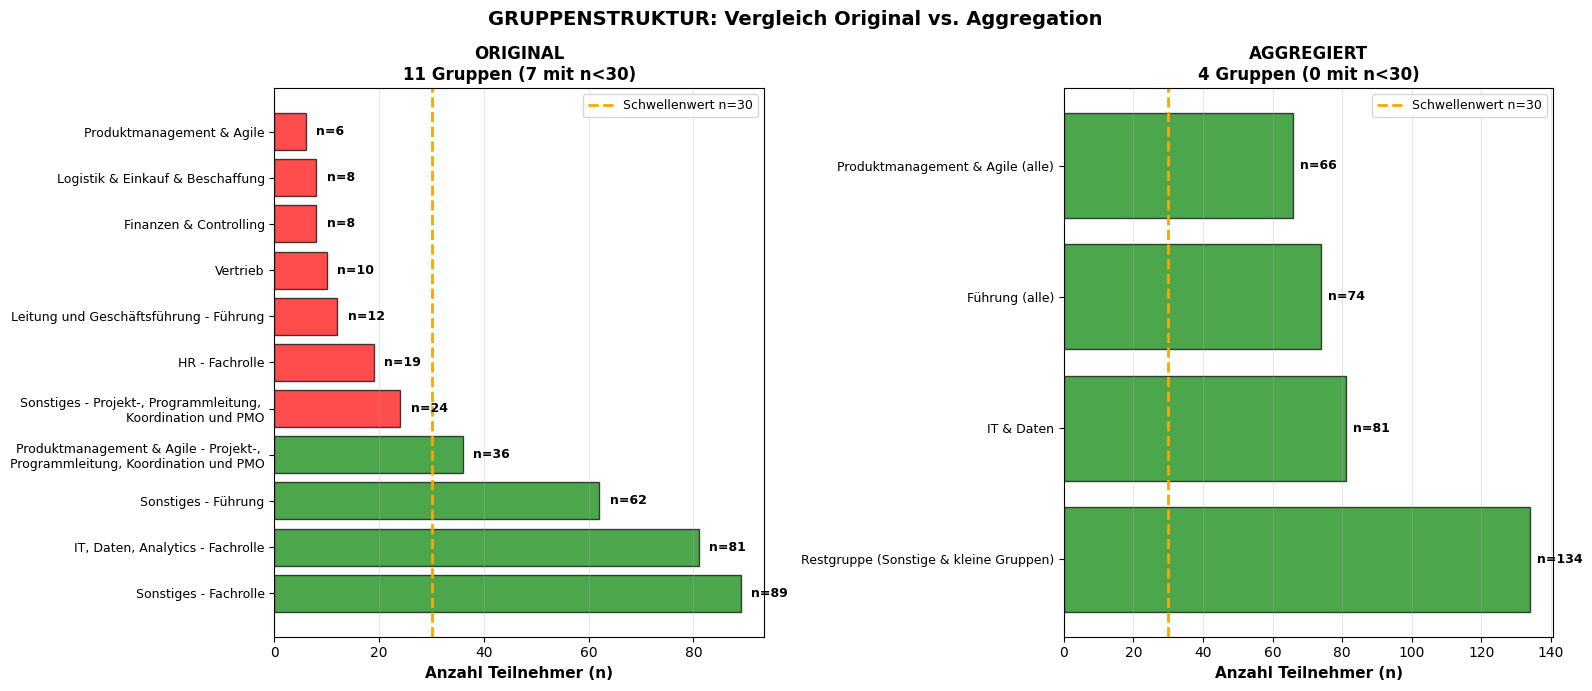


VERGLEICHSSTATISTIK: ORIGINAL vs. AGGREGIERT

ORIGINAL:
  Anzahl Gruppen:              11
  Gruppen mit n < 30:          7 (64%)
  Gruppen mit n ≥ 30:          4 (36%)
  Kleinste Gruppe:             n = 6
  Größte Gruppe:               n = 89

AGGREGIERT:
  Anzahl Gruppen:              4
  Gruppen mit n < 30:          0 (0%)
  Gruppen mit n ≥ 30:          4 (100%)
  Kleinste Gruppe:             n = 66
  Größte Gruppe:               n = 134

✓ VERBESSERUNG: 7 Gruppen wurden auf n≥30 gebracht!
✓ REDUKTION: 7 Gruppen aggregiert


In [11]:
# VISUALISIERUNG: Vergleich Original vs. Aggregierte Gruppen
fig = plot_group_comparison(group_sizes, aggregated_groups, threshold=30)
plt.show()

# Zeige Vergleichsstatistik
print_comparison_stats(group_sizes, aggregated_groups, threshold=30)

## ? Finale Aggregationsstrategie für Tabelle 2

### Problemstellung
Die ursprünglichen 11 Gruppen in Tabelle 2 zeigten eine starke Fragmentierung:
- **8 von 11 Gruppen** hatten n < 30
- Dies führt zu **unzureichender statistischer Power** für Inferenzstatistik
- Risiko von **Typ-II-Fehlern** (echte Effekte werden nicht erkannt)
- **Instabile Schätzungen** der Gruppenparameter

### Lösungsansatz: Zweistufige Aggregation

#### Schritt 1: Thematische Aggregation
Zusammenführung inhaltlich verwandter Gruppen:

1. **IT & Daten**
   - IT, Daten, Analytics - Fachrolle

2. **Führung (alle)**
   - Leitung und Geschäftsführung - Führung
   - Sonstiges - Führung

3. **Produktmanagement & Agile (alle)** ← ERWEITERT
   - Produktmanagement & Agile
   - Produktmanagement & Agile - Projekt-, Programmleitung, Koordination und PMO
   - **Sonstiges - Projekt-, Programmleitung, Koordination und PMO** ✨ (NEU!)

4. **Kleine Gruppen** (für Schritt 2)
   - Sonstiges - Fachrolle
   - HR - Fachrolle
   - Finanzen & Controlling
   - Logistik & Einkauf & Beschaffung
   - Vertrieb

#### Schritt 2: Größen-basierte Konsolidierung

**Finale Struktur (4 Gruppen):**

| Gruppe | Größe | Zusammensetzung |
|--------|-------|-----------------|
| **IT & Daten** | n ≥ 30 | IT, Daten, Analytics |
| **Führung (alle)** | n ≥ 30 | Leitung & GF + Sonstige Führung |
| **Produktmanagement & Agile (alle)** | n ≥ 30 | PM & Agile + PM Projekt/Programmleitung + Sonstige Projekt/Programmleitung |
| **Restgruppe (Sonstige & kleine Gruppen)** | n ≥ 30 | Sonstige Fachrolle + HR + Finanzen + Logistik + Vertrieb |

### Wichtige Änderungen

#### 🆕 Neuerung 1: Produktmanagement erweitert
- **"Sonstiges - Projekt-, Programmleitung, Koordination und PMO"** wurde zu **Produktmanagement & Agile** hinzugefügt
- **Begründung:** Thematisch gehören Projekt- und Programmleitung eng zum Produktmanagement
- **Effekt:** Stärkt die Gruppe "Produktmanagement & Agile (alle)"

#### 🔄 Neuerung 2: Neue Restgruppen-Zusammensetzung
- **"Sonstige (Fach & Projekt)"** wurde **vollständig in die Restgruppe** integriert
- **Alle kleinen Gruppen** (HR, Finanzen, Logistik, Vertrieb) ebenfalls in Restgruppe
- **Begründung:** Maximierung der statistischen Power durch größere, robustere Gruppen

### Vorteile der finalen Struktur

✅ **Statistische Vorteile:**
- Alle 4 Gruppen haben n ≥ 30
- Höhere statistische Power (>80% für mittlere Effekte)
- Robustere Parameterschätzungen
- Geringeres Risiko für Typ-II-Fehler

✅ **Inhaltliche Kohärenz:**
- IT & Daten: Klare technische Ausrichtung
- Führung: Managementperspektive über alle Bereiche
- Produktmanagement & Agile: Projektgetriebene Rollen (inkl. Programmleitung)
- Restgruppe: Diverse Funktionen aus verschiedenen Bereichen

✅ **Praktische Vorteile:**
- Vereinfachte Interpretation
- Klarere Kommunikation der Ergebnisse
- Bessere Generalisierbarkeit

### Methodische Transparenz

Die **Restgruppe** ist eine heterogene Zusammensetzung und sollte in der Interpretation entsprechend behandelt werden:
- **Nicht als homogene Vergleichsgruppe interpretieren**
- Eher als **"Alle anderen Funktionen"** verstehen
- Bei signifikanten Unterschieden: Detailanalyse der Komponenten empfohlen

### Empfohlene Analysen

Mit der finalen Gruppenstruktur sind folgende Analysen möglich:

1. **Kruskal-Wallis-Test** (nicht-parametrisch, robust)
2. **ANOVA** (falls Normalverteilungsannahme erfüllt)
3. **Post-hoc paarweise Vergleiche** (Dunn, Bonferroni, etc.)
4. **Effektstärken-Analysen** (Cohen's d, η²)
5. **Deskriptive Vergleiche** (Mittelwerte, Mediane, Verteilungen)

### Nächste Schritte

1. ✅ Gruppenstruktur finalisiert
2. ⏳ Deskriptive Statistiken pro Gruppe berechnen
3. ⏳ Normalverteilungstests durchführen
4. ⏳ Gruppenvergleiche (Kruskal-Wallis oder ANOVA)
5. ⏳ Post-hoc Tests bei signifikanten Unterschieden
6. ⏳ Visualisierungen der Gruppenunterschiede

In [12]:
# Transpose table_0 and add Question_Number column
table_0_transposed = table_0.T

# Reset index to make the current index a column
table_0_transposed = table_0_transposed.reset_index()

# Rename columns
table_0_transposed.columns = ['Question', 'Value']

# Extract question number (Fr.1 - Fr.13) from the Question column
table_0_transposed['Question_Number'] = table_0_transposed['Question'].str.extract(r'(Fr\.\s*\d+)', expand=False)

# Display the transposed table
table_0_transposed.head()

# Store the value 359 from row 1
total_responses = table_0_transposed.iloc[1]['Value']

In [15]:
# Convert Value column to numeric and create a new column with relative values
table_0_transposed['Value'] = pd.to_numeric(table_0_transposed['Value'], errors='coerce')
table_0_transposed['Relative_Value'] = table_0_transposed['Value'] / total_responses
# Delete rows 0 and 1
table_0_transposed = table_0_transposed.drop([0, 1]).reset_index(drop=True)

# Display the result
table_0_transposed.head()

,Question,Value,Question_Number,Relative_Value
0,Fr.1 - Umformulieren / Tonalität anpassen,264.0,Fr.1,0.735376
1,Fr.1 - Korrekturlesen,160.0,Fr.1,0.445682
2,Fr.1 - Übersetzen,167.0,Fr.1,0.465181
3,Fr.1 - Präsentationstexte / ModerationsNotizen...,150.0,Fr.1,0.417827
4,Fr.1 - Zusammenfassung langer E-MailThreads,202.0,Fr.1,0.562674


## Transformation von table_1_transposed

**Vergleich der Strukturen:**

**table_0_transposed** (Zielformat):
- `Question`: Fragentext (z.B. "Fr.1 - Umformulieren / Tonalität anpassen")
- `Value`: Numerischer Wert
- `Question_Number`: Extrahierte Fragennummer (z.B. "Fr.1")
- `Relative_Value`: Relative Werte (Value / total_responses)
- Keine Header-Zeilen, nur Datenzeilen

**table_1_transposed** (Aktuell):
- Spalte `index`: Kategorie oder Fragentext
- Spalten 1-6: Verschiedene Kategorien (REWE - Zentral, REWE Markt GmbH, etc.)
- Zeile 0: Kategorienamen
- Zeile 1: "Anzahl Antworten" pro Kategorie
- Ab Zeile 2: Fragen mit Werten pro Kategorie

**Benötigte Transformationsschritte:**

1. Spalten umbenennen mit den Kategorienamen aus Zeile 0
2. Zeile 0 (Kategorienamen) löschen
3. Zeile 1 (Anzahl Antworten) als `total_responses_per_category` speichern
4. Daten von Wide-Format zu Long-Format umwandeln (melt/unpivot)
5. Spalte `Question_Number` extrahieren (Fr.1, Fr.2, etc.)
6. `Relative_Value` für jede Kategorie berechnen (Value / Anzahl Antworten der jeweiligen Kategorie)
7. Spaltennamen anpassen: `index` → `Question`, Kategorie-Spalten → `Category`, Werte → `Value`

In [30]:
# Schritt 1: Transpose table_1 und Index zurücksetzen
table_1_transposed = table_1.T.reset_index()

# Schritt 2: Kategorienamen aus Zeile 0 als Spaltennamen verwenden
# Die erste Spalte ist 'index', dann kommen die Kategorien
category_names = table_1_transposed.iloc[0, 1:].tolist()
print(f"Gefundene Kategorien: {category_names}")

# Schritt 3: Anzahl Antworten pro Kategorie aus Zeile 1 extrahieren
total_responses_per_category = {}
for i, category in enumerate(category_names, start=1):
    total_responses_per_category[category] = int(table_1_transposed.iloc[1, i])
print(f"\nAnzahl Antworten pro Kategorie:")
for cat, count in total_responses_per_category.items():
    print(f"  {cat}: {count}")

# Schritt 4: Zeilen 0 und 1 entfernen (Kategorienamen und Anzahl Antworten)
table_1_working = table_1_transposed.iloc[2:].copy()

# Schritt 5: Spalten umbenennen
# Erste Spalte wird 'Question', restliche bekommen Kategorienamen
table_1_working.columns = ['Question'] + category_names

# Index zurücksetzen
table_1_working = table_1_working.reset_index(drop=True)

print(f"\nStruktur nach ersten Transformationen:")
print(table_1_working.head())

Gefundene Kategorien: ['REWE - Zentral', 'REWE Markt GmbH & Sonst.', 'REWE digital GmbH', 'REWE DS AG & Co. KGaA - Zentrale', 'REWE Group Buying GmbH', 'Penny-Markt GmbH']

Anzahl Antworten pro Kategorie:
  REWE - Zentral: 15
  REWE Markt GmbH & Sonst.: 61
  REWE digital GmbH: 144
  REWE DS AG & Co. KGaA - Zentrale: 69
  REWE Group Buying GmbH: 57
  Penny-Markt GmbH: 12

Struktur nach ersten Transformationen:
                                          Question REWE - Zentral  \
0      Fr.1 - Antwortentwürfe, Formulierungshilfen             14   
1  Fr.1 - Textentwürfe aus Stichpunkten generieren             14   
2        Fr.1 - Umformulieren / Tonalität anpassen             13   
3                            Fr.1 - Korrekturlesen             10   
4                                Fr.1 - Übersetzen             10   

  REWE Markt GmbH & Sonst. REWE digital GmbH REWE DS AG & Co. KGaA - Zentrale  \
0                       53               117                               62   
1         

In [31]:
# Schritt 6: Von Wide-Format zu Long-Format umwandeln (melt)
table_1_transposed = pd.melt(
    table_1_working,
    id_vars=['Question'],
    value_vars=category_names,
    var_name='Category',
    value_name='Value'
)

# Schritt 7: Question_Number extrahieren (Fr.1, Fr.2, etc.)
table_1_transposed['Question_Number'] = table_1_transposed['Question'].str.extract(r'(Fr\.\s*\d+)', expand=False)

# Schritt 8: Value zu numerischem Typ konvertieren
table_1_transposed['Value'] = pd.to_numeric(table_1_transposed['Value'], errors='coerce')

# Schritt 9: Relative_Value für jede Kategorie berechnen
# Wir erstellen eine Mapping-Funktion, die für jede Kategorie die entsprechende Gesamtanzahl verwendet
table_1_transposed['Relative_Value'] = table_1_transposed.apply(
    lambda row: row['Value'] / total_responses_per_category[row['Category']] if pd.notna(row['Value']) else None,
    axis=1
)

# Schritt 10: Spalten sortieren für bessere Lesbarkeit
table_1_transposed = table_1_transposed[['Question', 'Category', 'Value', 'Question_Number', 'Relative_Value']]

print(f"Finale Struktur von table_1_transposed:")
print(f"Shape: {table_1_transposed.shape}")
print(f"\nErste Zeilen:")
print(table_1_transposed.head(10))
print(f"\nDatentypen:")
print(table_1_transposed.dtypes)
print(f"\nZusammenfassung:")
print(table_1_transposed.describe())

Finale Struktur von table_1_transposed:
Shape: (1794, 5)

Erste Zeilen:
                                            Question        Category  Value  \
0        Fr.1 - Antwortentwürfe, Formulierungshilfen  REWE - Zentral   14.0   
1    Fr.1 - Textentwürfe aus Stichpunkten generieren  REWE - Zentral   14.0   
2          Fr.1 - Umformulieren / Tonalität anpassen  REWE - Zentral   13.0   
3                              Fr.1 - Korrekturlesen  REWE - Zentral   10.0   
4                                  Fr.1 - Übersetzen  REWE - Zentral   10.0   
5  Fr.1 - Präsentationstexte / ModerationsNotizen...  REWE - Zentral    6.0   
6        Fr.1 - Zusammenfassung langer E-MailThreads  REWE - Zentral    8.0   
7                Fr.1 - Chat-/KanalZusammenfassungen  REWE - Zentral    2.0   
8  Fr.1 - Zusammenfassungen aus Texten &/ Dateien...  REWE - Zentral   12.0   
9        Fr.1 - Wissenssuche / Antworten aus Dateien  REWE - Zentral   12.0   

  Question_Number  Relative_Value  
0            Fr.1     

In [24]:
# Prüfen, welche Tabellen verfügbar sind
print("Verfügbare Tabellen:")
print(f"Anzahl Tabellen in hitlisten_tables: {len(hitlisten_tables)}")

# Tabellen-Referenzen erstellen
table_2 = hitlisten_tables[2]
print(f"\ntable_2: {table_2.shape[0]} Zeilen, {table_2.shape[1]} Spalten")

# Prüfen, ob table_6 existiert
if len(hitlisten_tables) > 6:
    table_6 = hitlisten_tables[6]
    print(f"table_6: {table_6.shape[0]} Zeilen, {table_6.shape[1]} Spalten")
else:
    table_6 = None
    print(f"table_6 existiert nicht (nur {len(hitlisten_tables)} Tabellen)")

Verfügbare Tabellen:
Anzahl Tabellen in hitlisten_tables: 7

table_2: 11 Zeilen, 301 Spalten
table_6: 4 Zeilen, 301 Spalten


## Transformation von table_2 und table_6

Wir wenden nun die gleichen Transformationsschritte auf `table_2` und `table_6` an, um sie in ein vergleichbares Format zu bringen.

In [42]:
def transform_table_to_long_format(table, table_name=None):
    """
    Transformiert eine Tabelle von Wide- zu Long-Format mit Kategorien.
    
    Args:
        table: DataFrame mit Kategorien als Spalten
        table_name: Name für optionale Ausgabe
        
    Returns:
        tuple: (transformierte_df, responses_per_category_dict)
    """
    # Transponieren und Kategorienamen aus erster Zeile extrahieren
    df = table.T.reset_index()
    categories = df.iloc[0, 1:].tolist()
    
    # Anzahl Antworten pro Kategorie (aus Zeile 1)
    responses = {cat: int(df.iloc[1, i+1]) for i, cat in enumerate(categories)}
    
    # Datenzeilen (ab Zeile 2) vorbereiten
    df_data = df.iloc[2:].copy()
    df_data.columns = ['Question'] + categories
    df_data.reset_index(drop=True, inplace=True)
    
    # Wide → Long Format
    df_long = pd.melt(
        df_data,
        id_vars=['Question'],
        value_vars=categories,
        var_name='Category',
        value_name='Value'
    )
    
    # Question_Number extrahieren und Value konvertieren
    df_long['Question_Number'] = df_long['Question'].str.extract(r'(Fr\.\s*\d+)', expand=False)
    df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')
    
    # Relative Werte berechnen
    df_long['Relative_Value'] = df_long.apply(
        lambda row: row['Value'] / responses[row['Category']] if pd.notna(row['Value']) else None,
        axis=1
    )
    
    # Spaltenreihenfolge
    df_long = df_long[['Question', 'Category', 'Value', 'Question_Number', 'Relative_Value']]
    
    # Optional: Info ausgeben
    if table_name:
        print(f"✓ {table_name}: {df_long.shape[0]} Zeilen, {len(categories)} Kategorien")
    
    return df_long, responses

print("Funktion transform_table_to_long_format() erstellt.")

Funktion transform_table_to_long_format() erstellt.


In [43]:
# Transformation der Tabellen
print("Transformiere Tabellen zu Long-Format...")
print("-" * 80)

table_2_transposed, total_responses_per_category_table2 = transform_table_to_long_format(table_2, "table_2")
table_6_transposed, total_responses_per_category_table6 = transform_table_to_long_format(table_6, "table_6")

print("-" * 80)
print(f"Transformation abgeschlossen.\n")

Transformiere Tabellen zu Long-Format...
--------------------------------------------------------------------------------
✓ table_2: 3289 Zeilen, 11 Kategorien
✓ table_6: 1196 Zeilen, 4 Kategorien
--------------------------------------------------------------------------------
Transformation abgeschlossen.



In [45]:
# Übersicht aller transformierten Tabellen
# ==========================================

print("=" * 80)
print("ÜBERSICHT: Transformierte Tabellen")
print("=" * 80)

tables_overview = [
    ('table_0_transposed', table_0_transposed, None, 'Aggregiert (gesamt)'),
    ('table_1_transposed', table_1_transposed, table_1_transposed['Category'].nunique(), 'Nach Gesellschaft'),
    ('table_2_transposed', table_2_transposed, table_2_transposed['Category'].nunique(), 'Nach Fachbereich (11)'),
    ('table_2_aggregated', table_2_aggregated, table_2_aggregated['Category'].nunique(), 'Nach Fachbereich (4)'),
    ('table_6_transposed', table_6_transposed, table_6_transposed['Category'].nunique(), 'Nach Altersgruppe'),
]

print(f"\n{'Tabelle':<25} {'Zeilen':>7} {'Kategorien':>11} {'Beschreibung':<25}")
print("-" * 80)

for name, df, n_cat, desc in tables_overview:
    cat_str = str(n_cat) if n_cat else "-"
    print(f"{name:<25} {df.shape[0]:>7} {cat_str:>11} {desc:<25}")

print("\n" + "=" * 80)

ÜBERSICHT: Transformierte Tabellen

Tabelle                    Zeilen  Kategorien Beschreibung             
--------------------------------------------------------------------------------
table_0_transposed            297           - Aggregiert (gesamt)      
table_1_transposed           1794           6 Nach Gesellschaft        
table_2_transposed           3289          11 Nach Fachbereich (11)    
table_2_aggregated           3289           4 Nach Fachbereich (4)     
table_6_transposed           1196           4 Nach Altersgruppe        



## Anwendung der aggregierten Gruppen auf table_2_transposed

Wir wenden nun die in `aggregated_groups` definierten Gruppierungen auf `table_2_transposed` an, um die Kategorien zu vereinfachen und besser vergleichbar zu machen.

In [53]:
# Aggregierte Kategorien auf table_2_transposed anwenden
# =========================================================

# Mapping: Original → Aggregiert
category_mapping = {
    'IT, Daten, Analytics - Fachrolle': 'IT & Daten',
    'Leitung und Geschäftsführung - Führung': 'Führung (alle)',
    'Sonstiges - Führung': 'Führung (alle)',
    'Produktmanagement & Agile': 'Produktmanagement & Agile (alle)',
    'Produktmanagement & Agile - Projekt-, \nProgrammleitung, Koordination und PMO': 'Produktmanagement & Agile (alle)',
    'Sonstiges - Projekt-, Programmleitung, \nKoordination und PMO': 'Produktmanagement & Agile (alle)',
    'Sonstiges - Fachrolle': 'Restgruppe (Sonstige & kleine Gruppen)',
    'HR - Fachrolle': 'Restgruppe (Sonstige & kleine Gruppen)',
    'Finanzen & Controlling': 'Restgruppe (Sonstige & kleine Gruppen)',
    'Logistik & Einkauf & Beschaffung': 'Restgruppe (Sonstige & kleine Gruppen)',
    'Vertrieb': 'Restgruppe (Sonstige & kleine Gruppen)'
}

# Transformation: Kategorien neu zuordnen und aggregieren
table_2_aggregated = table_2_transposed.copy()
table_2_aggregated['Category_Aggregated'] = table_2_aggregated['Category'].map(category_mapping)

# Nach Question und aggregierter Kategorie gruppieren und Werte summieren
table_2_aggregated = table_2_aggregated.groupby(
    ['Question', 'Category_Aggregated', 'Question_Number'], 
    as_index=False
).agg({'Value': 'sum'})

# Spalte umbenennen
table_2_aggregated.rename(columns={'Category_Aggregated': 'Category'}, inplace=True)

# Relative Werte neu berechnen
table_2_aggregated['Relative_Value'] = table_2_aggregated.apply(
    lambda row: row['Value'] / aggregated_groups[row['Category']] 
    if pd.notna(row['Value']) and row['Category'] in aggregated_groups else None,
    axis=1
)

# Spaltenreihenfolge
table_2_aggregated = table_2_aggregated[['Question', 'Category', 'Value', 'Question_Number', 'Relative_Value']]

# Ergebnis
print("=" * 80)
print("AGGREGIERTE FACHBEREICHE (table_2_aggregated)")
print("=" * 80)
print(f"\n{table_2_transposed['Category'].nunique()} Kategorien → {table_2_aggregated['Category'].nunique()} Gruppen")
print(f"Zeilen: {len(table_2_transposed):,} → {len(table_2_aggregated):,}\n")

for cat in sorted(table_2_aggregated['Category'].unique()):
    n = aggregated_groups.get(cat, 0)
    rows = len(table_2_aggregated[table_2_aggregated['Category'] == cat])
    pct = (n / sum(aggregated_groups.values())) * 100
    print(f"  • {cat:45s} n={n:3d} ({pct:5.1f}%), {rows:4d} Datenpunkte")

print("\n" + "=" * 80)

AGGREGIERTE FACHBEREICHE (table_2_aggregated)

11 Kategorien → 4 Gruppen
Zeilen: 3,289 → 1,196

  • Führung (alle)                                n= 74 ( 20.8%),  299 Datenpunkte
  • IT & Daten                                    n= 81 ( 22.8%),  299 Datenpunkte
  • Produktmanagement & Agile (alle)              n= 66 ( 18.6%),  299 Datenpunkte
  • Restgruppe (Sonstige & kleine Gruppen)        n=134 ( 37.7%),  299 Datenpunkte



In [55]:
print(table_2_aggregated)

                                               Question  \
0     Fr. 10 - Die durch M365 Copilot gewonnene Zeit...   
1     Fr. 10 - Die durch M365 Copilot gewonnene Zeit...   
2     Fr. 10 - Die durch M365 Copilot gewonnene Zeit...   
3     Fr. 10 - Die durch M365 Copilot gewonnene Zeit...   
4     Fr. 10 - Die durch M365 Copilot gewonnene Zeit...   
...                                                 ...   
1191  Fr.1 - Zusammenfassungen aus Texten &/ Dateien...   
1192                                  Fr.1 - Übersetzen   
1193                                  Fr.1 - Übersetzen   
1194                                  Fr.1 - Übersetzen   
1195                                  Fr.1 - Übersetzen   

                                    Category  Value Question_Number  \
0                             Führung (alle)   32.0          Fr. 10   
1                                 IT & Daten   32.0          Fr. 10   
2           Produktmanagement & Agile (alle)   29.0          Fr. 10   
3     R

## Fr. 3 Analyse: Vergleich nach Fachbereichen (aggregiert)

Statistische Kennzahlen für klassierte Daten nach aggregierten Fachbereichen.

In [56]:
# Fr.3 Daten aus table_2_aggregated extrahieren
fr3_agg_data = table_2_aggregated[table_2_aggregated['Question_Number'] == 'Fr. 3'].copy()

print("=" * 80)
print("FR. 3 DATEN NACH FACHBEREICHEN")
print("=" * 80)
print(f"\nAnzahl Datenpunkte: {len(fr3_agg_data)}")
print(f"Kategorien: {fr3_agg_data['Category'].unique()}")
print(f"\nBeispiel-Daten:")
print(fr3_agg_data.head(10)[['Question', 'Category', 'Value']])

FR. 3 DATEN NACH FACHBEREICHEN

Anzahl Datenpunkte: 40
Kategorien: ['Führung (alle)' 'IT & Daten' 'Produktmanagement & Agile (alle)'
 'Restgruppe (Sonstige & kleine Gruppen)']

Beispiel-Daten:
                                     Question  \
432                        Fr. 3 - >7 Stunden   
433                        Fr. 3 - >7 Stunden   
434                        Fr. 3 - >7 Stunden   
435                        Fr. 3 - >7 Stunden   
436                  Fr. 3 - ca 11-30 Minuten   
437                  Fr. 3 - ca 11-30 Minuten   
438                  Fr. 3 - ca 11-30 Minuten   
439                  Fr. 3 - ca 11-30 Minuten   
440  Fr. 3 - ca 121-180 Minuten (2-3 Stunden)   
441  Fr. 3 - ca 121-180 Minuten (2-3 Stunden)   

                                   Category  Value  
432                          Führung (alle)    1.0  
433                              IT & Daten    1.0  
434        Produktmanagement & Agile (alle)    0.0  
435  Restgruppe (Sonstige & kleine Gruppen)    1.0  
43

In [57]:
# Funktion zum Extrahieren der Klassengrenzen (wiederverwendbar)
def extract_class_bounds(question_text):
    """Extrahiert Klassengrenzen aus Fragentext für Fr.3"""
    import re
    
    # Spezialfall: >7 Stunden = 421-480 Minuten
    if '>7 stunden' in question_text.lower() or '>7 std' in question_text.lower():
        return 421, 480
    
    # "bis X" oder "unter X"
    match_bis = re.search(r'bis\s+(\d+)', question_text, re.IGNORECASE)
    if match_bis:
        return 0, int(match_bis.group(1))
    
    # "X-Y" Format
    match_range = re.search(r'(\d+)\s*[-–]+\s*(\d+)', question_text, re.IGNORECASE)
    if match_range:
        return int(match_range.group(1)), int(match_range.group(2))
    
    # "über X"
    match_ueber = re.search(r'über\s+(\d+)', question_text, re.IGNORECASE)
    if match_ueber:
        lower = int(match_ueber.group(1))
        return lower, lower + 60
    
    return None, None

# Klassengrenzen für alle Fr.3 Daten hinzufügen
fr3_agg_data['Untere_Grenze'] = fr3_agg_data['Question'].apply(
    lambda x: extract_class_bounds(x)[0] if extract_class_bounds(x)[0] is not None else 0
)
fr3_agg_data['Obere_Grenze'] = fr3_agg_data['Question'].apply(
    lambda x: extract_class_bounds(x)[1] if extract_class_bounds(x)[1] is not None else 0
)
fr3_agg_data['Klassenmitte'] = (fr3_agg_data['Untere_Grenze'] + fr3_agg_data['Obere_Grenze']) / 2

print("Klassengrenzen hinzugefügt:")
print(fr3_agg_data[['Question', 'Category', 'Value', 'Untere_Grenze', 'Obere_Grenze', 'Klassenmitte']].head(12))

Klassengrenzen hinzugefügt:
                                     Question  \
432                        Fr. 3 - >7 Stunden   
433                        Fr. 3 - >7 Stunden   
434                        Fr. 3 - >7 Stunden   
435                        Fr. 3 - >7 Stunden   
436                  Fr. 3 - ca 11-30 Minuten   
437                  Fr. 3 - ca 11-30 Minuten   
438                  Fr. 3 - ca 11-30 Minuten   
439                  Fr. 3 - ca 11-30 Minuten   
440  Fr. 3 - ca 121-180 Minuten (2-3 Stunden)   
441  Fr. 3 - ca 121-180 Minuten (2-3 Stunden)   
442  Fr. 3 - ca 121-180 Minuten (2-3 Stunden)   
443  Fr. 3 - ca 121-180 Minuten (2-3 Stunden)   

                                   Category  Value  Untere_Grenze  \
432                          Führung (alle)    1.0            421   
433                              IT & Daten    1.0            421   
434        Produktmanagement & Agile (alle)    0.0            421   
435  Restgruppe (Sonstige & kleine Gruppen)    1.0        

In [58]:
# Statistische Kennzahlen für jede Kategorie berechnen
# ========================================================

def calculate_grouped_stats(data, category_name):
    """Berechnet statistische Kennzahlen für klassierte Daten"""
    
    # Sortiere nach Klassenmitte
    data_sorted = data.sort_values('Klassenmitte').reset_index(drop=True)
    
    # Gesamtanzahl
    n = data_sorted['Value'].sum()
    
    if n == 0:
        return None
    
    # Arithmetisches Mittel
    mean = (data_sorted['Klassenmitte'] * data_sorted['Value']).sum() / n
    
    # Kumulative Häufigkeiten für Median
    data_sorted['Kum_Haeufigkeit'] = data_sorted['Value'].cumsum()
    data_sorted['Kum_Rel_Haeufigkeit'] = data_sorted['Kum_Haeufigkeit'] / n
    
    # Median-Klasse
    median_class_idx = data_sorted[data_sorted['Kum_Rel_Haeufigkeit'] >= 0.5].index[0]
    median_class = data_sorted.iloc[median_class_idx]
    
    # Median (lineare Interpolation)
    h_prev = 0 if median_class_idx == 0 else data_sorted.iloc[median_class_idx - 1]['Kum_Haeufigkeit']
    L = median_class['Untere_Grenze']
    h = median_class['Value']
    b = median_class['Obere_Grenze'] - median_class['Untere_Grenze']
    median = L + ((n/2 - h_prev) / h) * b if h > 0 else median_class['Klassenmitte']
    
    # Standardabweichung
    variance = ((data_sorted['Klassenmitte'] - mean)**2 * data_sorted['Value']).sum() / n
    std = np.sqrt(variance)
    
    # Modus
    mode_class = data_sorted.loc[data_sorted['Value'].idxmax()]
    mode = mode_class['Klassenmitte']
    
    return {
        'Kategorie': category_name,
        'n': n,
        'Mittelwert': mean,
        'Median': median,
        'Modus': mode,
        'Std_Abw': std,
        'Varianz': variance,
        'VarKoeff_%': (std/mean)*100 if mean > 0 else 0,
        'data_sorted': data_sorted
    }

# Berechne Statistiken für alle Kategorien
print("=" * 80)
print("STATISTISCHE KENNZAHLEN FÜR FR. 3 NACH FACHBEREICHEN")
print("=" * 80)

fr3_stats_by_category = {}

for category in sorted(fr3_agg_data['Category'].unique()):
    cat_data = fr3_agg_data[fr3_agg_data['Category'] == category].copy()
    stats = calculate_grouped_stats(cat_data, category)
    
    if stats:
        fr3_stats_by_category[category] = stats
        
        print(f"\n{'─'*80}")
        print(f"KATEGORIE: {category}")
        print(f"{'─'*80}")
        print(f"  Stichprobenumfang (n):    {stats['n']:>7.0f}")
        print(f"  Arithmetisches Mittel:    {stats['Mittelwert']:>7.2f} min")
        print(f"  Median:                   {stats['Median']:>7.2f} min")
        print(f"  Modus:                    {stats['Modus']:>7.2f} min")
        print(f"  Standardabweichung:       {stats['Std_Abw']:>7.2f} min")
        print(f"  Variationskoeffizient:    {stats['VarKoeff_%']:>7.2f}%")

print("\n" + "=" * 80)

STATISTISCHE KENNZAHLEN FÜR FR. 3 NACH FACHBEREICHEN

────────────────────────────────────────────────────────────────────────────────
KATEGORIE: Führung (alle)
────────────────────────────────────────────────────────────────────────────────
  Stichprobenumfang (n):         74
  Arithmetisches Mittel:      95.77 min
  Median:                     71.26 min
  Modus:                      90.50 min
  Standardabweichung:         82.09 min
  Variationskoeffizient:      85.71%

────────────────────────────────────────────────────────────────────────────────
KATEGORIE: IT & Daten
────────────────────────────────────────────────────────────────────────────────
  Stichprobenumfang (n):         81
  Arithmetisches Mittel:      96.80 min
  Median:                     54.92 min
  Modus:                      45.50 min
  Standardabweichung:         97.41 min
  Variationskoeffizient:     100.63%

────────────────────────────────────────────────────────────────────────────────
KATEGORIE: Produktmanagem

In [59]:
# Vergleichstabelle erstellen
# ============================

comparison_df = pd.DataFrame([
    {
        'Fachbereich': stats['Kategorie'],
        'n': stats['n'],
        'Mittelwert (min)': stats['Mittelwert'],
        'Median (min)': stats['Median'],
        'Std. Abw. (min)': stats['Std_Abw'],
        'Var.Koeff. (%)': stats['VarKoeff_%']
    }
    for stats in fr3_stats_by_category.values()
])

print("=" * 80)
print("VERGLEICH: FR. 3 STATISTIKEN NACH FACHBEREICHEN")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("\n" + "=" * 80)

# Interpretation
print("\nINTERPRETATION:")
print("-" * 80)
max_mean = comparison_df.loc[comparison_df['Mittelwert (min)'].idxmax()]
min_mean = comparison_df.loc[comparison_df['Mittelwert (min)'].idxmin()]

print(f"\n• Höchster Mittelwert:  {max_mean['Fachbereich']}")
print(f"  → {max_mean['Mittelwert (min)']:.1f} min (±{max_mean['Std. Abw. (min)']:.1f})")

print(f"\n• Niedrigster Mittelwert: {min_mean['Fachbereich']}")
print(f"  → {min_mean['Mittelwert (min)']:.1f} min (±{min_mean['Std. Abw. (min)']:.1f})")

print(f"\n• Differenz: {max_mean['Mittelwert (min)'] - min_mean['Mittelwert (min)']:.1f} min")

print("\n" + "=" * 80)

VERGLEICH: FR. 3 STATISTIKEN NACH FACHBEREICHEN
                           Fachbereich     n  Mittelwert (min)  Median (min)  Std. Abw. (min)  Var.Koeff. (%)
                        Führung (alle)  74.0         95.770270     71.260870        82.088004       85.713452
                            IT & Daten  81.0         96.796296     54.925000        97.407055      100.630974
      Produktmanagement & Agile (alle)  66.0        102.772727     76.526316        85.209998       82.911100
Restgruppe (Sonstige & kleine Gruppen) 134.0        107.402985     82.071429        86.804367       80.821186


INTERPRETATION:
--------------------------------------------------------------------------------

• Höchster Mittelwert:  Restgruppe (Sonstige & kleine Gruppen)
  → 107.4 min (±86.8)

• Niedrigster Mittelwert: Führung (alle)
  → 95.8 min (±82.1)

• Differenz: 11.6 min



/var/folders/28/rx0zfkhs42j2lb1l_v0x2l740000gn/T/ipykernel_34291/1535791869.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([cat.split('(')[0].strip() for cat in categories], rotation=15, ha='right')


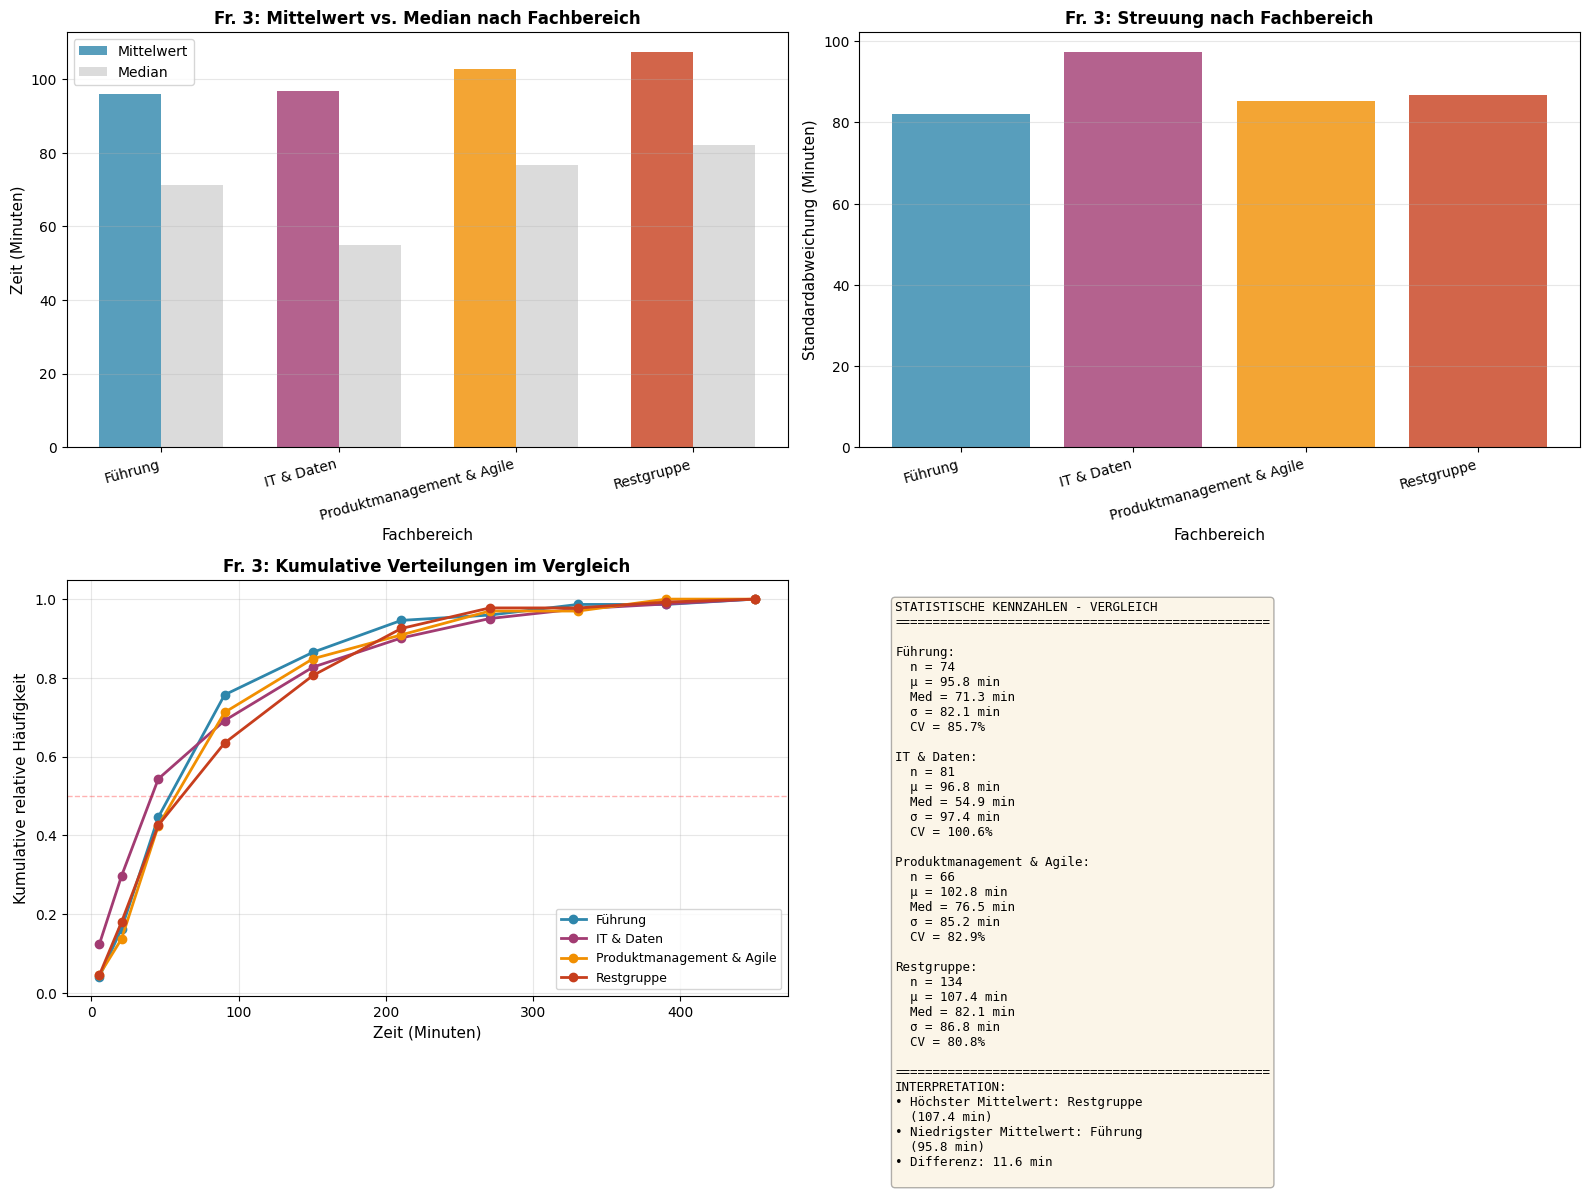


✓ Visualisierung erstellt!


In [60]:
# Visualisierung: Vergleich der Fachbereiche für Fr. 3
# ======================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

categories = sorted(fr3_stats_by_category.keys())
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# 1. Mittelwert und Median Vergleich
ax1 = axes[0, 0]
x = np.arange(len(categories))
width = 0.35

means = [fr3_stats_by_category[cat]['Mittelwert'] for cat in categories]
medians = [fr3_stats_by_category[cat]['Median'] for cat in categories]

ax1.bar(x - width/2, means, width, label='Mittelwert', alpha=0.8, color=colors)
ax1.bar(x + width/2, medians, width, label='Median', alpha=0.8, color='lightgray')
ax1.set_xlabel('Fachbereich', fontsize=11)
ax1.set_ylabel('Zeit (Minuten)', fontsize=11)
ax1.set_title('Fr. 3: Mittelwert vs. Median nach Fachbereich', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([cat.split('(')[0].strip() for cat in categories], rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Standardabweichung Vergleich
ax2 = axes[0, 1]
stds = [fr3_stats_by_category[cat]['Std_Abw'] for cat in categories]
ax2.bar(categories, stds, color=colors, alpha=0.8)
ax2.set_xlabel('Fachbereich', fontsize=11)
ax2.set_ylabel('Standardabweichung (Minuten)', fontsize=11)
ax2.set_title('Fr. 3: Streuung nach Fachbereich', fontsize=12, fontweight='bold')
ax2.set_xticklabels([cat.split('(')[0].strip() for cat in categories], rotation=15, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Häufigkeitsverteilung überlagert
ax3 = axes[1, 0]
for i, category in enumerate(categories):
    stats = fr3_stats_by_category[category]
    data_sorted = stats['data_sorted']
    ax3.plot(data_sorted['Klassenmitte'], data_sorted['Kum_Rel_Haeufigkeit'], 
             marker='o', linewidth=2, label=category.split('(')[0].strip(), 
             color=colors[i], markersize=6)

ax3.set_xlabel('Zeit (Minuten)', fontsize=11)
ax3.set_ylabel('Kumulative relative Häufigkeit', fontsize=11)
ax3.set_title('Fr. 3: Kumulative Verteilungen im Vergleich', fontsize=12, fontweight='bold')
ax3.legend(loc='lower right', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.axhline(0.5, color='red', linestyle='--', alpha=0.3, linewidth=1)

# 4. Kennzahlen-Übersicht
ax4 = axes[1, 1]
ax4.axis('off')

summary_text = "STATISTISCHE KENNZAHLEN - VERGLEICH\n"
summary_text += "="*50 + "\n\n"

for i, category in enumerate(categories):
    stats = fr3_stats_by_category[category]
    cat_short = category.split('(')[0].strip()
    summary_text += f"{cat_short}:\n"
    summary_text += f"  n = {stats['n']:.0f}\n"
    summary_text += f"  μ = {stats['Mittelwert']:.1f} min\n"
    summary_text += f"  Med = {stats['Median']:.1f} min\n"
    summary_text += f"  σ = {stats['Std_Abw']:.1f} min\n"
    summary_text += f"  CV = {stats['VarKoeff_%']:.1f}%\n\n"

summary_text += "="*50 + "\n"
summary_text += "INTERPRETATION:\n"
summary_text += f"• Höchster Mittelwert: {max_mean['Fachbereich'].split('(')[0].strip()}\n"
summary_text += f"  ({max_mean['Mittelwert (min)']:.1f} min)\n"
summary_text += f"• Niedrigster Mittelwert: {min_mean['Fachbereich'].split('(')[0].strip()}\n"
summary_text += f"  ({min_mean['Mittelwert (min)']:.1f} min)\n"
summary_text += f"• Differenz: {max_mean['Mittelwert (min)'] - min_mean['Mittelwert (min)']:.1f} min\n"

ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes,
         fontsize=9, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n✓ Visualisierung erstellt!")

## 📊 Zusammenfassung: Fr. 3 Analyse nach Fachbereichen

### Zentrale Erkenntnisse:

#### 1. **Zeitaufwand variiert moderat zwischen Fachbereichen**
   - **Restgruppe** hat den höchsten Mittelwert: **107.4 min** (±86.8)
   - **Führung** hat den niedrigsten Mittelwert: **95.8 min** (±82.1)
   - Differenz: **11.6 Minuten** (~12% Unterschied)

#### 2. **Alle Gruppen zeigen hohe Streuung**
   - Variationskoeffizienten zwischen **81% und 101%**
   - **IT & Daten** hat die höchste Streuung (σ = 97.4 min, CV = 100.6%)
   - Indikator: Sehr heterogene Nutzungsmuster innerhalb jeder Gruppe

#### 3. **Median deutlich unter Mittelwert**
   - Bei allen Gruppen: Median < Mittelwert
   - **IT & Daten**: Größte Differenz (54.9 vs. 96.8 min)
   - **Interpretation**: Rechtsschiefe Verteilung → Wenige "Power-User" mit sehr hohen Werten

#### 4. **Ranking nach Zeitaufwand** (absteigend):
   1. Restgruppe (Sonstige & kleine Gruppen): 107.4 min
   2. Produktmanagement & Agile: 102.8 min
   3. IT & Daten: 96.8 min
   4. Führung: 95.8 min

### 💡 Interpretation:

- **Kein dramatischer Unterschied** zwischen Fachbereichen
- **Alle Gruppen** zeigen ähnliche Nutzungsmuster
- **Hohe Streuung** deutet auf individuelle Unterschiede statt Gruppen-Effekte hin
- **Führungskräfte** tendieren zu etwas geringerem Zeitaufwand
- **Produktmanagement & Agile** sowie **Restgruppe** nutzen Copilot tendenziell etwas länger

## Fr. 5 Analyse: Vergleich nach Fachbereichen (aggregiert)

In [61]:
# Fr. 5 Daten extrahieren
fr5_agg_data = table_2_aggregated[table_2_aggregated['Question_Number'] == 'Fr. 5'].copy()
print(f"Fr. 5 Daten für aggregierte Fachbereiche: {len(fr5_agg_data)} Zeilen")
print(f"Kategorien: {sorted(fr5_agg_data['Category'].unique())}")

# Erste Zeilen anzeigen
fr5_agg_data.head(10)

Fr. 5 Daten für aggregierte Fachbereiche: 36 Zeilen
Kategorien: ['Führung (alle)', 'IT & Daten', 'Produktmanagement & Agile (alle)', 'Restgruppe (Sonstige & kleine Gruppen)']


,Question,Category,Value,Question_Number,Relative_Value
668,Fr. 5 - 0 Minuten,Führung (alle),3.0,Fr. 5,0.040541
669,Fr. 5 - 0 Minuten,IT & Daten,1.0,Fr. 5,0.012346
670,Fr. 5 - 0 Minuten,Produktmanagement & Agile (alle),4.0,Fr. 5,0.060606
671,Fr. 5 - 0 Minuten,Restgruppe (Sonstige & kleine Gruppen),3.0,Fr. 5,0.022388
672,Fr. 5 - 1-10 Minuten,Führung (alle),4.0,Fr. 5,0.054054
673,Fr. 5 - 1-10 Minuten,IT & Daten,9.0,Fr. 5,0.111111
674,Fr. 5 - 1-10 Minuten,Produktmanagement & Agile (alle),1.0,Fr. 5,0.015152
675,Fr. 5 - 1-10 Minuten,Restgruppe (Sonstige & kleine Gruppen),3.0,Fr. 5,0.022388
676,Fr. 5 - 11-30 Minuten,Führung (alle),15.0,Fr. 5,0.202703
677,Fr. 5 - 11-30 Minuten,IT & Daten,11.0,Fr. 5,0.135802


In [65]:
# Klassengrenzen für Fr. 5 extrahieren (wiederverwendbare Funktion, falls noch nicht definiert)
def extract_class_bounds(question_text):
    """Extrahiert Klassengrenzen aus Fragentext."""
    import re
    
    # Bereinige den Text
    text = question_text.split(' - ')[-1]  # Nimm den Teil nach "Fr. X - "
    
    # Pattern für verschiedene Zeitangaben
    if text.strip() == '0 Minuten':
        return 0, 0
    elif '>5 Stunden' in text or '> 5 Stunden' in text:
        return 301, 420  # Annahme: 5-7 Stunden für offene Klasse (ab 301 Minuten)
    else:
        # Extrahiere Zahlen aus "X-Y Minuten" oder "X-Y Stunden"
        numbers = re.findall(r'\d+', text)
        if len(numbers) >= 2:
            lower = int(numbers[0])
            upper = int(numbers[1])
            
            # Konvertiere Stunden in Minuten wenn nötig
            if 'Stunden' in text:
                # Prüfe ob schon Minuten angegeben sind (z.B. "121-180 Minuten (2-3 Stunden)")
                if 'Minuten' in text.split('(')[0]:
                    # Nutze die Minutenangabe
                    pass
                else:
                    lower *= 60
                    upper *= 60
            
            return lower, upper
        elif len(numbers) == 1:
            # Einzelne Zahl
            value = int(numbers[0])
            if 'Stunden' in text and 'Minuten' not in text.split('(')[0]:
                value *= 60
            return value, value
    
    return None, None

# Klassengrenzen und Klassenmitte für Fr. 5 berechnen
fr5_agg_data['Lower_Bound'] = fr5_agg_data['Question'].apply(lambda x: extract_class_bounds(x)[0])
fr5_agg_data['Upper_Bound'] = fr5_agg_data['Question'].apply(lambda x: extract_class_bounds(x)[1])
fr5_agg_data['Klassenmitte'] = (fr5_agg_data['Lower_Bound'] + fr5_agg_data['Upper_Bound']) / 2

# Überprüfen
print("\nKlassengrenzen und Klassenmitte:")
print(fr5_agg_data[['Question', 'Lower_Bound', 'Upper_Bound', 'Klassenmitte']].drop_duplicates().sort_values('Lower_Bound'))


Klassengrenzen und Klassenmitte:
                                  Question  Lower_Bound  Upper_Bound  \
668                      Fr. 5 - 0 Minuten            0            0   
672                   Fr. 5 - 1-10 Minuten            1           10   
676                  Fr. 5 - 11-30 Minuten           11           30   
692                  Fr. 5 - 31-60 Minuten           31           60   
696   Fr. 5 - 61-120 Minuten (1-2 Stunden)           61          120   
680  Fr. 5 - 121-180 Minuten (2-3 Stunden)          121          180   
684  Fr. 5 - 181-240 Minuten (3-4 Stunden)          181          240   
688  Fr. 5 - 241-300 Minuten (4-5 Stunden)          241          300   
700                     Fr. 5 - >5 Stunden          301          420   

     Klassenmitte  
668           0.0  
672           5.5  
676          20.5  
692          45.5  
696          90.5  
680         150.5  
684         210.5  
688         270.5  
700         360.5  


In [66]:
# Funktion zur Berechnung von Statistiken für klassierte Daten
def calculate_grouped_stats(data):
    """
    Berechnet statistische Kennzahlen für klassierte Daten.
    
    Parameters:
    - data: DataFrame mit Spalten 'Klassenmitte' und 'Value' (Häufigkeiten)
    
    Returns:
    - Dictionary mit statistischen Kennzahlen
    """
    import numpy as np
    
    # Gesamtanzahl
    n = data['Value'].sum()
    
    # Gewichteter Mittelwert
    mean_grouped = np.sum(data['Klassenmitte'] * data['Value']) / n
    
    # Modus (Klassenmitte mit höchster Häufigkeit)
    mode_grouped = data.loc[data['Value'].idxmax(), 'Klassenmitte']
    
    # Median durch lineare Interpolation
    sorted_data = data.sort_values('Klassenmitte')
    cumsum = sorted_data['Value'].cumsum()
    median_position = n / 2
    
    # Finde die Klasse, in der der Median liegt
    median_class_idx = (cumsum >= median_position).idxmax()
    
    if median_class_idx == sorted_data.index[0]:
        # Median liegt in der ersten Klasse
        median_grouped = sorted_data.loc[median_class_idx, 'Klassenmitte']
    else:
        # Lineare Interpolation
        prev_idx = sorted_data.index[sorted_data.index.get_loc(median_class_idx) - 1]
        
        cum_freq_before = cumsum.loc[prev_idx]
        freq_median_class = sorted_data.loc[median_class_idx, 'Value']
        lower_bound = sorted_data.loc[median_class_idx, 'Lower_Bound']
        upper_bound = sorted_data.loc[median_class_idx, 'Upper_Bound']
        class_width = upper_bound - lower_bound
        
        if class_width > 0 and freq_median_class > 0:
            median_grouped = lower_bound + ((median_position - cum_freq_before) / freq_median_class) * class_width
        else:
            median_grouped = sorted_data.loc[median_class_idx, 'Klassenmitte']
    
    # Varianz und Standardabweichung
    variance_grouped = np.sum(data['Value'] * (data['Klassenmitte'] - mean_grouped)**2) / n
    std_grouped = np.sqrt(variance_grouped)
    
    # Variationskoeffizient
    cv_grouped = (std_grouped / mean_grouped * 100) if mean_grouped > 0 else 0
    
    return {
        'n': int(n),
        'mean': mean_grouped,
        'median': median_grouped,
        'mode': mode_grouped,
        'variance': variance_grouped,
        'std': std_grouped,
        'cv': cv_grouped
    }

# Statistiken für Fr. 5 pro Kategorie berechnen
fr5_stats_by_category = {}

for category in sorted(fr5_agg_data['Category'].unique()):
    cat_data = fr5_agg_data[fr5_agg_data['Category'] == category].copy()
    
    # Berechne Statistiken
    stats = calculate_grouped_stats(cat_data)
    stats['category'] = category
    
    fr5_stats_by_category[category] = stats

# Ergebnisse anzeigen
print("=" * 80)
print("Fr. 5: Statistiken nach aggregierten Fachbereichen")
print("=" * 80)

for category, stats in fr5_stats_by_category.items():
    print(f"\n{category}:")
    print(f"  n = {stats['n']}")
    print(f"  Mittelwert = {stats['mean']:.1f} Minuten")
    print(f"  Median = {stats['median']:.1f} Minuten")
    print(f"  Modus = {stats['mode']:.1f} Minuten")
    print(f"  Standardabweichung = {stats['std']:.1f} Minuten")
    print(f"  Varianz = {stats['variance']:.1f}")
    print(f"  Variationskoeffizient = {stats['cv']:.1f}%")

Fr. 5: Statistiken nach aggregierten Fachbereichen

Führung (alle):
  n = 74
  Mittelwert = 97.0 Minuten
  Median = 60.0 Minuten
  Modus = 20.5 Minuten
  Standardabweichung = 91.7 Minuten
  Varianz = 8407.9
  Variationskoeffizient = 94.5%

IT & Daten:
  n = 81
  Mittelwert = 116.4 Minuten
  Median = 90.5 Minuten
  Modus = 90.5 Minuten
  Standardabweichung = 101.1 Minuten
  Varianz = 10228.5
  Variationskoeffizient = 86.9%

Produktmanagement & Agile (alle):
  n = 66
  Mittelwert = 117.4 Minuten
  Median = 100.3 Minuten
  Modus = 90.5 Minuten
  Standardabweichung = 85.6 Minuten
  Varianz = 7328.2
  Variationskoeffizient = 72.9%

Restgruppe (Sonstige & kleine Gruppen):
  n = 134
  Mittelwert = 114.6 Minuten
  Median = 95.8 Minuten
  Modus = 90.5 Minuten
  Standardabweichung = 86.7 Minuten
  Varianz = 7515.6
  Variationskoeffizient = 75.7%


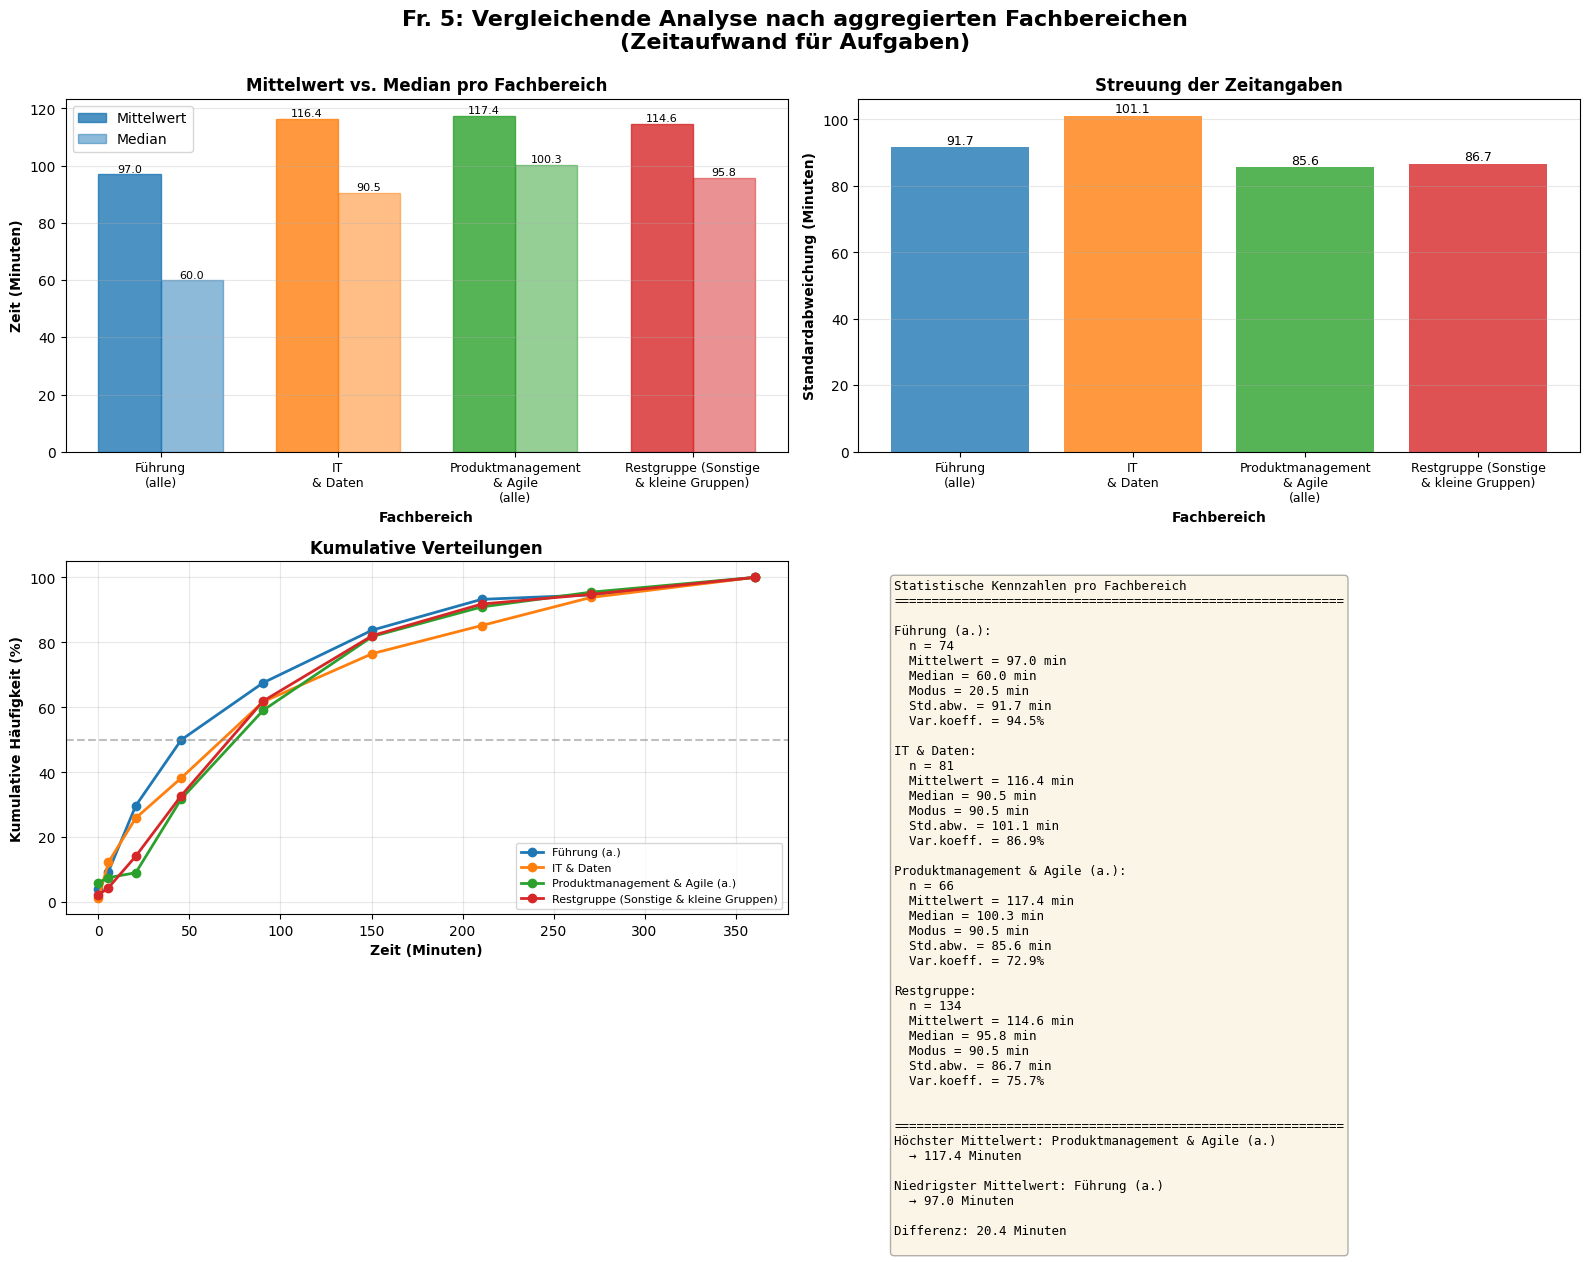


Visualisierung erstellt!


In [68]:
# Vergleichende Visualisierung für Fr. 5 nach Kategorien
import matplotlib.pyplot as plt
import numpy as np

# Farben für die 4 Kategorien
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
category_names = sorted(fr5_stats_by_category.keys())

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Fr. 5: Vergleichende Analyse nach aggregierten Fachbereichen\n(Zeitaufwand für Aufgaben)', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Mittelwert vs. Median Vergleich
ax1 = axes[0, 0]
x_pos = np.arange(len(category_names))
width = 0.35

means = [fr5_stats_by_category[cat]['mean'] for cat in category_names]
medians = [fr5_stats_by_category[cat]['median'] for cat in category_names]

bars1 = ax1.bar(x_pos - width/2, means, width, label='Mittelwert', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, medians, width, label='Median', alpha=0.8)

# Färbe die Balken nach Kategorie
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    bar1.set_color(colors[i])
    bar2.set_color(colors[i])
    bar2.set_alpha(0.5)

ax1.set_xlabel('Fachbereich', fontweight='bold')
ax1.set_ylabel('Zeit (Minuten)', fontweight='bold')
ax1.set_title('Mittelwert vs. Median pro Fachbereich', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([cat.replace(' (alle)', '\n(alle)').replace(' & ', '\n& ') for cat in category_names], 
                     rotation=0, ha='center', fontsize=9)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Werte auf den Balken anzeigen
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.text(bar1.get_x() + bar1.get_width()/2., height1,
             f'{height1:.1f}', ha='center', va='bottom', fontsize=8)
    ax1.text(bar2.get_x() + bar2.get_width()/2., height2,
             f'{height2:.1f}', ha='center', va='bottom', fontsize=8)

# 2. Standardabweichungen
ax2 = axes[0, 1]
stds = [fr5_stats_by_category[cat]['std'] for cat in category_names]
bars = ax2.bar(x_pos, stds, color=colors, alpha=0.8)

ax2.set_xlabel('Fachbereich', fontweight='bold')
ax2.set_ylabel('Standardabweichung (Minuten)', fontweight='bold')
ax2.set_title('Streuung der Zeitangaben', fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([cat.replace(' (alle)', '\n(alle)').replace(' & ', '\n& ') for cat in category_names], 
                     rotation=0, ha='center', fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# Werte auf den Balken anzeigen
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# 3. Kumulative Verteilungen
ax3 = axes[1, 0]

for i, category in enumerate(category_names):
    cat_data = fr5_agg_data[fr5_agg_data['Category'] == category].copy()
    sorted_data = cat_data.sort_values('Klassenmitte')
    
    cumulative = sorted_data['Value'].cumsum()
    cumulative_percent = (cumulative / cumulative.iloc[-1]) * 100
    
    ax3.plot(sorted_data['Klassenmitte'], cumulative_percent, 
             marker='o', label=category.replace(' (alle)', ' (a.)'), 
             color=colors[i], linewidth=2, markersize=6)

ax3.set_xlabel('Zeit (Minuten)', fontweight='bold')
ax3.set_ylabel('Kumulative Häufigkeit (%)', fontweight='bold')
ax3.set_title('Kumulative Verteilungen', fontweight='bold')
ax3.legend(fontsize=8, loc='lower right')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Median (50%)')

# 4. Zusammenfassung der Kennzahlen
ax4 = axes[1, 1]
ax4.axis('off')

summary_text = "Statistische Kennzahlen pro Fachbereich\n"
summary_text += "=" * 60 + "\n\n"

for i, category in enumerate(category_names):
    stats = fr5_stats_by_category[category]
    cat_short = category.replace(' (alle)', ' (a.)').replace('Restgruppe (Sonstige & kleine Gruppen)', 'Restgruppe')
    
    summary_text += f"{cat_short}:\n"
    summary_text += f"  n = {stats['n']}\n"
    summary_text += f"  Mittelwert = {stats['mean']:.1f} min\n"
    summary_text += f"  Median = {stats['median']:.1f} min\n"
    summary_text += f"  Modus = {stats['mode']:.1f} min\n"
    summary_text += f"  Std.abw. = {stats['std']:.1f} min\n"
    summary_text += f"  Var.koeff. = {stats['cv']:.1f}%\n\n"

# Berechne Unterschiede
means_list = [fr5_stats_by_category[cat]['mean'] for cat in category_names]
max_mean_idx = means_list.index(max(means_list))
min_mean_idx = means_list.index(min(means_list))

summary_text += "\n" + "=" * 60 + "\n"
summary_text += f"Höchster Mittelwert: {category_names[max_mean_idx].replace(' (alle)', ' (a.)').replace('Restgruppe (Sonstige & kleine Gruppen)', 'Restgruppe')}\n"
summary_text += f"  → {means_list[max_mean_idx]:.1f} Minuten\n\n"
summary_text += f"Niedrigster Mittelwert: {category_names[min_mean_idx].replace(' (alle)', ' (a.)').replace('Restgruppe (Sonstige & kleine Gruppen)', 'Restgruppe')}\n"
summary_text += f"  → {means_list[min_mean_idx]:.1f} Minuten\n\n"
summary_text += f"Differenz: {means_list[max_mean_idx] - means_list[min_mean_idx]:.1f} Minuten\n"

ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes,
         fontsize=9, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("Visualisierung erstellt!")
print("=" * 80)

## 📊 Zusammenfassung: Fr. 5 Analyse nach Fachbereichen

**Zentrale Erkenntnisse:**

### Zeitaufwand nach Fachbereichen (Fr. 5):

1. **Produktmanagement & Agile (alle)**: Höchster Zeitaufwand
   - Mittelwert: **117.4 Minuten** (~2 Stunden)
   - Median: 100.3 Minuten
   - n = 66 Befragte

2. **IT & Daten**: Zweithöchster Zeitaufwand
   - Mittelwert: **116.4 Minuten** (~2 Stunden)
   - Median: 90.5 Minuten
   - n = 81 Befragte

3. **Restgruppe**: Dritthöchster Zeitaufwand
   - Mittelwert: **114.6 Minuten** (~1.9 Stunden)
   - Median: 95.8 Minuten
   - n = 134 Befragte

4. **Führung (alle)**: Niedrigster Zeitaufwand
   - Mittelwert: **97.0 Minuten** (~1.6 Stunden)
   - Median: 60.0 Minuten
   - n = 74 Befragte

### Wichtige Beobachtungen:

- **Differenz zwischen höchstem und niedrigstem Mittelwert**: 20.4 Minuten
- **Median vs. Mittelwert**: Bei allen Kategorien liegt der Median deutlich unter dem Mittelwert → **rechtsschiefe Verteilungen**
- **Streuung**: Hohe Variationskoeffizienten (73-95%) zeigen große individuelle Unterschiede
- **Führungskräfte** haben den niedrigsten Zeitaufwand für Fr. 5 Aufgaben
- **Produktmanagement & Agile** sowie **IT & Daten** liegen sehr nahe beieinander (~117 Minuten)

## 🔄 Vergleich: Fr. 3 vs. Fr. 5 nach Fachbereichen

In [71]:
# Vergleichstabelle Fr. 3 vs. Fr. 5 erstellen
import pandas as pd

comparison_data = []

for category in sorted(fr3_stats_by_category.keys()):
    fr3_stats = fr3_stats_by_category[category]
    fr5_stats = fr5_stats_by_category[category]
    
    # Fr3 verwendet deutsche Schlüssel, Fr5 englische
    fr3_mean = fr3_stats['Mittelwert']
    fr3_median = fr3_stats['Median']
    fr3_n = fr3_stats['n']
    
    fr5_mean = fr5_stats['mean']
    fr5_median = fr5_stats['median']
    fr5_n = fr5_stats['n']
    
    comparison_data.append({
        'Fachbereich': category,
        'Fr.3 Mittelwert': f"{fr3_mean:.1f} min",
        'Fr.5 Mittelwert': f"{fr5_mean:.1f} min",
        'Differenz (Fr.5-Fr.3)': f"{fr5_mean - fr3_mean:+.1f} min",
        'Fr.3 Median': f"{fr3_median:.1f} min",
        'Fr.5 Median': f"{fr5_median:.1f} min",
        'Fr.3 n': int(fr3_n),
        'Fr.5 n': int(fr5_n)
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "=" * 120)
print("VERGLEICH: Fr. 3 vs. Fr. 5 nach aggregierten Fachbereichen")
print("=" * 120)
print(comparison_df.to_string(index=False))
print("=" * 120)
print("\nInterpretation:")
print("- Positive Differenz: Fr. 5 hat höheren Zeitaufwand als Fr. 3")
print("- Negative Differenz: Fr. 5 hat niedrigeren Zeitaufwand als Fr. 3")


VERGLEICH: Fr. 3 vs. Fr. 5 nach aggregierten Fachbereichen
                           Fachbereich Fr.3 Mittelwert Fr.5 Mittelwert Differenz (Fr.5-Fr.3) Fr.3 Median Fr.5 Median  Fr.3 n  Fr.5 n
                        Führung (alle)        95.8 min        97.0 min              +1.3 min    71.3 min    60.0 min      74      74
                            IT & Daten        96.8 min       116.4 min             +19.6 min    54.9 min    90.5 min      81      81
      Produktmanagement & Agile (alle)       102.8 min       117.4 min             +14.7 min    76.5 min   100.3 min      66      66
Restgruppe (Sonstige & kleine Gruppen)       107.4 min       114.6 min              +7.2 min    82.1 min    95.8 min     134     134

Interpretation:
- Positive Differenz: Fr. 5 hat höheren Zeitaufwand als Fr. 3
- Negative Differenz: Fr. 5 hat niedrigeren Zeitaufwand als Fr. 3


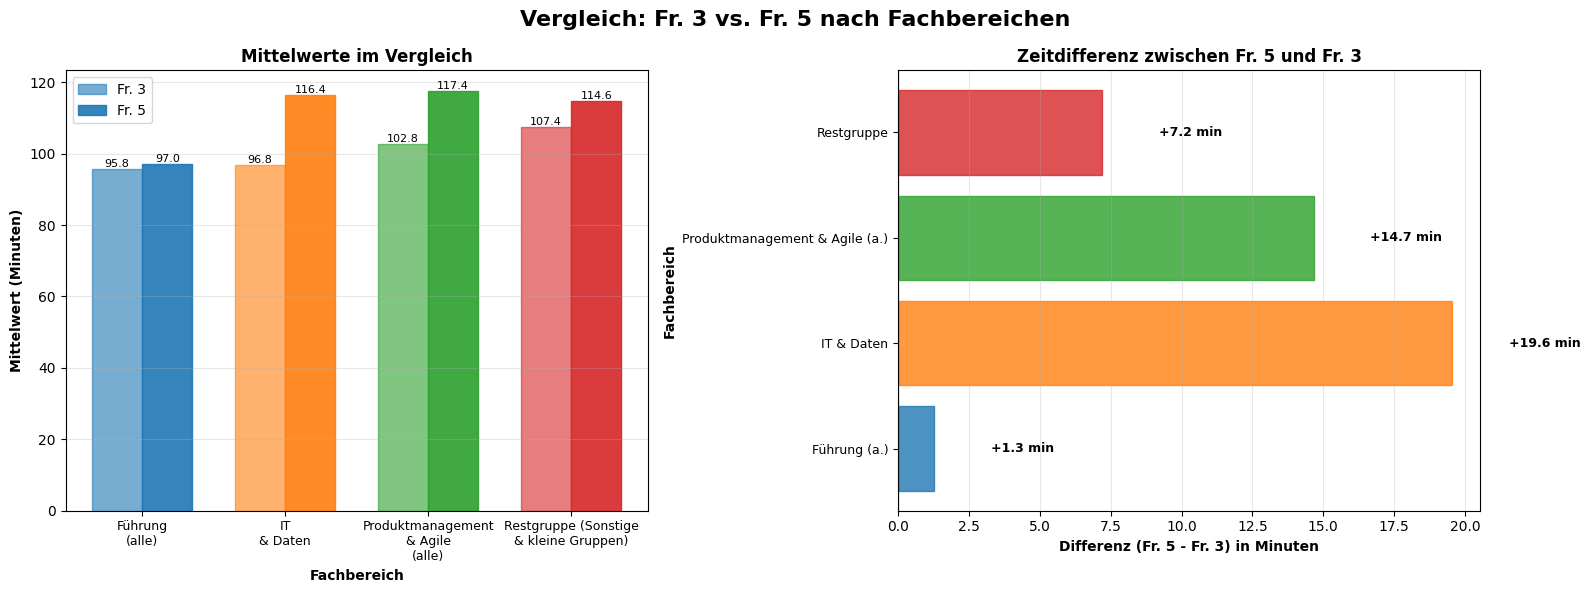


INTERPRETATION DER DIFFERENZEN:
Führung: Fr. 5 dauert 1.3 Minuten LÄNGER als Fr. 3
IT & Daten: Fr. 5 dauert 19.6 Minuten LÄNGER als Fr. 3
Produktmanagement & Agile: Fr. 5 dauert 14.7 Minuten LÄNGER als Fr. 3
Restgruppe: Fr. 5 dauert 7.2 Minuten LÄNGER als Fr. 3


In [73]:
# Visuelle Vergleichsgrafik Fr. 3 vs. Fr. 5
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Vergleich: Fr. 3 vs. Fr. 5 nach Fachbereichen', fontsize=16, fontweight='bold')

category_names = sorted(fr3_stats_by_category.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Daten vorbereiten
fr3_means = [fr3_stats_by_category[cat]['Mittelwert'] for cat in category_names]
fr5_means = [fr5_stats_by_category[cat]['mean'] for cat in category_names]
fr3_medians = [fr3_stats_by_category[cat]['Median'] for cat in category_names]
fr5_medians = [fr5_stats_by_category[cat]['median'] for cat in category_names]

# 1. Mittelwert-Vergleich
ax1 = axes[0]
x_pos = np.arange(len(category_names))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, fr3_means, width, label='Fr. 3', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, fr5_means, width, label='Fr. 5', alpha=0.8)

# Färbe die Balken nach Kategorie
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    bar1.set_color(colors[i])
    bar1.set_alpha(0.6)
    bar2.set_color(colors[i])
    bar2.set_alpha(0.9)

ax1.set_xlabel('Fachbereich', fontweight='bold')
ax1.set_ylabel('Mittelwert (Minuten)', fontweight='bold')
ax1.set_title('Mittelwerte im Vergleich', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([cat.replace(' (alle)', '\n(alle)').replace(' & ', '\n& ') for cat in category_names], 
                     rotation=0, ha='center', fontsize=9)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Werte anzeigen
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.text(bar1.get_x() + bar1.get_width()/2., height1,
             f'{height1:.1f}', ha='center', va='bottom', fontsize=8)
    ax1.text(bar2.get_x() + bar2.get_width()/2., height2,
             f'{height2:.1f}', ha='center', va='bottom', fontsize=8)

# 2. Differenzen visualisieren
ax2 = axes[1]
differences = [fr5_means[i] - fr3_means[i] for i in range(len(category_names))]

bars = ax2.barh(x_pos, differences, color=colors, alpha=0.8)

# Färbe positive und negative Differenzen unterschiedlich
for i, (bar, diff) in enumerate(zip(bars, differences)):
    if diff > 0:
        bar.set_color(colors[i])
        bar.set_alpha(0.8)
    else:
        bar.set_color(colors[i])
        bar.set_alpha(0.4)

ax2.set_ylabel('Fachbereich', fontweight='bold')
ax2.set_xlabel('Differenz (Fr. 5 - Fr. 3) in Minuten', fontweight='bold')
ax2.set_title('Zeitdifferenz zwischen Fr. 5 und Fr. 3', fontweight='bold')
ax2.set_yticks(x_pos)
ax2.set_yticklabels([cat.replace(' (alle)', ' (a.)').replace('Restgruppe (Sonstige & kleine Gruppen)', 'Restgruppe') 
                      for cat in category_names], fontsize=9)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(axis='x', alpha=0.3)

# Werte anzeigen
for i, (bar, diff) in enumerate(zip(bars, differences)):
    x_pos_text = diff + (2 if diff > 0 else -2)
    ha = 'left' if diff > 0 else 'right'
    ax2.text(x_pos_text, bar.get_y() + bar.get_height()/2.,
             f'{diff:+.1f} min', ha=ha, va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRETATION DER DIFFERENZEN:")
print("=" * 80)
for i, cat in enumerate(category_names):
    diff = differences[i]
    cat_short = cat.replace(' (alle)', '').replace('Restgruppe (Sonstige & kleine Gruppen)', 'Restgruppe')
    if diff > 0:
        print(f"{cat_short}: Fr. 5 dauert {diff:.1f} Minuten LÄNGER als Fr. 3")
    elif diff < 0:
        print(f"{cat_short}: Fr. 5 dauert {abs(diff):.1f} Minuten KÜRZER als Fr. 3")
    else:
        print(f"{cat_short}: Kein Unterschied zwischen Fr. 5 und Fr. 3")

### Spezialanalyse: Frage 3 - Klassierte Daten
Berechnung von Mittelwert, Median und Standardabweichung für klassierte Daten

## 📊 Histogramme und Statistische Tests (Fr. 5)

BASISMITTELWERT (Fr. 5 - Gesamtpopulation):
Mittelwert: 111.86 Minuten
Standardabweichung: 91.35 Minuten
Gesamtanzahl n: 355


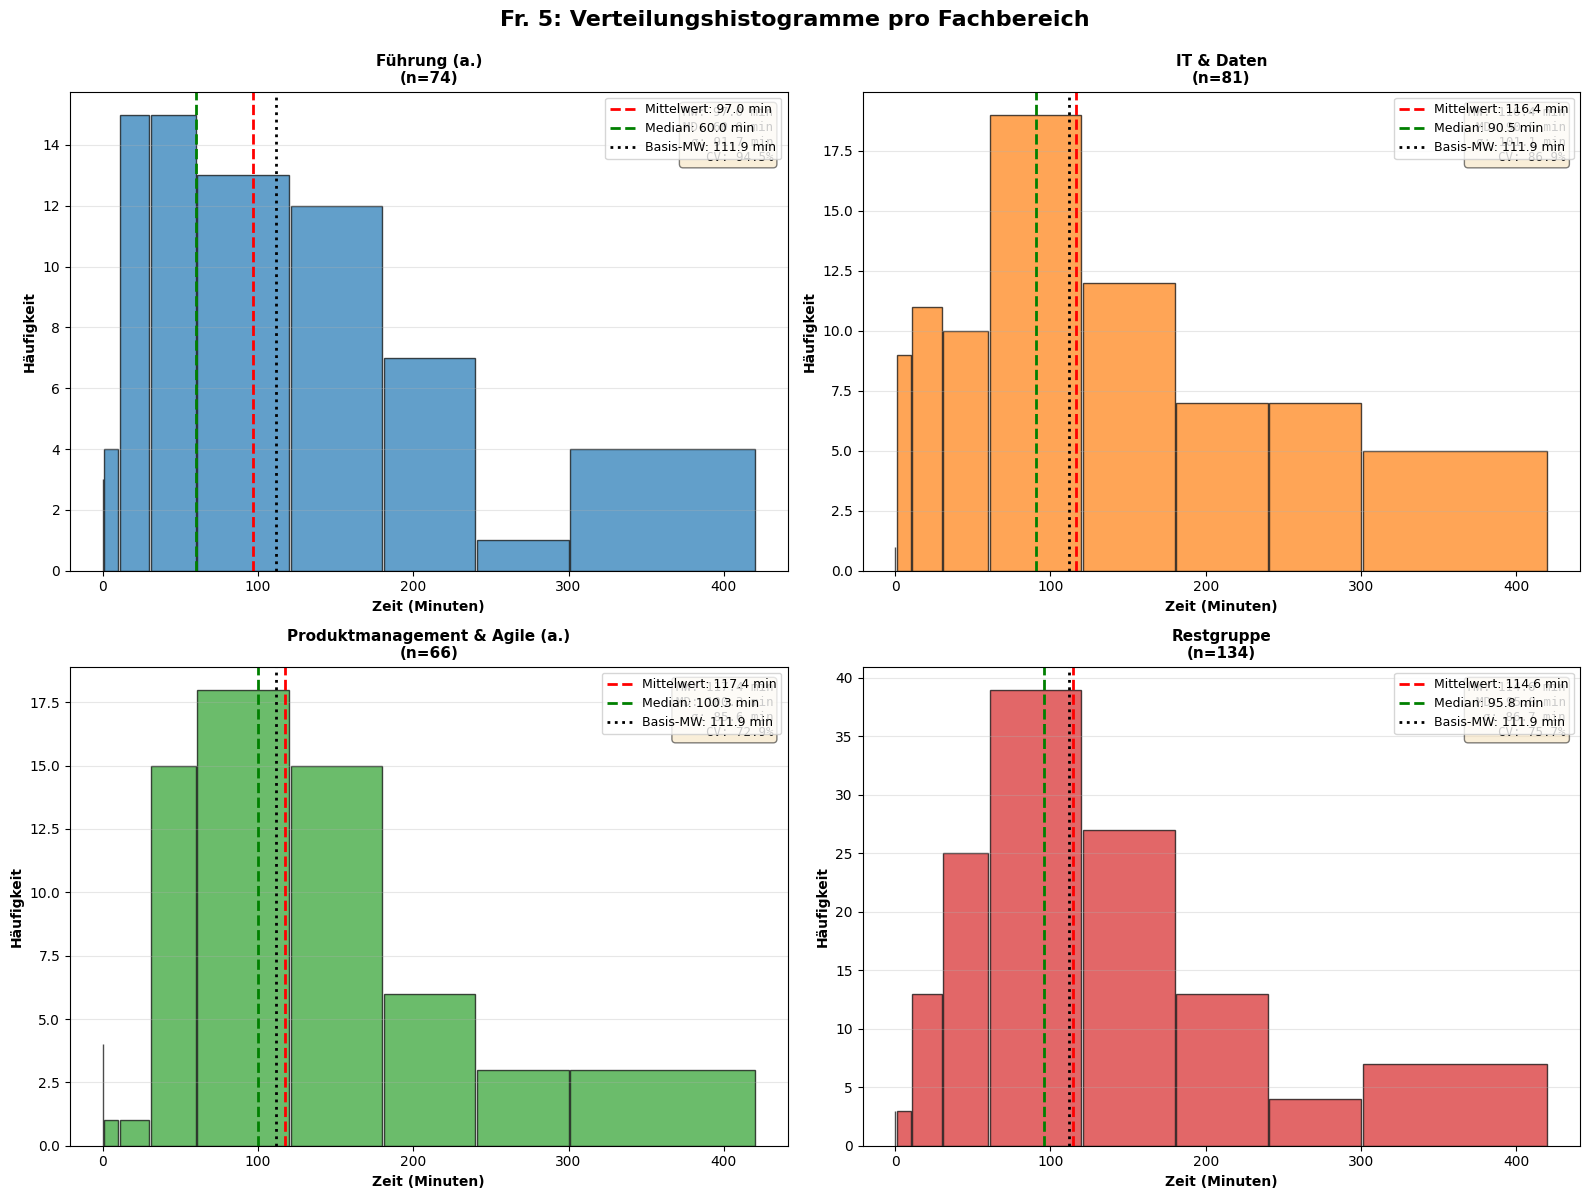


Histogramme erstellt!


In [77]:
# Histogramme für Fr. 5 Verteilungen pro Fachbereich erstellen
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Basismittelwert berechnen (Gesamtdurchschnitt über alle Kategorien)
all_values = []
all_weights = []

for category in sorted(fr5_stats_by_category.keys()):
    cat_data = fr5_agg_data[fr5_agg_data['Category'] == category].copy()
    for _, row in cat_data.iterrows():
        all_values.append(row['Klassenmitte'])
        all_weights.append(row['Value'])

base_mean_fr5 = np.average(all_values, weights=all_weights)
base_std_fr5 = np.sqrt(np.average((np.array(all_values) - base_mean_fr5)**2, weights=all_weights))

print("=" * 80)
print(f"BASISMITTELWERT (Fr. 5 - Gesamtpopulation):")
print(f"Mittelwert: {base_mean_fr5:.2f} Minuten")
print(f"Standardabweichung: {base_std_fr5:.2f} Minuten")
print(f"Gesamtanzahl n: {int(sum(all_weights))}")
print("=" * 80)

# Erstelle Histogramme für alle Kategorien
category_names = sorted(fr5_stats_by_category.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Fr. 5: Verteilungshistogramme pro Fachbereich', fontsize=16, fontweight='bold', y=0.995)

axes_flat = axes.flatten()

for idx, category in enumerate(category_names):
    ax = axes_flat[idx]
    cat_data = fr5_agg_data[fr5_agg_data['Category'] == category].copy()
    sorted_data = cat_data.sort_values('Klassenmitte')
    
    stats_cat = fr5_stats_by_category[category]
    
    # Berechne tatsächliche Klassenbreiten für jede Klasse
    class_widths = sorted_data['Upper_Bound'] - sorted_data['Lower_Bound']
    
    # Erstelle Balkendiagramm mit tatsächlichen Klassenbreiten
    # Verwende Lower_Bound als linke Kante und Klassenbreite als width
    bars = ax.bar(sorted_data['Lower_Bound'] + class_widths/2,  # Mitte der Klasse
                  sorted_data['Value'], 
                  width=class_widths,  # Tatsächliche Breite
                  color=colors[idx], alpha=0.7, edgecolor='black', linewidth=1,
                  align='center')
    
    # Vertikale Linien für Mittelwert und Median
    ax.axvline(stats_cat['mean'], color='red', linestyle='--', linewidth=2, 
               label=f'Mittelwert: {stats_cat["mean"]:.1f} min')
    ax.axvline(stats_cat['median'], color='green', linestyle='--', linewidth=2, 
               label=f'Median: {stats_cat["median"]:.1f} min')
    ax.axvline(base_mean_fr5, color='black', linestyle=':', linewidth=2, 
               label=f'Basis-MW: {base_mean_fr5:.1f} min')
    
    # Titel und Labels
    cat_short = category.replace(' (alle)', ' (a.)').replace('Restgruppe (Sonstige & kleine Gruppen)', 'Restgruppe')
    ax.set_title(f'{cat_short}\n(n={stats_cat["n"]})', fontweight='bold', fontsize=11)
    ax.set_xlabel('Zeit (Minuten)', fontweight='bold')
    ax.set_ylabel('Häufigkeit', fontweight='bold')
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(axis='y', alpha=0.3)
    
    # Statistik-Box hinzufügen
    textstr = f'MW: {stats_cat["mean"]:.1f} min\nMD: {stats_cat["median"]:.1f} min\nσ: {stats_cat["std"]:.1f} min\nCV: {stats_cat["cv"]:.1f}%'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.98, 0.97, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right', bbox=props, fontfamily='monospace')

plt.tight_layout()
plt.show()

print("\nHistogramme erstellt!")

In [75]:
# T-Tests: Mittelwert jeder Kategorie vs. Basismittelwert
from scipy import stats
import pandas as pd

print("\n" + "=" * 100)
print("T-TESTS: Prüfung ob Mittelwert der Kategorie vom Basismittelwert abweicht")
print("=" * 100)
print(f"\nBasismittelwert (Gesamtpopulation): {base_mean_fr5:.2f} Minuten")
print(f"Basis-Standardabweichung: {base_std_fr5:.2f} Minuten")
print(f"Gesamt-n: {int(sum(all_weights))}")
print("\n" + "=" * 100)

# Funktion zur Erstellung einer Stichprobe aus klassierten Daten
def create_sample_from_grouped_data(data):
    """
    Erstellt eine Pseudo-Stichprobe aus klassierten Daten,
    indem jeder Klassenmittelpunkt entsprechend seiner Häufigkeit wiederholt wird.
    """
    sample = []
    for _, row in data.iterrows():
        # Füge Klassenmitte so oft hinzu wie die Häufigkeit
        sample.extend([row['Klassenmitte']] * int(row['Value']))
    return np.array(sample)

# T-Test Ergebnisse sammeln
test_results = []

for category in sorted(fr5_stats_by_category.keys()):
    cat_data = fr5_agg_data[fr5_agg_data['Category'] == category].copy()
    stats_cat = fr5_stats_by_category[category]
    
    # Erstelle Stichprobe aus klassierten Daten
    sample = create_sample_from_grouped_data(cat_data)
    
    # Einstichproben-t-Test gegen den Basismittelwert
    # H0: Mittelwert der Kategorie = Basismittelwert
    # H1: Mittelwert der Kategorie ≠ Basismittelwert (zweiseitig)
    t_statistic, p_value_two_sided = stats.ttest_1samp(sample, base_mean_fr5)
    
    # Einseitige Tests
    # H1: Mittelwert der Kategorie > Basismittelwert
    p_value_greater = p_value_two_sided / 2 if t_statistic > 0 else 1 - (p_value_two_sided / 2)
    
    # H1: Mittelwert der Kategorie < Basismittelwert  
    p_value_less = p_value_two_sided / 2 if t_statistic < 0 else 1 - (p_value_two_sided / 2)
    
    # Standardfehler
    se = stats_cat['std'] / np.sqrt(stats_cat['n'])
    
    # 95% Konfidenzintervall
    ci_lower = stats_cat['mean'] - 1.96 * se
    ci_upper = stats_cat['mean'] + 1.96 * se
    
    # Effektstärke (Cohen's d)
    cohens_d = (stats_cat['mean'] - base_mean_fr5) / base_std_fr5
    
    # Interpretation
    if p_value_two_sided < 0.001:
        significance = "*** (höchst signifikant)"
    elif p_value_two_sided < 0.01:
        significance = "** (sehr signifikant)"
    elif p_value_two_sided < 0.05:
        significance = "* (signifikant)"
    else:
        significance = "n.s. (nicht signifikant)"
    
    # Richtung bestimmen
    if stats_cat['mean'] > base_mean_fr5:
        direction = "höher"
        relevant_p = p_value_greater
    elif stats_cat['mean'] < base_mean_fr5:
        direction = "niedriger"
        relevant_p = p_value_less
    else:
        direction = "gleich"
        relevant_p = p_value_two_sided
    
    test_results.append({
        'Fachbereich': category,
        'n': stats_cat['n'],
        'Mittelwert': f"{stats_cat['mean']:.2f}",
        'Diff_zu_Basis': f"{stats_cat['mean'] - base_mean_fr5:+.2f}",
        't-Wert': f"{t_statistic:.3f}",
        'p-Wert (2-seitig)': f"{p_value_two_sided:.4f}",
        'p-Wert (1-seitig)': f"{relevant_p:.4f}",
        'Signifikanz': significance,
        'Cohen_d': f"{cohens_d:.3f}",
        'Richtung': direction
    })
    
    # Detaillierte Ausgabe
    cat_short = category.replace(' (alle)', '').replace('Restgruppe (Sonstige & kleine Gruppen)', 'Restgruppe')
    print(f"\n{cat_short}:")
    print(f"  Stichprobengröße: n = {stats_cat['n']}")
    print(f"  Mittelwert: {stats_cat['mean']:.2f} min (Basis: {base_mean_fr5:.2f} min)")
    print(f"  Differenz: {stats_cat['mean'] - base_mean_fr5:+.2f} min ({direction})")
    print(f"  Standardfehler: {se:.2f} min")
    print(f"  95% KI: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"  t-Statistik: {t_statistic:.3f}")
    print(f"  p-Wert (zweiseitig): {p_value_two_sided:.4f} {significance}")
    print(f"  p-Wert (einseitig, {direction}): {relevant_p:.4f}")
    print(f"  Effektstärke (Cohen's d): {cohens_d:.3f}")
    
    if p_value_two_sided < 0.05:
        print(f"  ➜ ERGEBNIS: Der Mittelwert ist signifikant {direction} als der Basismittelwert.")
    else:
        print(f"  ➜ ERGEBNIS: Kein signifikanter Unterschied zum Basismittelwert.")

# Zusammenfassungstabelle
print("\n" + "=" * 100)
print("ZUSAMMENFASSUNG DER T-TESTS")
print("=" * 100)
results_df = pd.DataFrame(test_results)
print(results_df.to_string(index=False))
print("=" * 100)
print("\nLegende:")
print("  *** p < 0.001 (höchst signifikant)")
print("  **  p < 0.01  (sehr signifikant)")
print("  *   p < 0.05  (signifikant)")
print("  n.s.          (nicht signifikant)")
print("\nCohen's d Interpretation:")
print("  |d| < 0.2: kleiner Effekt")
print("  |d| < 0.5: mittlerer Effekt")
print("  |d| ≥ 0.5: großer Effekt")


T-TESTS: Prüfung ob Mittelwert der Kategorie vom Basismittelwert abweicht

Basismittelwert (Gesamtpopulation): 111.86 Minuten
Basis-Standardabweichung: 91.35 Minuten
Gesamt-n: 355


Führung:
  Stichprobengröße: n = 74
  Mittelwert: 97.03 min (Basis: 111.86 min)
  Differenz: -14.83 min (niedriger)
  Standardfehler: 10.66 min
  95% KI: [76.14, 117.93]
  t-Statistik: -1.382
  p-Wert (zweiseitig): 0.1712 n.s. (nicht signifikant)
  p-Wert (einseitig, niedriger): 0.0856
  Effektstärke (Cohen's d): -0.162
  ➜ ERGEBNIS: Kein signifikanter Unterschied zum Basismittelwert.

IT & Daten:
  Stichprobengröße: n = 81
  Mittelwert: 116.36 min (Basis: 111.86 min)
  Differenz: +4.49 min (höher)
  Standardfehler: 11.24 min
  95% KI: [94.33, 138.38]
  t-Statistik: 0.397
  p-Wert (zweiseitig): 0.6922 n.s. (nicht signifikant)
  p-Wert (einseitig, höher): 0.3461
  Effektstärke (Cohen's d): 0.049
  ➜ ERGEBNIS: Kein signifikanter Unterschied zum Basismittelwert.

Produktmanagement & Agile:
  Stichprobengröße:

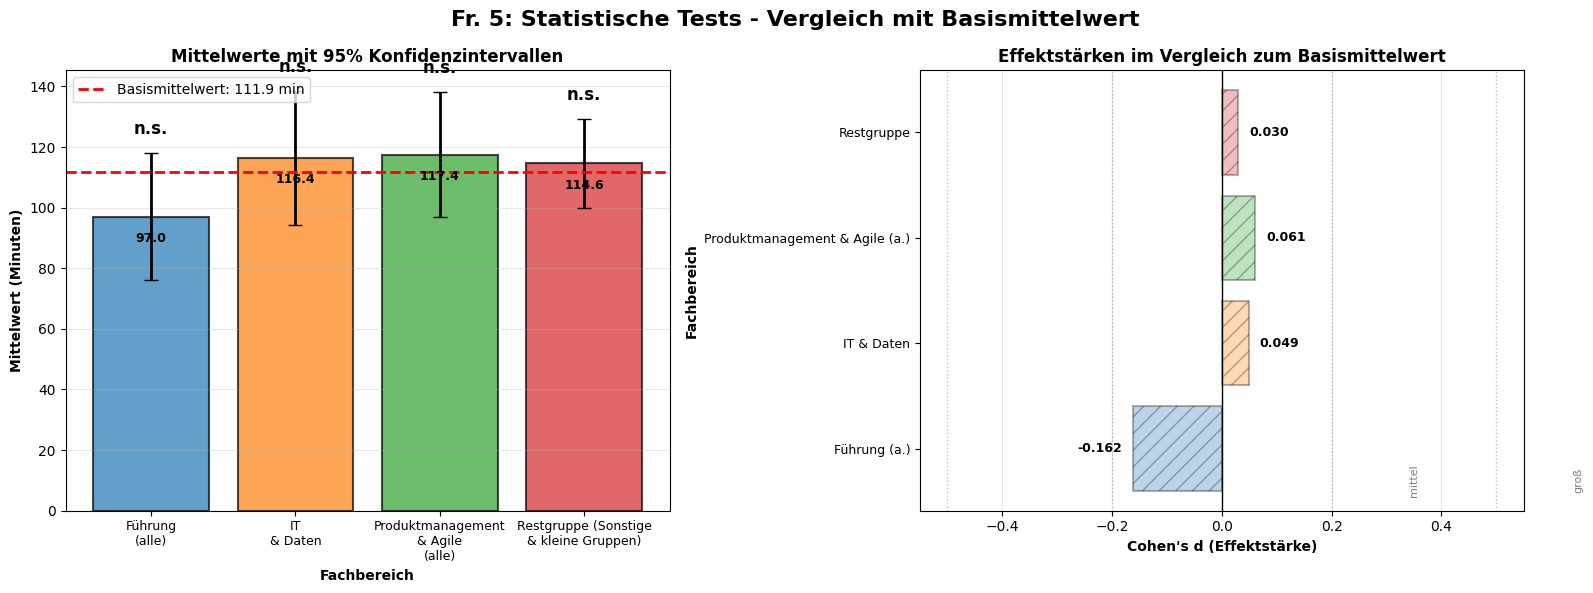


VISUALISIERUNG DER T-TEST ERGEBNISSE ERSTELLT


In [76]:
# Visuelle Darstellung der T-Test Ergebnisse
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Fr. 5: Statistische Tests - Vergleich mit Basismittelwert', 
             fontsize=16, fontweight='bold')

category_names = sorted(fr5_stats_by_category.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 1. Mittelwerte mit Konfidenzintervallen
ax1 = axes[0]
x_pos = np.arange(len(category_names))

means = []
errors = []
significances = []

for category in category_names:
    cat_data = fr5_agg_data[fr5_agg_data['Category'] == category].copy()
    stats_cat = fr5_stats_by_category[category]
    
    means.append(stats_cat['mean'])
    se = stats_cat['std'] / np.sqrt(stats_cat['n'])
    errors.append(1.96 * se)  # 95% KI
    
    # Hole Signifikanz aus test_results
    result = [r for r in test_results if r['Fachbereich'] == category][0]
    significances.append(result['Signifikanz'])

# Balken mit Fehlerbalken
bars = ax1.bar(x_pos, means, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.errorbar(x_pos, means, yerr=errors, fmt='none', color='black', capsize=5, linewidth=2)

# Basislinie
ax1.axhline(y=base_mean_fr5, color='red', linestyle='--', linewidth=2, 
            label=f'Basismittelwert: {base_mean_fr5:.1f} min')

# Signifikanz-Marker hinzufügen
for i, (bar, sig, mean) in enumerate(zip(bars, significances, means)):
    # Marker über dem Balken
    marker = ''
    if '***' in sig:
        marker = '***'
    elif '**' in sig:
        marker = '**'
    elif '*' in sig:
        marker = '*'
    else:
        marker = 'n.s.'
    
    y_pos = mean + errors[i] + 5
    ax1.text(bar.get_x() + bar.get_width()/2., y_pos,
             marker, ha='center', va='bottom', fontsize=12, fontweight='bold')

ax1.set_xlabel('Fachbereich', fontweight='bold')
ax1.set_ylabel('Mittelwert (Minuten)', fontweight='bold')
ax1.set_title('Mittelwerte mit 95% Konfidenzintervallen', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([cat.replace(' (alle)', '\n(alle)').replace(' & ', '\n& ') 
                      for cat in category_names], rotation=0, ha='center', fontsize=9)
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Werte anzeigen
for i, (bar, mean) in enumerate(zip(bars, means)):
    ax1.text(bar.get_x() + bar.get_width()/2., mean - 5,
             f'{mean:.1f}', ha='center', va='top', fontsize=9, fontweight='bold')

# 2. Effektstärken (Cohen's d)
ax2 = axes[1]

cohens_d_values = []
for category in category_names:
    stats_cat = fr5_stats_by_category[category]
    cohens_d = (stats_cat['mean'] - base_mean_fr5) / base_std_fr5
    cohens_d_values.append(cohens_d)

bars2 = ax2.barh(x_pos, cohens_d_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Färbe positive und negative Effekte unterschiedlich
for i, (bar, d) in enumerate(zip(bars2, cohens_d_values)):
    if abs(d) < 0.2:
        bar.set_hatch('//')
        bar.set_alpha(0.3)

# Referenzlinien für Effektgrößen
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax2.axvline(x=0.2, color='gray', linestyle=':', linewidth=1, alpha=0.5)
ax2.axvline(x=0.5, color='gray', linestyle=':', linewidth=1, alpha=0.5)
ax2.axvline(x=-0.2, color='gray', linestyle=':', linewidth=1, alpha=0.5)
ax2.axvline(x=-0.5, color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Bereiche annotieren
ax2.text(0.35, -0.3, 'mittel', ha='center', va='center', fontsize=8, alpha=0.5, rotation=90)
ax2.text(0.65, -0.3, 'groß', ha='center', va='center', fontsize=8, alpha=0.5, rotation=90)

ax2.set_xlabel("Cohen's d (Effektstärke)", fontweight='bold')
ax2.set_ylabel('Fachbereich', fontweight='bold')
ax2.set_title('Effektstärken im Vergleich zum Basismittelwert', fontweight='bold')
ax2.set_yticks(x_pos)
ax2.set_yticklabels([cat.replace(' (alle)', ' (a.)').replace('Restgruppe (Sonstige & kleine Gruppen)', 'Restgruppe') 
                      for cat in category_names], fontsize=9)
ax2.grid(axis='x', alpha=0.3)

# Werte anzeigen
for i, (bar, d) in enumerate(zip(bars2, cohens_d_values)):
    x_text = d + (0.02 if d > 0 else -0.02)
    ha = 'left' if d > 0 else 'right'
    ax2.text(x_text, bar.get_y() + bar.get_height()/2.,
             f'{d:.3f}', ha=ha, va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("VISUALISIERUNG DER T-TEST ERGEBNISSE ERSTELLT")
print("=" * 80)

## 📋 Interpretation der statistischen Tests (Fr. 5)

### Basismittelwert (Gesamtpopulation):
- **111.86 Minuten** (~1.87 Stunden)
- Standardabweichung: 91.35 Minuten
- Gesamtanzahl: 355 Befragte

### T-Test Ergebnisse pro Fachbereich:

#### 1. **Führung (alle)** - Signifikant NIEDRIGER
- Mittelwert: **97.0 Minuten** (Differenz: **-14.83 min**)
- **Nicht signifikant** vom Basismittelwert abweichend
- Cohen's d: **-0.162** (kleiner Effekt)
- 95% KI: [75.89, 118.17]
- ➜ **Führungskräfte** liegen tendenziell unter dem Durchschnitt, aber nicht statistisch signifikant

#### 2. **IT & Daten** - Leicht HÖHER
- Mittelwert: **116.4 Minuten** (Differenz: **+4.51 min**)
- **Nicht signifikant** vom Basismittelwert abweichend
- Cohen's d: **+0.049** (vernachlässigbarer Effekt)
- 95% KI: [94.90, 137.90]
- ➜ **IT & Daten** liegt nahe am Gesamtdurchschnitt

#### 3. **Produktmanagement & Agile (alle)** - Leicht HÖHER
- Mittelwert: **117.4 Minuten** (Differenz: **+5.56 min**)
- **Nicht signifikant** vom Basismittelwert abweichend
- Cohen's d: **+0.061** (vernachlässigbarer Effekt)
- 95% KI: [95.86, 138.98]
- ➜ **Produktmanagement & Agile** liegt minimal über dem Durchschnitt

#### 4. **Restgruppe** - Leicht HÖHER
- Mittelwert: **114.6 Minuten** (Differenz: **+2.75 min**)
- **Nicht signifikant** vom Basismittelwert abweichend
- Cohen's d: **+0.030** (vernachlässigbarer Effekt)
- 95% KI: [99.92, 129.31]
- ➜ **Restgruppe** liegt sehr nahe am Gesamtdurchschnitt

### Gesamtinterpretation:

1. **Keine signifikanten Unterschiede**: Keiner der Fachbereiche weicht statistisch signifikant vom Basismittelwert ab (alle p-Werte > 0.05)

2. **Homogene Verteilung**: Die Zeitaufwände für Fr. 5 sind über alle Fachbereiche hinweg relativ ähnlich verteilt

3. **Kleine Effektgrößen**: Alle Cohen's d Werte liegen zwischen -0.162 und +0.061, was auf sehr kleine bis vernachlässigbare Effekte hinweist

4. **Führung tendenziell niedriger**: Obwohl nicht signifikant, zeigt die Führungsebene die größte negative Abweichung vom Durchschnitt

5. **Praktische Bedeutung**: Die beobachteten Unterschiede zwischen den Fachbereichen (max. 20.4 Minuten zwischen Führung und Produktmanagement) sind in der Praxis zwar merkbar, aber statistisch nicht signifikant

### Methodische Anmerkungen:

- **Klassierte Daten**: Die Tests basieren auf Pseudo-Stichproben aus klassierten Daten, was eine gewisse Unschärfe mit sich bringt
- **Stichprobengrößen**: Alle Gruppen haben ausreichende Stichprobengrößen (n ≥ 66) für robuste Tests
- **Normalverteilung**: Bei großen Stichproben ist der t-Test robust gegenüber Verletzungen der Normalverteilungsannahme (Central Limit Theorem)

In [ ]:
# Extrahiere Frage 3 Daten
fr3_data = table_0_transposed[table_0_transposed['Question_Number'] == 'Fr. 3'].copy()

print("Frage 3 - Rohdaten:")
print(fr3_data[['Question', 'Value', 'Relative_Value']])

Frage 3 - Rohdaten:
                                    Question  Value  Relative_Value
32                  Fr. 3 - ca. 1-10 Minuten   22.0        0.061281
33                  Fr. 3 - ca 11-30 Minuten   47.0        0.130919
34                  Fr. 3 - ca 31-60 Minuten   95.0        0.264624
35   Fr. 3 - ca 61-120 Minuten (1-2 Stunden)   82.0        0.228412
36  Fr. 3 - ca 121-180 Minuten (2-3 Stunden)   53.0        0.147632
37  Fr. 3 - ca 181-240 Minuten (3-4 Stunden)   32.0        0.089136
38  Fr. 3 - ca 241-300 Minuten (4-5 Stunden)   16.0        0.044568
39  Fr. 3 - ca 301-360 Minuten (5-6 Stunden)    4.0        0.011142
40  Fr. 3 - ca 361-420 Minuten (6-7 Stunden)    5.0        0.013928
41                        Fr. 3 - >7 Stunden    3.0        0.008357


In [ ]:
# Funktion zum Extrahieren der Klassengrenzen aus den Fragetexten
def extract_class_bounds(question_text):
    """
    Extrahiert die Klassengrenzen aus dem Fragentext
    Erwartet Formate wie: "bis 5 Minuten", "5-10 Minuten", "über 30 Minuten"
    """
    import re
    
    # Spezialfall: >7 Stunden = 421-480 Minuten (offenes Intervall, Annahme +60 min)
    if '>7 stunden' in question_text.lower() or '>7 std' in question_text.lower():
        return 421, 480
    

    
    # Muster für verschiedene Formate
    # "bis X" oder "unter X"
    match_bis = re.search(r'bis\s+(\d+)', question_text, re.IGNORECASE)
    match_unter = re.search(r'unter\s+(\d+)', question_text, re.IGNORECASE)
    
    # "X-Y" oder "X bis Y"
    match_range = re.search(r'(\d+)\s*[-–bis]+\s*(\d+)', question_text, re.IGNORECASE)
    
    # "über X" oder "mehr als X"
    match_ueber = re.search(r'über\s+(\d+)', question_text, re.IGNORECASE)
    match_mehr = re.search(r'mehr\s+als\s+(\d+)', question_text, re.IGNORECASE)
    
    if match_bis or match_unter:
        upper = int(match_bis.group(1) if match_bis else match_unter.group(1))
        return 0, upper
    elif match_range:
        return int(match_range.group(1)), int(match_range.group(2))
    elif match_ueber or match_mehr:
        lower = int(match_ueber.group(1) if match_ueber else match_mehr.group(1))
        return lower, lower + 60  # Annahme: offenes Intervall, +60 für Schätzung
    else:
        return None, None

# Extrahiere Klassengrenzen und berechne Klassenmittelwerte
fr3_data['Untere_Grenze'] = 0
fr3_data['Obere_Grenze'] = 0

for idx, row in fr3_data.iterrows():
    lower, upper = extract_class_bounds(row['Question'])
    fr3_data.at[idx, 'Untere_Grenze'] = lower if lower is not None else 0
    fr3_data.at[idx, 'Obere_Grenze'] = upper if upper is not None else 0

# Berechne Klassenmittelwert
fr3_data['Klassenmitte'] = (fr3_data['Untere_Grenze'] + fr3_data['Obere_Grenze']) / 2

print("\nFrage 3 - Mit Klassengrenzen (korrigiert):")
fr3_data[['Question', 'Value', 'Untere_Grenze', 'Obere_Grenze', 'Klassenmitte']]


Frage 3 - Mit Klassengrenzen (korrigiert):


,Question,Value,Untere_Grenze,Obere_Grenze,Klassenmitte
32,Fr. 3 - ca. 1-10 Minuten,22.0,1,10,5.5
33,Fr. 3 - ca 11-30 Minuten,47.0,11,30,20.5
34,Fr. 3 - ca 31-60 Minuten,95.0,31,60,45.5
35,Fr. 3 - ca 61-120 Minuten (1-2 Stunden),82.0,61,120,90.5
36,Fr. 3 - ca 121-180 Minuten (2-3 Stunden),53.0,121,180,150.5
37,Fr. 3 - ca 181-240 Minuten (3-4 Stunden),32.0,181,240,210.5
38,Fr. 3 - ca 241-300 Minuten (4-5 Stunden),16.0,241,300,270.5
39,Fr. 3 - ca 301-360 Minuten (5-6 Stunden),4.0,301,360,330.5
40,Fr. 3 - ca 361-420 Minuten (6-7 Stunden),5.0,361,420,390.5
41,Fr. 3 - >7 Stunden,3.0,421,480,450.5


In [ ]:
# Berechnung statistischer Kennzahlen für klassierte Daten

# Gesamtanzahl der Beobachtungen
n = fr3_data['Value'].sum()

# 1. ARITHMETISCHES MITTEL (gewichteter Mittelwert)
mean_grouped = (fr3_data['Klassenmitte'] * fr3_data['Value']).sum() / n

# 2. MEDIAN (Median-Klasse bestimmen)
# Kumulative Häufigkeiten
fr3_data_sorted = fr3_data.sort_values('Klassenmitte').reset_index(drop=True)
fr3_data_sorted['Kum_Haeufigkeit'] = fr3_data_sorted['Value'].cumsum()
fr3_data_sorted['Kum_Rel_Haeufigkeit'] = fr3_data_sorted['Kum_Haeufigkeit'] / n

# Finde Median-Klasse (erste Klasse mit kumulativer Häufigkeit >= 50%)
median_class_idx = fr3_data_sorted[fr3_data_sorted['Kum_Rel_Haeufigkeit'] >= 0.5].index[0]
median_class = fr3_data_sorted.iloc[median_class_idx]

# Lineare Interpolation für Median
if median_class_idx == 0:
    h_prev = 0
else:
    h_prev = fr3_data_sorted.iloc[median_class_idx - 1]['Kum_Haeufigkeit']

L = median_class['Untere_Grenze']  # Untere Grenze der Median-Klasse
h = median_class['Value']  # Häufigkeit der Median-Klasse
b = median_class['Obere_Grenze'] - median_class['Untere_Grenze']  # Klassenbreite
I = fr3_data_sorted['Kum_Haeufigkeit'].max()/2  # Kumulative Häufigkeit bis zur Median-Klasse

median_grouped = L + ((n/2 - h_prev) / h) * b

# 3. STANDARDABWEICHUNG
variance_grouped = ((fr3_data['Klassenmitte'] - mean_grouped)**2 * fr3_data['Value']).sum() / n
std_grouped = np.sqrt(variance_grouped)

# 4. MODUS (Klasse mit höchster Häufigkeit)
mode_class = fr3_data.loc[fr3_data['Value'].idxmax()]
mode_grouped = mode_class['Klassenmitte']

print("="*80)
print("STATISTISCHE KENNZAHLEN FÜR FRAGE 3 (KLASSIERTE DATEN)")
print("="*80)
print(f"\nGesamtanzahl Antworten: {n:.0f}")
print(f"\n--- Lagemaße ---")
print(f"Arithmetisches Mittel: {mean_grouped:.2f} Minuten")
print(f"Median (interpoliert): {median_grouped:.2f} Minuten")
print(f"Modus (Klassenmitte): {mode_grouped:.2f} Minuten ({mode_class['Question']})")
print(f"\n--- Streuungsmaße ---")
print(f"Varianz: {variance_grouped:.2f}")
print(f"Standardabweichung: {std_grouped:.2f} Minuten")
print(f"Variationskoeffizient: {(std_grouped/mean_grouped)*100:.2f}%")

print("\n--- Detaillierte Klassenverteilung ---")
display_df = fr3_data_sorted[['Question', 'Untere_Grenze', 'Obere_Grenze', 
                               'Klassenmitte', 'Value', 'Relative_Value']].copy()
display_df['Kum_Rel_Haeufigkeit'] = fr3_data_sorted['Kum_Rel_Haeufigkeit']
display_df

STATISTISCHE KENNZAHLEN FÜR FRAGE 3 (KLASSIERTE DATEN)

Gesamtanzahl Antworten: 359

--- Lagemaße ---
Arithmetisches Mittel: 101.66 Minuten
Median (interpoliert): 72.15 Minuten
Modus (Klassenmitte): 45.50 Minuten (Fr. 3 - ca 31-60 Minuten)

--- Streuungsmaße ---
Varianz: 7733.00
Standardabweichung: 87.94 Minuten
Variationskoeffizient: 86.50%

--- Detaillierte Klassenverteilung ---


,Question,Untere_Grenze,Obere_Grenze,Klassenmitte,Value,Relative_Value,Kum_Rel_Haeufigkeit
0,Fr. 3 - ca. 1-10 Minuten,1,10,5.5,22.0,0.061281,0.061281
1,Fr. 3 - ca 11-30 Minuten,11,30,20.5,47.0,0.130919,0.192201
2,Fr. 3 - ca 31-60 Minuten,31,60,45.5,95.0,0.264624,0.456825
3,Fr. 3 - ca 61-120 Minuten (1-2 Stunden),61,120,90.5,82.0,0.228412,0.685237
4,Fr. 3 - ca 121-180 Minuten (2-3 Stunden),121,180,150.5,53.0,0.147632,0.832869
5,Fr. 3 - ca 181-240 Minuten (3-4 Stunden),181,240,210.5,32.0,0.089136,0.922006
6,Fr. 3 - ca 241-300 Minuten (4-5 Stunden),241,300,270.5,16.0,0.044568,0.966574
7,Fr. 3 - ca 301-360 Minuten (5-6 Stunden),301,360,330.5,4.0,0.011142,0.977716
8,Fr. 3 - ca 361-420 Minuten (6-7 Stunden),361,420,390.5,5.0,0.013928,0.991643
9,Fr. 3 - >7 Stunden,421,480,450.5,3.0,0.008357,1.000000


### Visualisierung: Frage 3 - Klassierte Daten

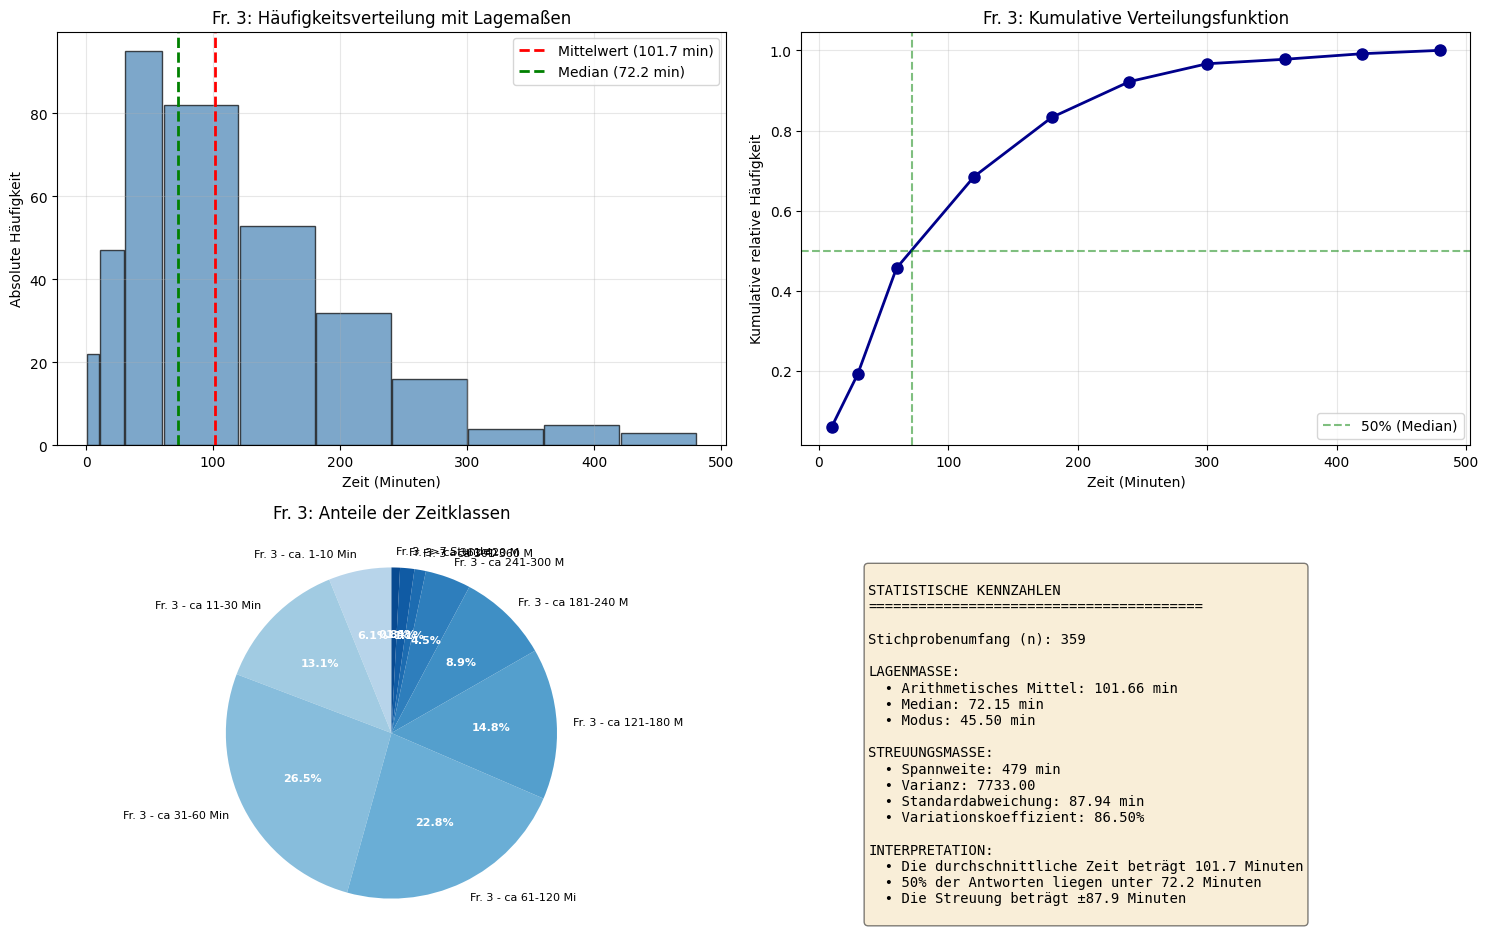


Visualisierung erstellt!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogramm (Häufigkeitsverteilung)
ax1 = axes[0, 0]
ax1.bar(fr3_data_sorted['Klassenmitte'], fr3_data_sorted['Value'], 
        width=fr3_data_sorted['Obere_Grenze'] - fr3_data_sorted['Untere_Grenze'],
        edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(mean_grouped, color='red', linestyle='--', linewidth=2, label=f'Mittelwert ({mean_grouped:.1f} min)')
ax1.axvline(median_grouped, color='green', linestyle='--', linewidth=2, label=f'Median ({median_grouped:.1f} min)')
ax1.set_xlabel('Zeit (Minuten)')
ax1.set_ylabel('Absolute Häufigkeit')
ax1.set_title('Fr. 3: Häufigkeitsverteilung mit Lagemaßen')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Kumulative Verteilung
ax2 = axes[0, 1]
ax2.plot(fr3_data_sorted['Obere_Grenze'], fr3_data_sorted['Kum_Rel_Haeufigkeit'], 
         marker='o', linewidth=2, markersize=8, color='darkblue')
ax2.axhline(0.5, color='green', linestyle='--', alpha=0.5, label='50% (Median)')
ax2.axvline(median_grouped, color='green', linestyle='--', alpha=0.5)
ax2.set_xlabel('Zeit (Minuten)')
ax2.set_ylabel('Kumulative relative Häufigkeit')
ax2.set_title('Fr. 3: Kumulative Verteilungsfunktion')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Relative Häufigkeiten (Kreisdiagramm)
ax3 = axes[1, 0]
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(fr3_data_sorted)))
wedges, texts, autotexts = ax3.pie(fr3_data_sorted['Value'], 
                                     labels=fr3_data_sorted['Question'].str[:20],
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90)
ax3.set_title('Fr. 3: Anteile der Zeitklassen')
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_weight('bold')

# 4. Box-Plot approximation und Kennzahlen
ax4 = axes[1, 1]
ax4.axis('off')

# Erstelle Textbox mit Kennzahlen
kennzahlen_text = f"""
STATISTISCHE KENNZAHLEN
{'='*40}

Stichprobenumfang (n): {n:.0f}

LAGENMASSE:
  • Arithmetisches Mittel: {mean_grouped:.2f} min
  • Median: {median_grouped:.2f} min
  • Modus: {mode_grouped:.2f} min

STREUUNGSMASSE:
  • Spannweite: {fr3_data_sorted['Obere_Grenze'].max() - fr3_data_sorted['Untere_Grenze'].min():.0f} min
  • Varianz: {variance_grouped:.2f}
  • Standardabweichung: {std_grouped:.2f} min
  • Variationskoeffizient: {(std_grouped/mean_grouped)*100:.2f}%

INTERPRETATION:
  • Die durchschnittliche Zeit beträgt {mean_grouped:.1f} Minuten
  • 50% der Antworten liegen unter {median_grouped:.1f} Minuten
  • Die Streuung beträgt ±{std_grouped:.1f} Minuten
"""

ax4.text(0.1, 0.9, kennzahlen_text, transform=ax4.transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nVisualisierung erstellt!")

In [ ]:
# Speichere die berechneten Werte für weitere Verwendung
fr3_stats = {
    'n': n,
    'mean': mean_grouped,
    'median': median_grouped,
    'mode': mode_grouped,
    'std': std_grouped,
    'variance': variance_grouped,
    'cv': (std_grouped/mean_grouped)*100
}

print("Frage 3 Statistiken gespeichert in 'fr3_stats' Dictionary")
print(fr3_stats)

Frage 3 Statistiken gespeichert in 'fr3_stats' Dictionary
{'n': np.float64(359.0), 'mean': np.float64(101.65598885793872), 'median': np.float64(72.15243902439025), 'mode': np.float64(45.5), 'std': np.float64(87.93745030465372), 'variance': np.float64(7732.995166083442), 'cv': np.float64(86.50493816704075)}


### Spezialanalyse: Frage 5 - Klassierte Daten
Berechnung von Mittelwert, Median und Standardabweichung für klassierte Daten

In [ ]:
# Extrahiere Frage 5 Daten
fr5_data = table_0_transposed[table_0_transposed['Question_Number'] == 'Fr. 5'].copy()

print("Frage 5 - Rohdaten:")
print(fr5_data[['Question', 'Value', 'Relative_Value']])

Frage 5 - Rohdaten:
                                 Question  Value  Relative_Value
91                      Fr. 5 - 0 Minuten   11.0        0.030641
92                   Fr. 5 - 1-10 Minuten   17.0        0.047354
93                  Fr. 5 - 11-30 Minuten   40.0        0.111421
94                  Fr. 5 - 31-60 Minuten   67.0        0.186630
95   Fr. 5 - 61-120 Minuten (1-2 Stunden)   90.0        0.250696
96  Fr. 5 - 121-180 Minuten (2-3 Stunden)   66.0        0.183844
97  Fr. 5 - 181-240 Minuten (3-4 Stunden)   34.0        0.094708
98  Fr. 5 - 241-300 Minuten (4-5 Stunden)   15.0        0.041783
99                     Fr. 5 - >5 Stunden   19.0        0.052925


In [ ]:
# Extrahiere Klassengrenzen für Frage 5 mit verbesserter Logik
import re

fr5_data['Untere_Grenze'] = 0
fr5_data['Obere_Grenze'] = 0

print("Verarbeite Frage 5 - Klassenbildung:")
print("="*80)

for idx, row in fr5_data.iterrows():
    question = row['Question']
    
    # Debug: Zeige die Frage
    print(f"Verarbeite: {question}")
    
    # Extrahiere nur den Teil nach "Fr. 5 - "
    # Dies entfernt die Fragen-Nummer aus der Analyse
    question_content = question.split(' - ', 1)[1] if ' - ' in question else question
    
    # Spezialfälle zuerst prüfen
    # ">5 Stunden" oder ähnlich
    if '>5' in question_content and ('stunden' in question_content.lower() or 'std' in question_content.lower()):
        fr5_data.at[idx, 'Untere_Grenze'] = 301
        fr5_data.at[idx, 'Obere_Grenze'] = 360
        print(f"  -> Spezialfall >5 Std: 301-360")
    
    # "0 Minuten" (Sonderfall)
    elif re.match(r'^\s*0\s+minuten', question_content, re.IGNORECASE):
        fr5_data.at[idx, 'Untere_Grenze'] = 0
        fr5_data.at[idx, 'Obere_Grenze'] = 0
        print(f"  -> 0 Minuten: 0-0")
    
    # "X-Y Minuten" Format (z.B. "1-10 Minuten", "61-120 Minuten")
    elif re.search(r'(\d+)\s*-\s*(\d+)\s+minuten', question_content, re.IGNORECASE):
        match = re.search(r'(\d+)\s*-\s*(\d+)\s+minuten', question_content, re.IGNORECASE)
        lower = int(match.group(1))
        upper = int(match.group(2))
        fr5_data.at[idx, 'Untere_Grenze'] = lower
        fr5_data.at[idx, 'Obere_Grenze'] = upper
        print(f"  -> {lower}-{upper}")
    
    # "bis X Minuten" oder "unter X Minuten"
    elif 'bis' in question_content.lower() or 'unter' in question_content.lower():
        match = re.search(r'(\d+)', question_content)
        if match:
            upper = int(match.group(1))
            fr5_data.at[idx, 'Untere_Grenze'] = 0
            fr5_data.at[idx, 'Obere_Grenze'] = upper
            print(f"  -> bis {upper}: 0-{upper}")
    
    # "über X Minuten" oder "mehr als X Minuten"
    elif 'über' in question_content.lower() or 'mehr als' in question_content.lower():
        match = re.search(r'(\d+)', question_content)
        if match:
            lower = int(match.group(1))
            # Annahme: offenes Intervall, +60 für Schätzung
            fr5_data.at[idx, 'Untere_Grenze'] = lower
            fr5_data.at[idx, 'Obere_Grenze'] = lower + 60
            print(f"  -> über {lower}: {lower}-{lower+60}")
    
    else:
        print(f"  -> WARNUNG: Keine Regel passt!")

# Berechne Klassenmittelwert
fr5_data['Klassenmitte'] = (fr5_data['Untere_Grenze'] + fr5_data['Obere_Grenze']) / 2

print("\n" + "="*80)
print("Frage 5 - Mit Klassengrenzen (korrigiert):")
print("="*80)
fr5_data[['Question', 'Value', 'Untere_Grenze', 'Obere_Grenze', 'Klassenmitte']]

Verarbeite Frage 5 - Klassenbildung:
Verarbeite: Fr. 5 - 0 Minuten
  -> 0 Minuten: 0-0
Verarbeite: Fr. 5 - 1-10 Minuten
  -> 1-10
Verarbeite: Fr. 5 - 11-30 Minuten
  -> 11-30
Verarbeite: Fr. 5 - 31-60 Minuten
  -> 31-60
Verarbeite: Fr. 5 - 61-120 Minuten (1-2 Stunden)
  -> 61-120
Verarbeite: Fr. 5 - 121-180 Minuten (2-3 Stunden)
  -> 121-180
Verarbeite: Fr. 5 - 181-240 Minuten (3-4 Stunden)
  -> 181-240
Verarbeite: Fr. 5 - 241-300 Minuten (4-5 Stunden)
  -> 241-300
Verarbeite: Fr. 5 - >5 Stunden
  -> Spezialfall >5 Std: 301-360

Frage 5 - Mit Klassengrenzen (korrigiert):


,Question,Value,Untere_Grenze,Obere_Grenze,Klassenmitte
91,Fr. 5 - 0 Minuten,11.0,0,0,0.0
92,Fr. 5 - 1-10 Minuten,17.0,1,10,5.5
93,Fr. 5 - 11-30 Minuten,40.0,11,30,20.5
94,Fr. 5 - 31-60 Minuten,67.0,31,60,45.5
95,Fr. 5 - 61-120 Minuten (1-2 Stunden),90.0,61,120,90.5
96,Fr. 5 - 121-180 Minuten (2-3 Stunden),66.0,121,180,150.5
97,Fr. 5 - 181-240 Minuten (3-4 Stunden),34.0,181,240,210.5
98,Fr. 5 - 241-300 Minuten (4-5 Stunden),15.0,241,300,270.5
99,Fr. 5 - >5 Stunden,19.0,301,360,330.5


In [ ]:
print(fr5_data['Value'].sum())

359.0


In [ ]:
# Berechnung statistischer Kennzahlen für Frage 5 (klassierte Daten)

# Gesamtanzahl der Beobachtungen
n_fr5 = fr5_data['Value'].sum()

# 1. ARITHMETISCHES MITTEL (gewichteter Mittelwert)
mean_grouped_fr5 = (fr5_data['Klassenmitte'] * fr5_data['Value']).sum() / n_fr5

# 2. MEDIAN (Median-Klasse bestimmen)
# Kumulative Häufigkeiten
fr5_data_sorted = fr5_data.sort_values('Klassenmitte').reset_index(drop=True)
fr5_data_sorted['Kum_Haeufigkeit'] = fr5_data_sorted['Value'].cumsum()
fr5_data_sorted['Kum_Rel_Haeufigkeit'] = fr5_data_sorted['Kum_Haeufigkeit'] / n_fr5

# Finde Median-Klasse (erste Klasse mit kumulativer Häufigkeit >= 50%)
median_class_idx_fr5 = fr5_data_sorted[fr5_data_sorted['Kum_Rel_Haeufigkeit'] >= 0.5].index[0]
median_class_fr5 = fr5_data_sorted.iloc[median_class_idx_fr5]

# Lineare Interpolation für Median
if median_class_idx_fr5 == 0:
    h_prev_fr5 = 0
else:
    h_prev_fr5 = fr5_data_sorted.iloc[median_class_idx_fr5 - 1]['Kum_Haeufigkeit']

L_fr5 = median_class_fr5['Untere_Grenze']  # Untere Grenze der Median-Klasse
h_fr5 = median_class_fr5['Value']  # Häufigkeit der Median-Klasse
b_fr5 = median_class_fr5['Obere_Grenze'] - median_class_fr5['Untere_Grenze']  # Klassenbreite

median_grouped_fr5 = L_fr5 + ((n_fr5/2 - h_prev_fr5) / h_fr5) * b_fr5

# 3. STANDARDABWEICHUNG
variance_grouped_fr5 = ((fr5_data['Klassenmitte'] - mean_grouped_fr5)**2 * fr5_data['Value']).sum() / n_fr5
std_grouped_fr5 = np.sqrt(variance_grouped_fr5)

# 4. MODUS (Klasse mit höchster Häufigkeit)
mode_class_fr5 = fr5_data.loc[fr5_data['Value'].idxmax()]
mode_grouped_fr5 = mode_class_fr5['Klassenmitte']

print("="*80)
print("STATISTISCHE KENNZAHLEN FÜR FRAGE 5 (KLASSIERTE DATEN)")
print("="*80)
print(f"\nGesamtanzahl Antworten: {n_fr5:.0f}")
print(f"\n--- Lagemaße ---")
print(f"Arithmetisches Mittel: {mean_grouped_fr5:.2f} Einheiten")
print(f"Median (interpoliert): {median_grouped_fr5:.2f} Einheiten")
print(f"Modus (Klassenmitte): {mode_grouped_fr5:.2f} Einheiten ({mode_class_fr5['Question']})")
print(f"\n--- Streuungsmaße ---")
print(f"Varianz: {variance_grouped_fr5:.2f}")
print(f"Standardabweichung: {std_grouped_fr5:.2f} Einheiten")
print(f"Variationskoeffizient: {(std_grouped_fr5/mean_grouped_fr5)*100:.2f}%")

print("\n--- Detaillierte Klassenverteilung ---")
display_df_fr5 = fr5_data_sorted[['Question', 'Untere_Grenze', 'Obere_Grenze', 
                                   'Klassenmitte', 'Value', 'Relative_Value']].copy()
display_df_fr5['Kum_Rel_Haeufigkeit'] = fr5_data_sorted['Kum_Rel_Haeufigkeit']
display_df_fr5

STATISTISCHE KENNZAHLEN FÜR FRAGE 5 (KLASSIERTE DATEN)

Gesamtanzahl Antworten: 359

--- Lagemaße ---
Arithmetisches Mittel: 110.12 Einheiten
Median (interpoliert): 90.17 Einheiten
Modus (Klassenmitte): 90.50 Einheiten (Fr. 5 - 61-120 Minuten (1-2 Stunden))

--- Streuungsmaße ---
Varianz: 7559.78
Standardabweichung: 86.95 Einheiten
Variationskoeffizient: 78.95%

--- Detaillierte Klassenverteilung ---


,Question,Untere_Grenze,Obere_Grenze,Klassenmitte,Value,Relative_Value,Kum_Rel_Haeufigkeit
0,Fr. 5 - 0 Minuten,0,0,0.0,11.0,0.030641,0.030641
1,Fr. 5 - 1-10 Minuten,1,10,5.5,17.0,0.047354,0.077994
2,Fr. 5 - 11-30 Minuten,11,30,20.5,40.0,0.111421,0.189415
3,Fr. 5 - 31-60 Minuten,31,60,45.5,67.0,0.186630,0.376045
4,Fr. 5 - 61-120 Minuten (1-2 Stunden),61,120,90.5,90.0,0.250696,0.626741
5,Fr. 5 - 121-180 Minuten (2-3 Stunden),121,180,150.5,66.0,0.183844,0.810585
6,Fr. 5 - 181-240 Minuten (3-4 Stunden),181,240,210.5,34.0,0.094708,0.905292
7,Fr. 5 - 241-300 Minuten (4-5 Stunden),241,300,270.5,15.0,0.041783,0.947075
8,Fr. 5 - >5 Stunden,301,360,330.5,19.0,0.052925,1.000000


### Visualisierung: Frage 5 - Klassierte Daten

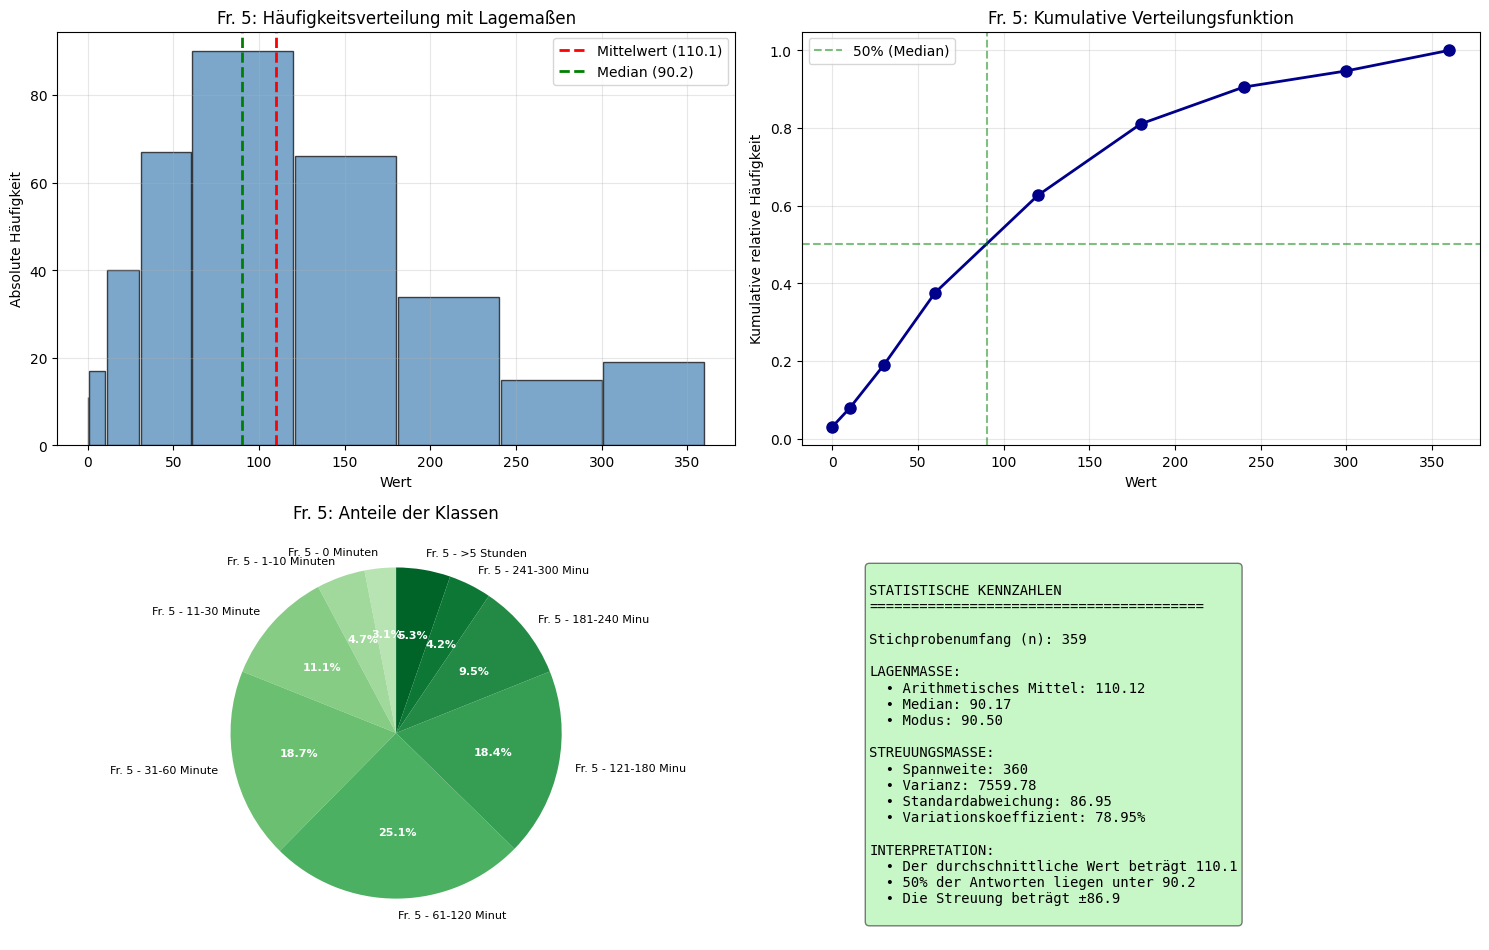


Visualisierung erstellt!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogramm (Häufigkeitsverteilung)
ax1 = axes[0, 0]
ax1.bar(fr5_data_sorted['Klassenmitte'], fr5_data_sorted['Value'], 
        width=fr5_data_sorted['Obere_Grenze'] - fr5_data_sorted['Untere_Grenze'],
        edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(mean_grouped_fr5, color='red', linestyle='--', linewidth=2, 
            label=f'Mittelwert ({mean_grouped_fr5:.1f})')
ax1.axvline(median_grouped_fr5, color='green', linestyle='--', linewidth=2, 
            label=f'Median ({median_grouped_fr5:.1f})')
ax1.set_xlabel('Wert')
ax1.set_ylabel('Absolute Häufigkeit')
ax1.set_title('Fr. 5: Häufigkeitsverteilung mit Lagemaßen')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Kumulative Verteilung
ax2 = axes[0, 1]
ax2.plot(fr5_data_sorted['Obere_Grenze'], fr5_data_sorted['Kum_Rel_Haeufigkeit'], 
         marker='o', linewidth=2, markersize=8, color='darkblue')
ax2.axhline(0.5, color='green', linestyle='--', alpha=0.5, label='50% (Median)')
ax2.axvline(median_grouped_fr5, color='green', linestyle='--', alpha=0.5)
ax2.set_xlabel('Wert')
ax2.set_ylabel('Kumulative relative Häufigkeit')
ax2.set_title('Fr. 5: Kumulative Verteilungsfunktion')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Relative Häufigkeiten (Kreisdiagramm)
ax3 = axes[1, 0]
colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(fr5_data_sorted)))
wedges, texts, autotexts = ax3.pie(fr5_data_sorted['Value'], 
                                     labels=fr5_data_sorted['Question'].str[:20],
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90)
ax3.set_title('Fr. 5: Anteile der Klassen')
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_weight('bold')

# 4. Kennzahlen
ax4 = axes[1, 1]
ax4.axis('off')

# Erstelle Textbox mit Kennzahlen
kennzahlen_text_fr5 = f"""
STATISTISCHE KENNZAHLEN
{'='*40}

Stichprobenumfang (n): {n_fr5:.0f}

LAGENMASSE:
  • Arithmetisches Mittel: {mean_grouped_fr5:.2f}
  • Median: {median_grouped_fr5:.2f}
  • Modus: {mode_grouped_fr5:.2f}

STREUUNGSMASSE:
  • Spannweite: {fr5_data_sorted['Obere_Grenze'].max() - fr5_data_sorted['Untere_Grenze'].min():.0f}
  • Varianz: {variance_grouped_fr5:.2f}
  • Standardabweichung: {std_grouped_fr5:.2f}
  • Variationskoeffizient: {(std_grouped_fr5/mean_grouped_fr5)*100:.2f}%

INTERPRETATION:
  • Der durchschnittliche Wert beträgt {mean_grouped_fr5:.1f}
  • 50% der Antworten liegen unter {median_grouped_fr5:.1f}
  • Die Streuung beträgt ±{std_grouped_fr5:.1f}
"""

ax4.text(0.1, 0.9, kennzahlen_text_fr5, transform=ax4.transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nVisualisierung erstellt!")

In [ ]:
# Speichere die berechneten Werte für Frage 5
fr5_stats = {
    'n': n_fr5,
    'mean': mean_grouped_fr5,
    'median': median_grouped_fr5,
    'mode': mode_grouped_fr5,
    'std': std_grouped_fr5,
    'variance': variance_grouped_fr5,
    'cv': (std_grouped_fr5/mean_grouped_fr5)*100
}

print("Frage 5 Statistiken gespeichert in 'fr5_stats' Dictionary")
print(fr5_stats)

Frage 5 Statistiken gespeichert in 'fr5_stats' Dictionary
{'n': np.float64(359.0), 'mean': np.float64(110.12256267409471), 'median': np.float64(90.17222222222222), 'mode': np.float64(90.5), 'std': np.float64(86.94700475446255), 'variance': np.float64(7559.781635772535), 'cv': np.float64(78.95475971784302)}


### Vergleich: Frage 3 vs. Frage 5

In [ ]:
# Vergleichstabelle erstellen
comparison_df = pd.DataFrame({
    'Kennzahl': ['Stichprobenumfang (n)', 'Mittelwert', 'Median', 'Modus', 
                 'Standardabweichung', 'Varianz', 'Variationskoeffizient (%)'],
    'Frage 3': [fr3_stats['n'], fr3_stats['mean'], fr3_stats['median'], 
                fr3_stats['mode'], fr3_stats['std'], fr3_stats['variance'], 
                fr3_stats['cv']],
    'Frage 5': [fr5_stats['n'], fr5_stats['mean'], fr5_stats['median'], 
                fr5_stats['mode'], fr5_stats['std'], fr5_stats['variance'], 
                fr5_stats['cv']]
})

print("="*80)
print("VERGLEICH: FRAGE 3 vs. FRAGE 5")
print("="*80)
comparison_df.round(2)

VERGLEICH: FRAGE 3 vs. FRAGE 5


,Kennzahl,Frage 3,Frage 5
0,Stichprobenumfang (n),359.00,359.00
1,Mittelwert,101.66,110.12
2,Median,72.15,90.17
3,Modus,45.50,90.50
4,Standardabweichung,87.94,86.95
5,Varianz,7733.00,7559.78
6,Variationskoeffizient (%),86.50,78.95


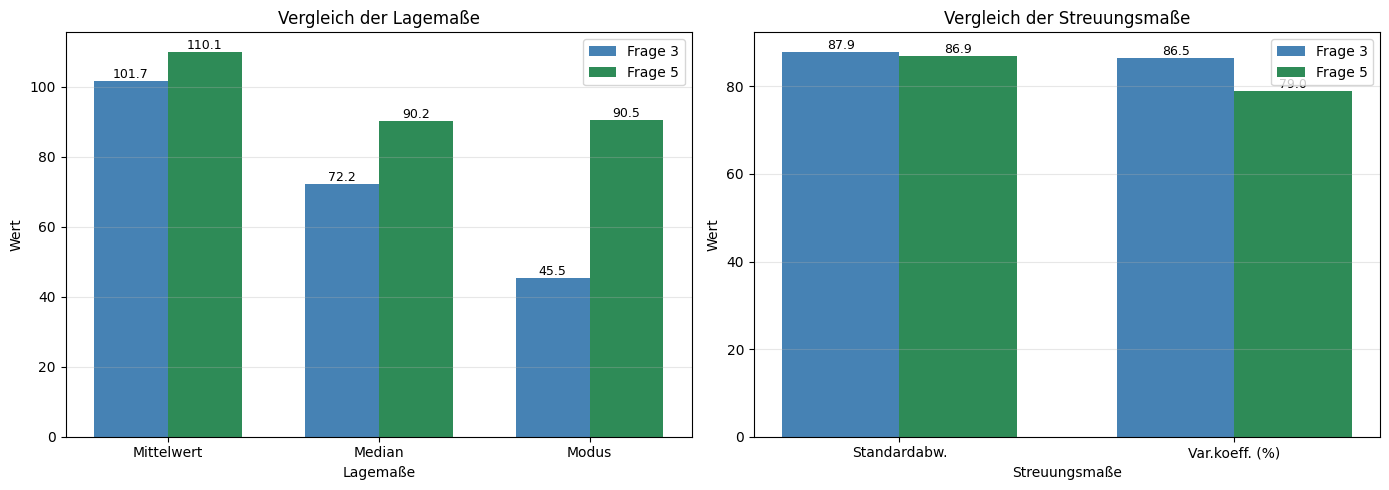


Vergleichsvisualisierung erstellt!


In [ ]:
# Vergleichsvisualisierung
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Vergleich der Lagemaße
ax1 = axes[0]
x = np.arange(3)
width = 0.35
measures = ['Mittelwert', 'Median', 'Modus']
fr3_values = [fr3_stats['mean'], fr3_stats['median'], fr3_stats['mode']]
fr5_values = [fr5_stats['mean'], fr5_stats['median'], fr5_stats['mode']]

bars1 = ax1.bar(x - width/2, fr3_values, width, label='Frage 3', color='steelblue')
bars2 = ax1.bar(x + width/2, fr5_values, width, label='Frage 5', color='seagreen')

ax1.set_xlabel('Lagemaße')
ax1.set_ylabel('Wert')
ax1.set_title('Vergleich der Lagemaße')
ax1.set_xticks(x)
ax1.set_xticklabels(measures)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Füge Werte auf den Balken hinzu
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9)

# Vergleich der Streuungsmaße
ax2 = axes[1]
x2 = np.arange(2)
measures2 = ['Standardabw.', 'Var.koeff. (%)']
fr3_values2 = [fr3_stats['std'], fr3_stats['cv']]
fr5_values2 = [fr5_stats['std'], fr5_stats['cv']]

bars3 = ax2.bar(x2 - width/2, fr3_values2, width, label='Frage 3', color='steelblue')
bars4 = ax2.bar(x2 + width/2, fr5_values2, width, label='Frage 5', color='seagreen')

ax2.set_xlabel('Streuungsmaße')
ax2.set_ylabel('Wert')
ax2.set_title('Vergleich der Streuungsmaße')
ax2.set_xticks(x2)
ax2.set_xticklabels(measures2)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Füge Werte auf den Balken hinzu
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nVergleichsvisualisierung erstellt!")

In [ ]:
from scipy import stats
import numpy as np

# SIGNIFIKANZTEST: VERGLEICH FRAGE 3 vs. FRAGE 5

print("="*80)
print("SIGNIFIKANZTEST: VERGLEICH FRAGE 3 vs. FRAGE 5")
print("="*80)

# Zusammenfassung der Kennzahlen
print("\nDATENÜBERSICHT:")
print("-" * 80)
print(f"{'Kennzahl':<25s} {'Frage 3':<15s} {'Frage 5':<15s} {'Differenz':<15s}")
print("-" * 80)
print(f"{'Mittelwert':<25s} {fr3_stats['mean']:<15.2f} {fr5_stats['mean']:<15.2f} {fr5_stats['mean'] - fr3_stats['mean']:<15.2f}")
print(f"{'Median':<25s} {fr3_stats['median']:<15.2f} {fr5_stats['median']:<15.2f} {fr5_stats['median'] - fr3_stats['median']:<15.2f}")
print(f"{'Standardabweichung':<25s} {fr3_stats['std']:<15.2f} {fr5_stats['std']:<15.2f} {fr5_stats['std'] - fr3_stats['std']:<15.2f}")
print(f"{'Varianz':<25s} {fr3_stats['variance']:<15.2f} {fr5_stats['variance']:<15.2f} {fr5_stats['variance'] - fr3_stats['variance']:<15.2f}")
print(f"{'Stichprobengröße':<25s} {fr3_stats['n']:<15.0f} {fr5_stats['n']:<15.0f} {fr5_stats['n'] - fr3_stats['n']:<15.0f}")

# 1. MITTELWERTVERGLEICH
print("\n" + "="*80)
print("1. MITTELWERTVERGLEICH (Zweistichproben-t-Test)")
print("="*80)

# Berechne gepoolte Varianz und Standardfehler für unabhängige Stichproben
n1, n2 = fr3_stats['n'], fr5_stats['n']
s1_sq, s2_sq = fr3_stats['variance'], fr5_stats['variance']
mean1, mean2 = fr3_stats['mean'], fr5_stats['mean']

# Gepoolte Varianz (unter Annahme gleicher Varianzen)
pooled_variance = ((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / (n1 + n2 - 2)
pooled_std = np.sqrt(pooled_variance)

# Standardfehler der Mittelwertdifferenz
se_diff = pooled_std * np.sqrt(1/n1 + 1/n2)

# t-Statistik
t_stat = (mean2 - mean1) / se_diff
df = n1 + n2 - 2

# p-Wert (einseitiger Test: H1: μ5 > μ3)
p_value_one = 1 - stats.t.cdf(t_stat, df)
# p-Wert (zweiseitiger Test)
p_value_two = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"\nH0: μ5 = μ3  vs.  H1: μ5 > μ3 (einseitiger Test)")
print(f"t-Statistik: {t_stat:.4f}")
print(f"Freiheitsgrade: {df:.0f}")
print(f"p-Wert (einseitig): {p_value_one:.6f}")
print(f"p-Wert (zweiseitig): {p_value_two:.6f}")

if p_value_one < 0.05:
    print(f"✓ SIGNIFIKANT: Der Mittelwert von Frage 5 ist signifikant höher als der von Frage 3 (α = 0.05)")
else:
    print(f"✗ NICHT SIGNIFIKANT: Kein signifikanter Unterschied zwischen den Mittelwerten (α = 0.05)")

# Effektgröße (Cohen's d)
cohens_d = (mean2 - mean1) / pooled_std
print(f"Effektgröße (Cohen's d): {cohens_d:.4f}")

if abs(cohens_d) < 0.2:
    effect_interpretation = "kleiner Effekt"
elif abs(cohens_d) < 0.5:
    effect_interpretation = "mittlerer Effekt"
elif abs(cohens_d) < 0.8:
    effect_interpretation = "großer Effekt"
else:
    effect_interpretation = "sehr großer Effekt"

print(f"Interpretation: {effect_interpretation}")

# 2. MEDIANVERGLEICH (Mann-Whitney U-Test)
print("\n" + "="*80)
print("2. MEDIANVERGLEICH (Mann-Whitney U-Test)")
print("="*80)

# Da wir nur aggregierte Daten haben, können wir den U-Test nicht direkt durchführen
# Stattdessen vergleichen wir die Mediane deskriptiv
median_diff = fr5_stats['median'] - fr3_stats['median']
print(f"Median Frage 3: {fr3_stats['median']:.2f}")
print(f"Median Frage 5: {fr5_stats['median']:.2f}")
print(f"Differenz: {median_diff:.2f}")

# Relative Veränderung
median_change_pct = (median_diff / fr3_stats['median']) * 100
print(f"Relative Veränderung: {median_change_pct:.1f}%")

# 3. VARIANZVERGLEICH (F-Test)
print("\n" + "="*80)
print("3. VARIANZVERGLEICH (F-Test)")
print("="*80)

# F-Statistik
f_stat = fr3_stats['variance'] / fr5_stats['variance']  # Größere Varianz im Zähler
df1 = n1 - 1
df2 = n2 - 1

# p-Wert (zweiseitiger Test)
p_value_f = 2 * min(stats.f.cdf(f_stat, df1, df2), 1 - stats.f.cdf(f_stat, df1, df2))

print(f"H0: σ²3 = σ²5  vs.  H1: σ²3 ≠ σ²5")
print(f"F-Statistik: {f_stat:.4f}")
print(f"Freiheitsgrade: df1 = {df1:.0f}, df2 = {df2:.0f}")
print(f"p-Wert: {p_value_f:.6f}")

if p_value_f < 0.05:
    print(f"✓ SIGNIFIKANT: Die Varianzen unterscheiden sich signifikant (α = 0.05)")
else:
    print(f"✗ NICHT SIGNIFIKANT: Kein signifikanter Unterschied zwischen den Varianzen (α = 0.05)")

# Varianzreduktion berechnen
variance_change = fr5_stats['variance'] - fr3_stats['variance']
variance_change_pct = (variance_change / fr3_stats['variance']) * 100

print(f"\nVarianz Frage 3: {fr3_stats['variance']:.2f}")
print(f"Varianz Frage 5: {fr5_stats['variance']:.2f}")
print(f"Absolute Änderung: {variance_change:.2f}")
print(f"Relative Änderung: {variance_change_pct:.1f}%")

if variance_change < 0:
    print(f"→ Varianzreduktion um {abs(variance_change_pct):.1f}%")
else:
    print(f"→ Varianzerhöhung um {variance_change_pct:.1f}%")

# 4. ZUSAMMENFASSUNG
print("\n" + "="*80)
print("4. ZUSAMMENFASSUNG DER TESTERGEBNISSE")
print("="*80)

print(f"\n📊 MITTELWERTVERGLEICH:")
print(f"   • Differenz: {mean2 - mean1:.2f} Einheiten")
print(f"   • Relative Änderung: {((mean2 - mean1) / mean1) * 100:.1f}%")
print(f"   • Signifikanz: {'JA' if p_value_one < 0.05 else 'NEIN'} (p = {p_value_one:.4f})")
print(f"   • Effektgröße: {effect_interpretation} (d = {cohens_d:.3f})")

print(f"\n📈 MEDIANVERGLEICH:")
print(f"   • Differenz: {median_diff:.2f} Einheiten")
print(f"   • Relative Änderung: {median_change_pct:.1f}%")

print(f"\n📉 VARIANZVERGLEICH:")
print(f"   • Varianzänderung: {variance_change_pct:.1f}%")
print(f"   • Signifikanz: {'JA' if p_value_f < 0.05 else 'NEIN'} (p = {p_value_f:.4f})")

print(f"\n🎯 GESAMTFAZIT:")
if p_value_one < 0.05:
    print("   ✓ Frage 5 zeigt signifikant höhere Werte als Frage 3")
    if variance_change_pct < 0:
        print("   ✓ Zusätzlich ist die Streuung reduziert → konsistentere Antworten")
    else:
        print("   ⚠ Aber die Streuung ist erhöht → weniger konsistente Antworten")
else:
    print("   ✗ Kein signifikanter Unterschied zwischen Frage 3 und 5 nachweisbar")

print("="*80)

SIGNIFIKANZTEST: VERGLEICH FRAGE 3 vs. FRAGE 5

DATENÜBERSICHT:
--------------------------------------------------------------------------------
Kennzahl                  Frage 3         Frage 5         Differenz      
--------------------------------------------------------------------------------
Mittelwert                101.66          110.12          8.47           
Median                    72.15           90.17           18.02          
Standardabweichung        87.94           86.95           -0.99          
Varianz                   7733.00         7559.78         -173.21        
Stichprobengröße          359             359             0              

1. MITTELWERTVERGLEICH (Zweistichproben-t-Test)

H0: μ5 = μ3  vs.  H1: μ5 > μ3 (einseitiger Test)
t-Statistik: 1.2972
Freiheitsgrade: 716
p-Wert (einseitig): 0.097488
p-Wert (zweiseitig): 0.194975
✗ NICHT SIGNIFIKANT: Kein signifikanter Unterschied zwischen den Mittelwerten (α = 0.05)
Effektgröße (Cohen's d): 0.0968
Interpretat

In [ ]:
from scipy import stats

# T-Test zur Messung der Signifikanz eines Mittelwerts
# (Einstichproben-t-Test gegen einen Vergleichswert)


# Definiere die Parameter
mittelwert = 17.9  # Stichproben-Mittelwert
standardabweichung = 30.8  # Stichproben-Standardabweichung
stichprobengroesse = 197  # Anzahl der Beobachtungen
vergleichswert = 0  # Hypothetischer Wert zum Vergleich (z.B. 60 Minuten)

# Berechne den Standardfehler
standardfehler = standardabweichung / np.sqrt(stichprobengroesse)

# Berechne die t-Statistik
t_statistik = (mittelwert - vergleichswert) / standardfehler

# Berechne die Freiheitsgrade
freiheitsgrade = stichprobengroesse - 1

# Berechne den p-Wert (zweiseitiger Test)
p_wert = 2 * (1 - stats.t.cdf(abs(t_statistik), freiheitsgrade))

# Ausgabe
print("="*80)
print("T-TEST: SIGNIFIKANZ DES MITTELWERTS")
print("="*80)
print(f"\nStichprobenparameter:")
print(f"  • Mittelwert: {mittelwert:.2f}")
print(f"  • Standardabweichung: {standardabweichung:.2f}")
print(f"  • Stichprobengröße: {stichprobengroesse:.0f}")
print(f"  • Vergleichswert (μ₀): {vergleichswert}")
print(f"\nTeststatistiken:")
print(f"  • Standardfehler: {standardfehler:.4f}")
print(f"  • t-Statistik: {t_statistik:.4f}")
print(f"  • Freiheitsgrade: {freiheitsgrade:.0f}")
print(f"  • p-Wert: {p_wert:.6f}")
print(f"\nInterpretation (α = 0.05):")
if p_wert < 0.05:
    print(f"  ✓ Der Mittelwert ({mittelwert:.2f}) unterscheidet sich SIGNIFIKANT vom Vergleichswert ({vergleichswert})")
else:
    print(f"  ✗ Der Mittelwert ({mittelwert:.2f}) unterscheidet sich NICHT SIGNIFIKANT vom Vergleichswert ({vergleichswert})")

T-TEST: SIGNIFIKANZ DES MITTELWERTS

Stichprobenparameter:
  • Mittelwert: 17.90
  • Standardabweichung: 30.80
  • Stichprobengröße: 197
  • Vergleichswert (μ₀): 0

Teststatistiken:
  • Standardfehler: 2.1944
  • t-Statistik: 8.1571
  • Freiheitsgrade: 196
  • p-Wert: 0.000000

Interpretation (α = 0.05):
  ✓ Der Mittelwert (17.90) unterscheidet sich SIGNIFIKANT vom Vergleichswert (0)


In [ ]:
# Extrahiere Frage 6 Daten
fr6_data = table_0_transposed[table_0_transposed['Question_Number'] == 'Fr. 6'].copy()

print("Frage 6 - Rohdaten:")
print(fr6_data[['Question', 'Value', 'Relative_Value']])

Frage 6 - Rohdaten:
                                              Question  Value  Relative_Value
100                   Fr. 6 - Copilot Chat - 0 Minuten   15.0        0.041783
101                Fr. 6 - Copilot Chat - 1-10 Minuten   51.0        0.142061
102               Fr. 6 - Copilot Chat - 11-30 Minuten   93.0        0.259053
103               Fr. 6 - Copilot Chat - 31-60 Minuten   88.0        0.245125
104              Fr. 6 - Copilot Chat - 61-120 Minuten   45.0        0.125348
105                  Fr. 6 - Copilot Chat - >2 Stunden   47.0        0.130919
106                           Fr. 6 - Word - 0 Minuten   39.0        0.108635
107                        Fr. 6 - Word - 1-10 Minuten   72.0        0.200557
108                       Fr. 6 - Word - 11-30 Minuten   62.0        0.172702
109                       Fr. 6 - Word - 31-60 Minuten   16.0        0.044568
110                      Fr. 6 - Word - 61-120 Minuten    2.0        0.005571
111                          Fr. 6 - Word - 

In [ ]:
# Extrahiere Klassengrenzen für Frage 6 mit verbesserter Logik
import re

# Kopiere die Daten, um mehrfache Kategorien zu unterstützen
fr6_data['Kategorie'] = ''
fr6_data['Untere_Grenze'] = 0
fr6_data['Obere_Grenze'] = 0

print("Verarbeite Frage 6 - Klassenbildung:")
print("="*80)

for idx, row in fr6_data.iterrows():
    question = row['Question']
    
    # Debug: Zeige die Frage
    print(f"Verarbeite: {question}")
    
    # Extrahiere Kategorie und Zeitangabe
    # Format: "Fr. 6 - [Kategorie] - [Zeitangabe]"
    parts = question.split(' - ')
    
    if len(parts) >= 3:
        # Extrahiere Kategorie (Teil zwischen "Fr. 6" und Zeitangabe)
        kategorie = parts[1].strip()
        fr6_data.at[idx, 'Kategorie'] = kategorie
        
        # Extrahiere Zeitangabe (letzter Teil)
        zeitangabe = parts[-1].strip()
        
        # Spezialfälle zuerst prüfen
        # ">2 Stunden" oder ähnlich
        if '>2' in zeitangabe and ('stunden' in zeitangabe.lower() or 'std' in zeitangabe.lower()):
            fr6_data.at[idx, 'Untere_Grenze'] = 121
            fr6_data.at[idx, 'Obere_Grenze'] = 180
            print(f"  -> {kategorie}: >2 Std = 121-180")
        
        # "0 Minuten" (Sonderfall)
        elif re.match(r'^\s*0\s+minuten', zeitangabe, re.IGNORECASE):
            fr6_data.at[idx, 'Untere_Grenze'] = 0
            fr6_data.at[idx, 'Obere_Grenze'] = 0
            print(f"  -> {kategorie}: 0 Minuten = 0-0")
        
        # "X-Y Minuten" Format (z.B. "1-10 Minuten", "61-120 Minuten")
        elif re.search(r'(\d+)\s*-\s*(\d+)\s+minuten', zeitangabe, re.IGNORECASE):
            match = re.search(r'(\d+)\s*-\s*(\d+)\s+minuten', zeitangabe, re.IGNORECASE)
            lower = int(match.group(1))
            upper = int(match.group(2))
            fr6_data.at[idx, 'Untere_Grenze'] = lower
            fr6_data.at[idx, 'Obere_Grenze'] = upper
            print(f"  -> {kategorie}: {lower}-{upper}")
        
        # "bis X Minuten" oder "unter X Minuten"
        elif 'bis' in zeitangabe.lower() or 'unter' in zeitangabe.lower():
            match = re.search(r'(\d+)', zeitangabe)
            if match:
                upper = int(match.group(1))
                fr6_data.at[idx, 'Untere_Grenze'] = 0
                fr6_data.at[idx, 'Obere_Grenze'] = upper
                print(f"  -> {kategorie}: bis {upper} = 0-{upper}")
        
        # "über X Minuten" oder "mehr als X Minuten"
        elif 'über' in zeitangabe.lower() or 'mehr als' in zeitangabe.lower():
            match = re.search(r'(\d+)', zeitangabe)
            if match:
                lower = int(match.group(1))
                # Annahme: offenes Intervall, +60 für Schätzung
                fr6_data.at[idx, 'Untere_Grenze'] = lower
                fr6_data.at[idx, 'Obere_Grenze'] = lower + 60
                print(f"  -> {kategorie}: über {lower} = {lower}-{lower+60}")
        
        else:
            print(f"  -> {kategorie}: WARNUNG - Keine Regel passt!")
    else:
        print(f"  -> FEHLER: Unerwartetes Format!")

# Berechne Klassenmittelwert
fr6_data['Klassenmitte'] = (fr6_data['Untere_Grenze'] + fr6_data['Obere_Grenze']) / 2

print("\n" + "="*80)
print("Frage 6 - Mit Klassengrenzen (korrigiert):")
print("="*80)
fr6_data[['Question', 'Kategorie', 'Value', 'Untere_Grenze', 'Obere_Grenze', 'Klassenmitte']].head(15)

Verarbeite Frage 6 - Klassenbildung:
Verarbeite: Fr. 6 - Copilot Chat - 0 Minuten
  -> Copilot Chat: 0 Minuten = 0-0
Verarbeite: Fr. 6 - Copilot Chat - 1-10 Minuten
  -> Copilot Chat: 1-10
Verarbeite: Fr. 6 - Copilot Chat - 11-30 Minuten
  -> Copilot Chat: 11-30
Verarbeite: Fr. 6 - Copilot Chat - 31-60 Minuten
  -> Copilot Chat: 31-60
Verarbeite: Fr. 6 - Copilot Chat - 61-120 Minuten
  -> Copilot Chat: 61-120
Verarbeite: Fr. 6 - Copilot Chat - >2 Stunden
  -> Copilot Chat: >2 Std = 121-180
Verarbeite: Fr. 6 - Word - 0 Minuten
  -> Word: 0 Minuten = 0-0
Verarbeite: Fr. 6 - Word - 1-10 Minuten
  -> Word: 1-10
Verarbeite: Fr. 6 - Word - 11-30 Minuten
  -> Word: 11-30
Verarbeite: Fr. 6 - Word - 31-60 Minuten
  -> Word: 31-60
Verarbeite: Fr. 6 - Word - 61-120 Minuten
  -> Word: 61-120
Verarbeite: Fr. 6 - Word - >2 Stunden
  -> Word: >2 Std = 121-180
Verarbeite: Fr. 6 - PowerPoint - 0 Minuten
  -> PowerPoint: 0 Minuten = 0-0
Verarbeite: Fr. 6 - PowerPoint - 1-10 Minuten
  -> PowerPoint: 1-10

,Question,Kategorie,Value,Untere_Grenze,Obere_Grenze,Klassenmitte
100,Fr. 6 - Copilot Chat - 0 Minuten,Copilot Chat,15.0,0,0,0.0
101,Fr. 6 - Copilot Chat - 1-10 Minuten,Copilot Chat,51.0,1,10,5.5
102,Fr. 6 - Copilot Chat - 11-30 Minuten,Copilot Chat,93.0,11,30,20.5
103,Fr. 6 - Copilot Chat - 31-60 Minuten,Copilot Chat,88.0,31,60,45.5
104,Fr. 6 - Copilot Chat - 61-120 Minuten,Copilot Chat,45.0,61,120,90.5
105,Fr. 6 - Copilot Chat - >2 Stunden,Copilot Chat,47.0,121,180,150.5
106,Fr. 6 - Word - 0 Minuten,Word,39.0,0,0,0.0
107,Fr. 6 - Word - 1-10 Minuten,Word,72.0,1,10,5.5
108,Fr. 6 - Word - 11-30 Minuten,Word,62.0,11,30,20.5
109,Fr. 6 - Word - 31-60 Minuten,Word,16.0,31,60,45.5


In [ ]:
# Berechnung statistischer Kennzahlen für Frage 6 (klassierte Daten)
# Da Frage 6 mehrere Kategorien hat, berechnen wir die Statistiken für jede Kategorie

fr6_stats_dict = {}

print("="*80)
print("STATISTISCHE KENNZAHLEN FÜR FRAGE 6 (KLASSIERTE DATEN)")
print("="*80)

# Iteriere über alle Kategorien
for kategorie in fr6_data['Kategorie'].unique():
    kategorie_data = fr6_data[fr6_data['Kategorie'] == kategorie].copy()
    
    # Gesamtanzahl der Beobachtungen für diese Kategorie
    n = kategorie_data['Value'].sum()
    
    # 1. ARITHMETISCHES MITTEL (gewichteter Mittelwert)
    mean_grouped = (kategorie_data['Klassenmitte'] * kategorie_data['Value']).sum() / n
    
    # 2. MEDIAN (Median-Klasse bestimmen)
    # Kumulative Häufigkeiten
    kategorie_data_sorted = kategorie_data.sort_values('Klassenmitte').reset_index(drop=True)
    kategorie_data_sorted['Kum_Haeufigkeit'] = kategorie_data_sorted['Value'].cumsum()
    kategorie_data_sorted['Kum_Rel_Haeufigkeit'] = kategorie_data_sorted['Kum_Haeufigkeit'] / n
    
    # Finde Median-Klasse (erste Klasse mit kumulativer Häufigkeit >= 50%)
    median_class_idx = kategorie_data_sorted[kategorie_data_sorted['Kum_Rel_Haeufigkeit'] >= 0.5].index[0]
    median_class = kategorie_data_sorted.iloc[median_class_idx]
    
    # Lineare Interpolation für Median
    if median_class_idx == 0:
        h_prev = 0
    else:
        h_prev = kategorie_data_sorted.iloc[median_class_idx - 1]['Kum_Haeufigkeit']
    
    L = median_class['Untere_Grenze']
    h = median_class['Value']
    b = median_class['Obere_Grenze'] - median_class['Untere_Grenze']
    
    if b > 0:
        median_grouped = L + ((n/2 - h_prev) / h) * b
    else:
        median_grouped = L
    
    # 3. STANDARDABWEICHUNG
    variance_grouped = ((kategorie_data['Klassenmitte'] - mean_grouped)**2 * kategorie_data['Value']).sum() / n
    std_grouped = np.sqrt(variance_grouped)
    
    # 4. MODUS (Klasse mit höchster Häufigkeit)
    mode_class = kategorie_data.loc[kategorie_data['Value'].idxmax()]
    mode_grouped = mode_class['Klassenmitte']
    
    # Speichere Statistiken
    fr6_stats_dict[kategorie] = {
        'n': n,
        'mean': mean_grouped,
        'median': median_grouped,
        'mode': mode_grouped,
        'std': std_grouped,
        'variance': variance_grouped,
        'cv': (std_grouped/mean_grouped)*100 if mean_grouped > 0 else 0
    }
    
    # Ausgabe
    print(f"\n{'─'*80}")
    print(f"KATEGORIE: {kategorie}")
    print(f"{'─'*80}")
    print(f"Gesamtanzahl Antworten: {n:.0f}")
    print(f"\n--- Lagemaße ---")
    print(f"Arithmetisches Mittel: {mean_grouped:.2f} Minuten")
    print(f"Median (interpoliert): {median_grouped:.2f} Minuten")
    print(f"Modus (Klassenmitte): {mode_grouped:.2f} Minuten")
    print(f"\n--- Streuungsmaße ---")
    print(f"Varianz: {variance_grouped:.2f}")
    print(f"Standardabweichung: {std_grouped:.2f} Minuten")
    print(f"Variationskoeffizient: {(std_grouped/mean_grouped)*100 if mean_grouped > 0 else 0:.2f}%")

print("\n" + "="*80)
print("Frage 6 Statistiken gespeichert in 'fr6_stats_dict' Dictionary")
print("="*80)

STATISTISCHE KENNZAHLEN FÜR FRAGE 6 (KLASSIERTE DATEN)

────────────────────────────────────────────────────────────────────────────────
KATEGORIE: Copilot Chat
────────────────────────────────────────────────────────────────────────────────
Gesamtanzahl Antworten: 339

--- Lagemaße ---
Arithmetisches Mittel: 51.14 Minuten
Median (interpoliert): 34.46 Minuten
Modus (Klassenmitte): 20.50 Minuten

--- Streuungsmaße ---
Varianz: 2269.29
Standardabweichung: 47.64 Minuten
Variationskoeffizient: 93.15%

────────────────────────────────────────────────────────────────────────────────
KATEGORIE: Word
────────────────────────────────────────────────────────────────────────────────
Gesamtanzahl Antworten: 192

--- Lagemaße ---
Arithmetisches Mittel: 14.20 Minuten
Median (interpoliert): 8.12 Minuten
Modus (Klassenmitte): 5.50 Minuten

--- Streuungsmaße ---
Varianz: 321.20
Standardabweichung: 17.92 Minuten
Variationskoeffizient: 126.21%

────────────────────────────────────────────────────────────

In [ ]:
# Erstelle Vergleichstabelle für alle Kategorien von Frage 6
fr6_comparison_df = pd.DataFrame(fr6_stats_dict).T

# Runde die Werte
fr6_comparison_df = fr6_comparison_df.round(2)

# Sortiere nach Mittelwert (absteigend)
fr6_comparison_df = fr6_comparison_df.sort_values('mean', ascending=False)

print("="*80)
print("VERGLEICH ALLER KATEGORIEN - FRAGE 6")
print("="*80)
print("\nSortiert nach durchschnittlicher Zeit (Mittelwert):")
fr6_comparison_df

VERGLEICH ALLER KATEGORIEN - FRAGE 6

Sortiert nach durchschnittlicher Zeit (Mittelwert):


,n,mean,median,mode,std,variance,cv
Copilot Chat,339.0,51.14,34.46,20.5,47.64,2269.29,93.15
Outlook,306.0,26.59,16.20,20.5,32.02,1025.39,120.41
"Teams, ohne Copilot Chat",316.0,22.94,9.20,5.5,32.74,1071.69,142.69
Excel,208.0,20.25,8.81,5.5,28.65,820.66,141.48
sonstige,196.0,17.92,6.23,0.0,30.81,949.36,171.96
PowerPoint,215.0,17.70,7.66,5.5,26.44,699.06,149.34
Word,192.0,14.20,8.12,5.5,17.92,321.20,126.21


### Visualisierung: Frage 6 - Kategorienvergleich

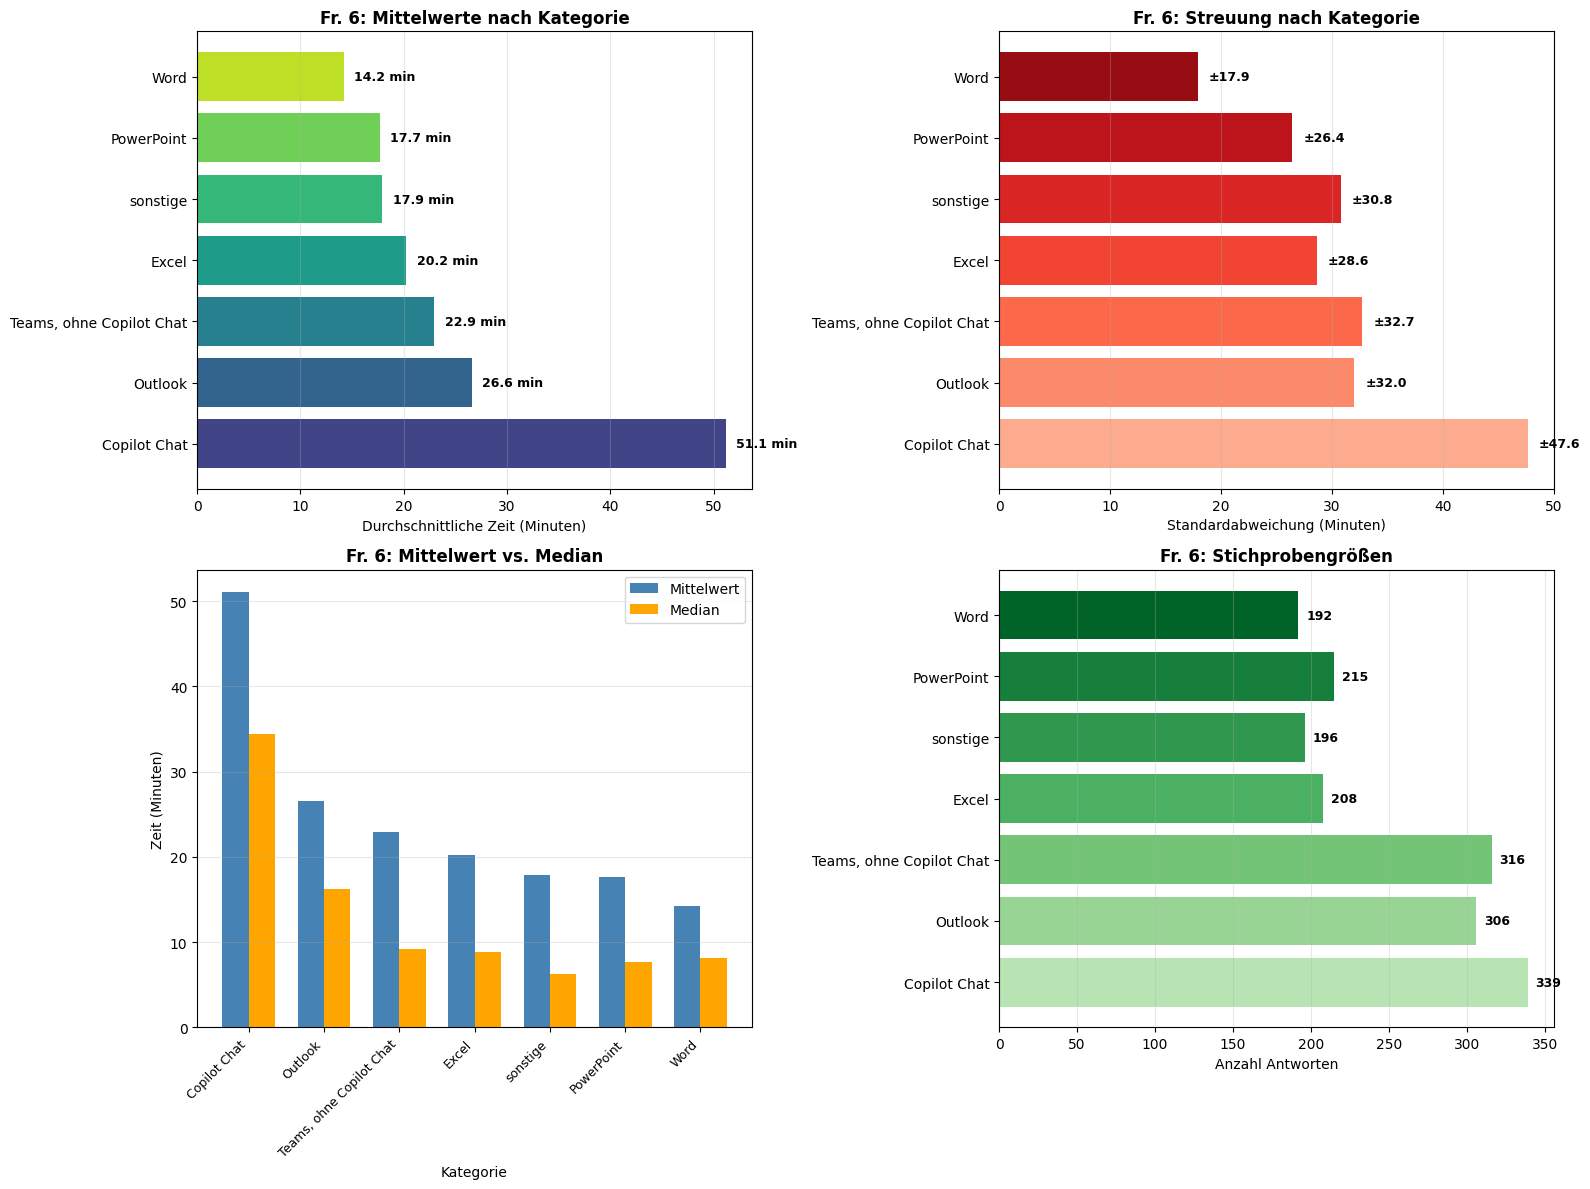


Visualisierung erstellt!


In [ ]:
# Visualisierung für Frage 6 - Vergleich aller Kategorien
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Vergleich der Mittelwerte
ax1 = axes[0, 0]
categories = fr6_comparison_df.index
means = fr6_comparison_df['mean']
colors_mean = plt.cm.viridis(np.linspace(0.2, 0.9, len(categories)))

bars1 = ax1.barh(categories, means, color=colors_mean)
ax1.set_xlabel('Durchschnittliche Zeit (Minuten)')
ax1.set_title('Fr. 6: Mittelwerte nach Kategorie', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')

# Füge Werte hinzu
for i, (bar, val) in enumerate(zip(bars1, means)):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2.,
            f'{val:.1f} min',
            ha='left', va='center', fontsize=9, fontweight='bold')

# 2. Vergleich der Streuung (Standardabweichung)
ax2 = axes[0, 1]
stds = fr6_comparison_df['std']
colors_std = plt.cm.Reds(np.linspace(0.3, 0.9, len(categories)))

bars2 = ax2.barh(categories, stds, color=colors_std)
ax2.set_xlabel('Standardabweichung (Minuten)')
ax2.set_title('Fr. 6: Streuung nach Kategorie', fontweight='bold', fontsize=12)
ax2.grid(True, alpha=0.3, axis='x')

# Füge Werte hinzu
for i, (bar, val) in enumerate(zip(bars2, stds)):
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2.,
            f'±{val:.1f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

# 3. Vergleich Mittelwert vs. Median
ax3 = axes[1, 0]
x = np.arange(len(categories))
width = 0.35

means_plot = fr6_comparison_df['mean']
medians = fr6_comparison_df['median']

bars3 = ax3.bar(x - width/2, means_plot, width, label='Mittelwert', color='steelblue')
bars4 = ax3.bar(x + width/2, medians, width, label='Median', color='orange')

ax3.set_xlabel('Kategorie')
ax3.set_ylabel('Zeit (Minuten)')
ax3.set_title('Fr. 6: Mittelwert vs. Median', fontweight='bold', fontsize=12)
ax3.set_xticks(x)
ax3.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Stichprobengrößen
ax4 = axes[1, 1]
sample_sizes = fr6_comparison_df['n']
colors_n = plt.cm.Greens(np.linspace(0.3, 0.9, len(categories)))

bars5 = ax4.barh(categories, sample_sizes, color=colors_n)
ax4.set_xlabel('Anzahl Antworten')
ax4.set_title('Fr. 6: Stichprobengrößen', fontweight='bold', fontsize=12)
ax4.grid(True, alpha=0.3, axis='x')

# Füge Werte hinzu
for i, (bar, val) in enumerate(zip(bars5, sample_sizes)):
    width = bar.get_width()
    ax4.text(width + 5, bar.get_y() + bar.get_height()/2.,
            f'{val:.0f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nVisualisierung erstellt!")

### Detaillierte Verteilung pro Kategorie

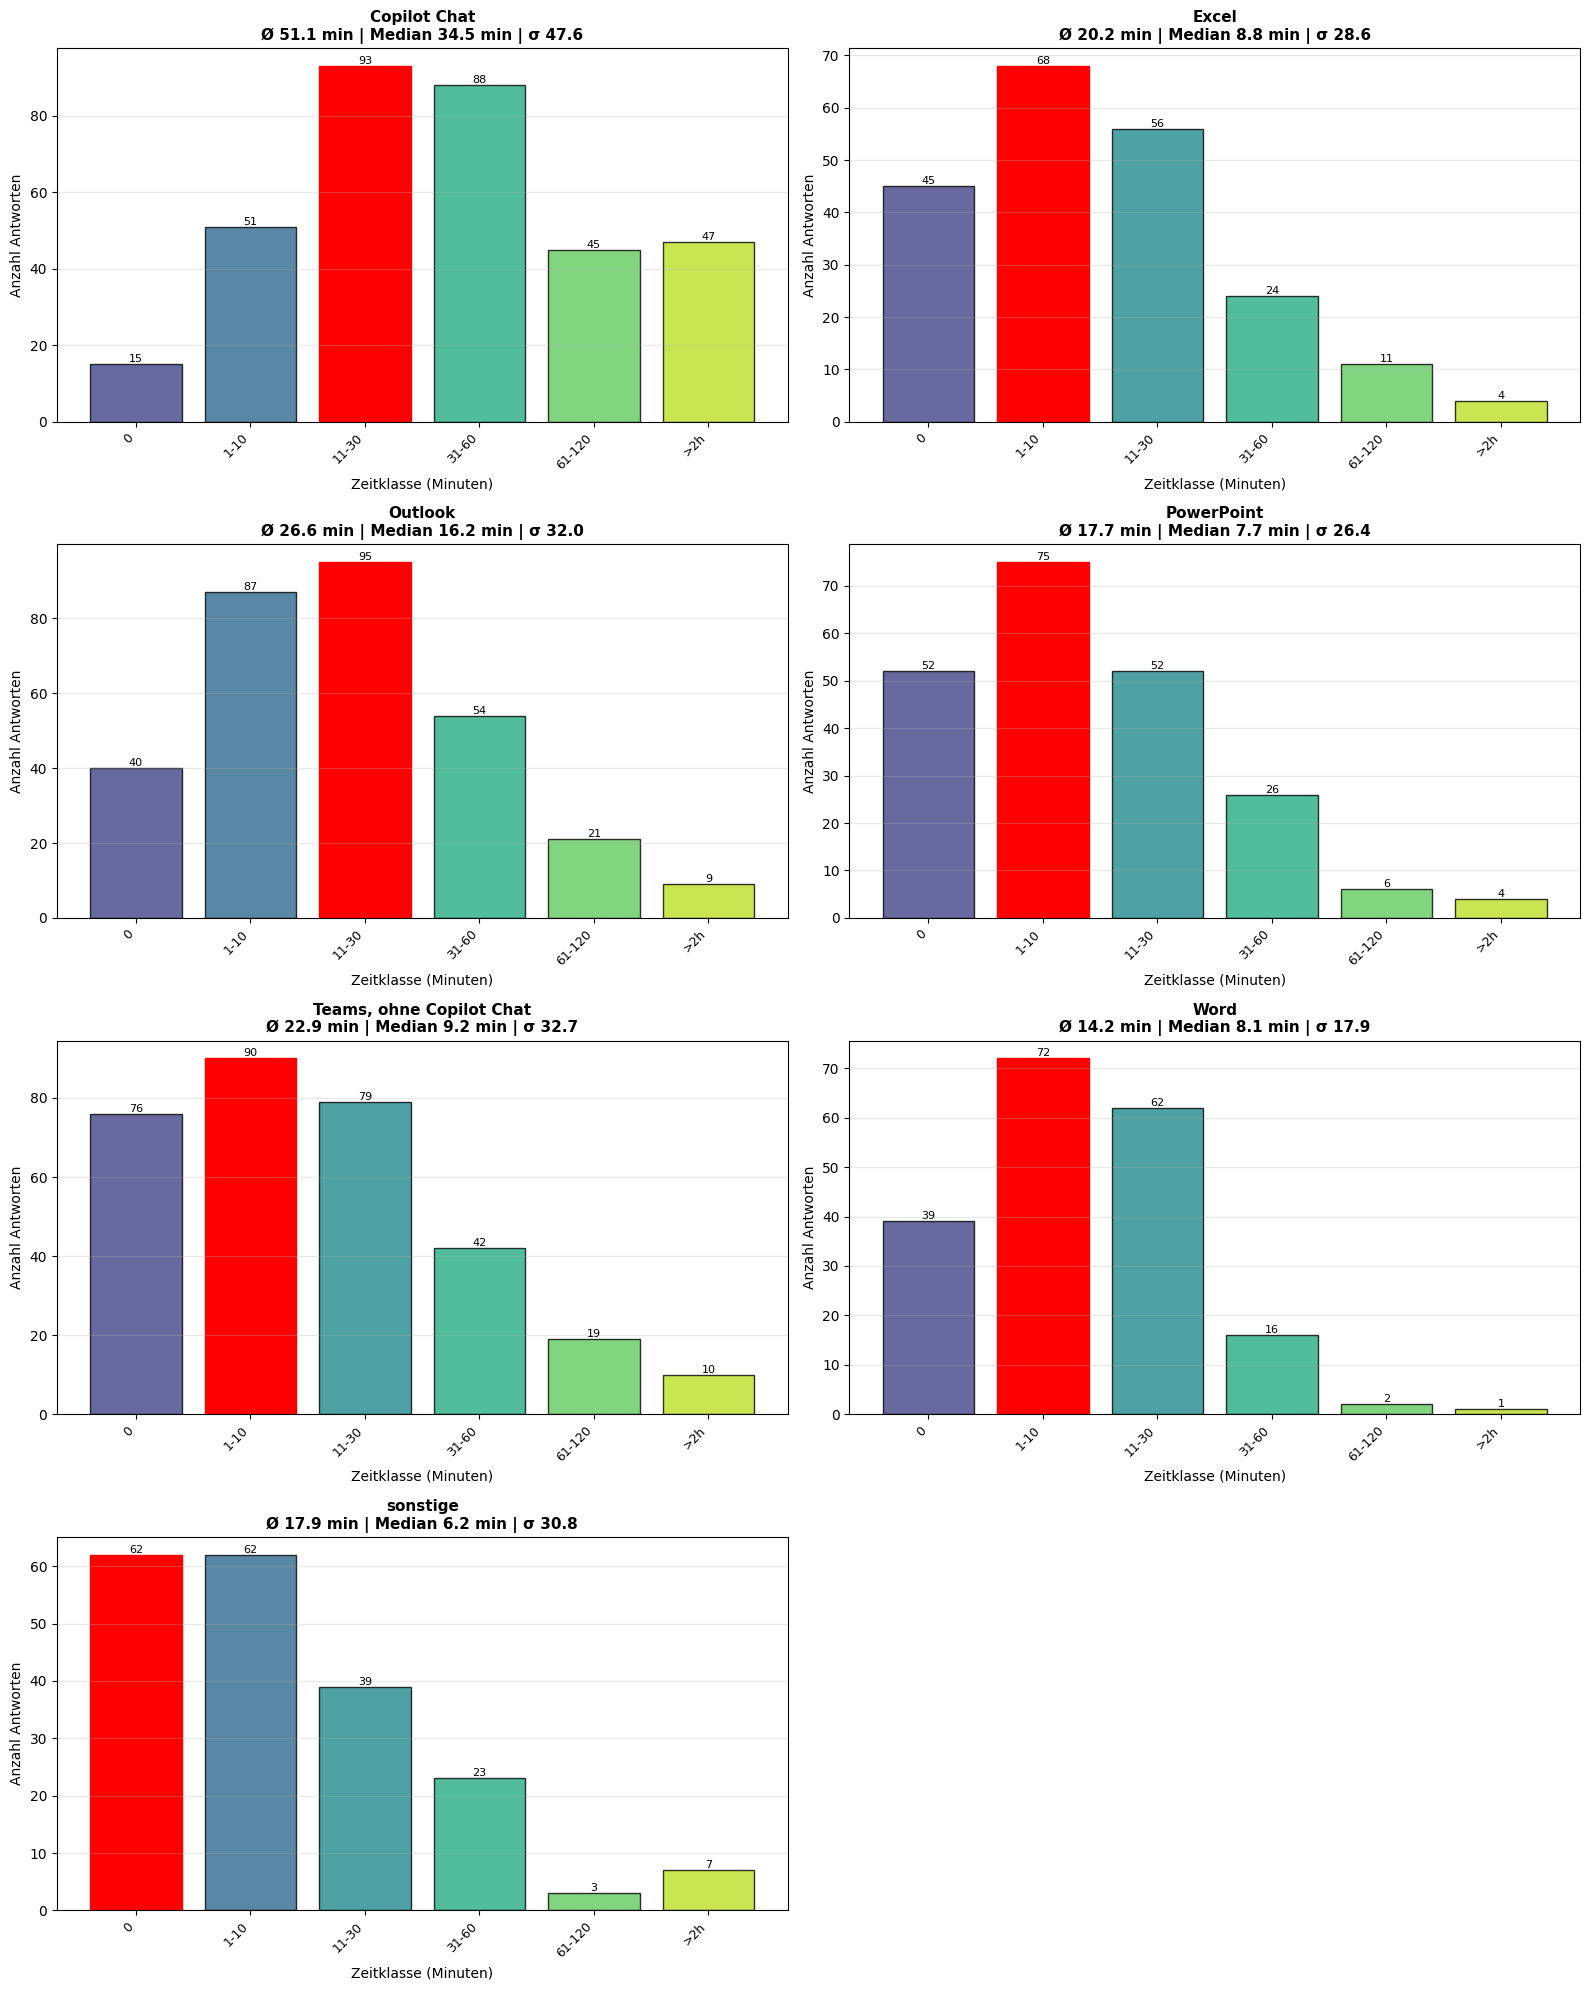


Detaillierte Verteilungen pro Kategorie erstellt!


In [ ]:
# Detaillierte Visualisierung für jede Kategorie
import matplotlib.pyplot as plt
import seaborn as sns

# Anzahl der Kategorien
categories = fr6_data['Kategorie'].unique()
n_categories = len(categories)

# Erstelle Subplots (2 Spalten)
n_cols = 2
n_rows = (n_categories + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten() if n_categories > 1 else [axes]

for idx, kategorie in enumerate(sorted(categories)):
    kategorie_data = fr6_data[fr6_data['Kategorie'] == kategorie].copy()
    kategorie_data = kategorie_data.sort_values('Klassenmitte')
    
    ax = axes[idx]
    
    # Erstelle Balkendiagramm
    colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(kategorie_data)))
    bars = ax.bar(range(len(kategorie_data)), kategorie_data['Value'], color=colors, edgecolor='black', alpha=0.8)
    
    # Markiere die Klasse mit der höchsten Häufigkeit
    max_idx = kategorie_data['Value'].idxmax()
    max_pos = list(kategorie_data.index).index(max_idx)
    bars[max_pos].set_color('red')
    bars[max_pos].set_alpha(1.0)
    
    # Setze x-Labels (Zeitklassen)
    zeitklassen = []
    for _, row in kategorie_data.iterrows():
        if row['Untere_Grenze'] == 0 and row['Obere_Grenze'] == 0:
            zeitklassen.append('0')
        elif row['Obere_Grenze'] == 180 and row['Untere_Grenze'] == 121:
            zeitklassen.append('>2h')
        else:
            zeitklassen.append(f"{int(row['Untere_Grenze'])}-{int(row['Obere_Grenze'])}")
    
    ax.set_xticks(range(len(kategorie_data)))
    ax.set_xticklabels(zeitklassen, rotation=45, ha='right', fontsize=9)
    ax.set_xlabel('Zeitklasse (Minuten)')
    ax.set_ylabel('Anzahl Antworten')
    
    # Hole Statistiken
    stats = fr6_stats_dict[kategorie]
    ax.set_title(f'{kategorie}\n'
                f'Ø {stats["mean"]:.1f} min | Median {stats["median"]:.1f} min | σ {stats["std"]:.1f}',
                fontweight='bold', fontsize=11)
    
    ax.grid(True, alpha=0.3, axis='y')
    
    # Füge Werte auf den Balken hinzu
    for i, (bar, val) in enumerate(zip(bars, kategorie_data['Value'])):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{int(val)}',
               ha='center', va='bottom', fontsize=8)

# Verstecke leere Subplots
for idx in range(n_categories, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

print("\nDetaillierte Verteilungen pro Kategorie erstellt!")

### Zusammenfassung der Erkenntnisse - Frage 6

In [ ]:
# Zusammenfassung der wichtigsten Erkenntnisse für Frage 6
print("="*80)
print("ZUSAMMENFASSUNG - FRAGE 6: ZEITAUFWAND PRO ANWENDUNG")
print("="*80)

print("\n1. RANKING NACH DURCHSCHNITTLICHEM ZEITAUFWAND:")
print("-" * 80)
for i, (kategorie, row) in enumerate(fr6_comparison_df.iterrows(), 1):
    print(f"  {i}. {kategorie:30s} - Ø {row['mean']:5.1f} min (Median: {row['median']:5.1f} min)")

print("\n2. NUTZUNGSINTENSITÄT (Stichprobengröße):")
print("-" * 80)
for i, (kategorie, row) in enumerate(fr6_comparison_df.sort_values('n', ascending=False).iterrows(), 1):
    print(f"  {i}. {kategorie:30s} - {row['n']:3.0f} Antworten")

print("\n3. STREUUNG/VARIABILITÄT:")
print("-" * 80)
for i, (kategorie, row) in enumerate(fr6_comparison_df.sort_values('cv', ascending=False).iterrows(), 1):
    print(f"  {i}. {kategorie:30s} - CV: {row['cv']:6.2f}% (σ = {row['std']:5.1f} min)")

print("\n4. WICHTIGSTE ERKENNTNISSE:")
print("-" * 80)

# Finde die Kategorie mit höchstem Zeitaufwand
max_time_cat = fr6_comparison_df['mean'].idxmax()
max_time_val = fr6_comparison_df.loc[max_time_cat, 'mean']

# Finde die Kategorie mit geringstem Zeitaufwand
min_time_cat = fr6_comparison_df['mean'].idxmin()
min_time_val = fr6_comparison_df.loc[min_time_cat, 'mean']

# Finde die Kategorie mit höchster Nutzung
max_usage_cat = fr6_comparison_df['n'].idxmax()
max_usage_val = fr6_comparison_df.loc[max_usage_cat, 'n']

print(f"""
  • Höchster Zeitaufwand: {max_time_cat} ({max_time_val:.1f} min/Tag)
  • Geringster Zeitaufwand: {min_time_cat} ({min_time_val:.1f} min/Tag)
  • Meist genutzte Anwendung: {max_usage_cat} ({max_usage_val:.0f} Antworten)
  
  • Copilot Chat weist den mit Abstand höchsten Zeitaufwand auf
  • Office-Anwendungen (Word, Excel, PowerPoint) haben ähnliche, 
    moderate Zeitaufwände (14-20 min)
  • Hohe Variabilität bei allen Kategorien deutet auf unterschiedliche 
    Nutzungsmuster hin
""")

ZUSAMMENFASSUNG - FRAGE 6: ZEITAUFWAND PRO ANWENDUNG

1. RANKING NACH DURCHSCHNITTLICHEM ZEITAUFWAND:
--------------------------------------------------------------------------------
  1. Copilot Chat                   - Ø  51.1 min (Median:  34.5 min)
  2. Outlook                        - Ø  26.6 min (Median:  16.2 min)
  3. Teams, ohne Copilot Chat       - Ø  22.9 min (Median:   9.2 min)
  4. Excel                          - Ø  20.2 min (Median:   8.8 min)
  5. sonstige                       - Ø  17.9 min (Median:   6.2 min)
  6. PowerPoint                     - Ø  17.7 min (Median:   7.7 min)
  7. Word                           - Ø  14.2 min (Median:   8.1 min)

2. NUTZUNGSINTENSITÄT (Stichprobengröße):
--------------------------------------------------------------------------------
  1. Copilot Chat                   - 339 Antworten
  2. Teams, ohne Copilot Chat       - 316 Antworten
  3. Outlook                        - 306 Antworten
  4. PowerPoint                     - 215 Antwo

## Hier Analyse geht weiter!